<a href="https://colab.research.google.com/github/alptuzun/CS411-Project/blob/master/CS210_Spring2022_Report_Group11_Bitcoin_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src = "https://i4.hurimg.com/i/hurriyet/75/1200x675/61821b494e3fe113306aabb2.jpg" width ="650" align = "right" heigth = "100"/>
</div>

# [Bitcoin Price Prediction - 11]

Group Members:
Alp Tüzün,
Sıla Özinan,
Yasin Albayrak,
Egemen Kılıç

## Introduction

<font color = "black">
This project is done to create an algorithm that trains on the historical data and accurately predicts the price of a Bitcoin in a given future time point, then advises the user to sell or buy BTC. The project will try to predict the daily opening price of Bitcoin depending on datasets from Kaggle. Daily opening, closing, highest, lowest prices, time range, and volume will be taken into account during the process. Statistical tests will be applied by using libraries of python and depending on the operations, the goal is to find, any possible relations and visualize them, in relation to time series, to make these relations understandable. A machine learning algorithm will try to determine the opening price of tomorrow depending on the previous 30 days. In order to increase model performance, hyper-parameter tuning will be applied, and a simple BUY-SELL system will be implemented. Last, the program will predict all features for the future time span from 09 March - 09 September 2022
At this stage of the project, our main goal is to find useful relations by analyzing the given datasets and visualizing them. After examining and evaluating these relations found by us, we will identify how they can help us for the next steps and formulate our future work. To achieve everything mentioned, the following items have been made throughout this stage:
</font>

```
- Visualization of descriptive statistics of the dataset; visualize price trends based on time series and volume.
- Visualize each feature separately based on time series
- Example visualizations of aggregated forms based on features Analysis of the highest and lowest price of all time with respect to volume
- Analyzing how high & low prices change with respect to time
- Comparison of open, close, high, and low prices for selected time range and/or volume
- Introduction of at least four new features from additional datasets and visual explanations of them
- For both existing and new features, and usage of spatial visualization examples

```

#Utilized Datasets


<font color="blue">
If you are using additional datasets, describe them in detail. Provide the data source (links if possible), number of obervations, data types, display the distributions of various variables and plot figures that helps the reader understand what you are dealing with.
</font>


In this project, past price action datasets of Bitcoin from [Kaggle](https://www.kaggle.com/) will be used. Below, primary and secondary datasets' detailed information are represented in table format. It includes parameters such as Date, Opening / Highest / Lowest / Closing / Adj Closing Prices and Volume. Prices and Volume are represented in terms of USD ($).
The first used (primary) dataset is the [**BTC-USD.csv**](https://www.kaggle.com/datasets/surajjha101/analyzing-and-prediction-of-bitcoin-pricing) file. Secondary dataset is also from Kaggle and it's named [**coin_Bitcoin.csv**](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory). In these datasets, there are informations of date, open, close, high, low, adj close and volume data on BTC.


In [ ]:
# Setting the path of datasets and linking project to Google Drive
from google.colab import drive
drive.mount("./drive", force_remount=True)
path_prefix = "./drive/My Drive/BTC File"

Mounted at ./drive


In [ ]:
# importing necessary libraries for the data analysis & visualization.
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from os.path import join
import pandas as pd
from scipy import stats
import seaborn as sns

# Reading primary and secondary datasets
primary_dataset = pd.read_csv(join(path_prefix, "BTC-USD.csv"))
secondary_dataset = pd.read_csv(join(path_prefix, "coin_Bitcoin.csv"))

# Missing Value Check

Before entering the realm of data visualization and exploration, we have to be sure that we have checked for missing values on both of these datasets. For this purpose, running the next code cell will tell use if we have a missing data. `isnull()` is the code block that will scan the dataset for the missing values.

In [ ]:
# show how the dataset are looking like 
if primary_dataset.isnull() is True and secondary_dataset.isnull() is True:
  print("There are missing values in at least one of the datasets.")
else:
  print("There are no missing values in any of the datasets.")

There are no missing values in any of the datasets.


In [ ]:
# Display the first 10 lines of the primary pandas dataframe to show the observers what are we dealing with 
primary_dataset.head(10)

Date        Open        High         Low       Close   Adj Close  \
0  2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
1  2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2  2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
3  2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
4  2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   
5  2014-09-22  399.100006  406.915985  397.130005  402.152008  402.152008   
6  2014-09-23  402.092010  441.557007  396.196991  435.790985  435.790985   
7  2014-09-24  435.751007  436.112000  421.131989  423.204987  423.204987   
8  2014-09-25  423.156006  423.519989  409.467987  411.574005  411.574005   
9  2014-09-26  411.428986  414.937988  400.009003  404.424988  404.424988   

     Volume  
0  21056800  
1  34483200  
2  37919700  
3  36863600  
4  26580100  
5  24127600  
6  45099500  
7  30627700  
8  26814400  
9  21460800

In [ ]:
# Display the first 10 lines of the secondary pandas dataframe to show the observers what are we dealing with
secondary_dataset.head(10)

SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   
5    6  Bitcoin    BTC  2013-05-04 23:59:59  115.000000   92.500000   
6    7  Bitcoin    BTC  2013-05-05 23:59:59  118.800003  107.142998   
7    8  Bitcoin    BTC  2013-05-06 23:59:59  124.663002  106.639999   
8    9  Bitcoin    BTC  2013-05-07 23:59:59  113.444000   97.699997   
9   10  Bitcoin    BTC  2013-05-08 23:59:59  115.779999  109.599998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09  
5   98.099998  112.500000     0.0  1.250317e+09  
6  112.900002  115.910004     0.0  1.288693e+09  
7  115.980003  112.300003     0.0  1.249023e+09  
8  112.250000  111.500000     0.0  1.240594e+09  
9  109.599998  113.566002     0.0  1.264049e+09

#Explanation of Centrality Metric

In both of these datasets, all of the available data has:

* count --> # of elements in the given column
* mean --> average value for the given column
* std --> standard deviation value for the given column
* min --> lowest value in the given column
* Q1 --> Value under the first 25%
* Q2 --> Value under the first 50%
* Q3 --> Value under the first 75%
* max --> highest value in the given column





In [ ]:
# Table for all the central metrics and distribution for primary dataset
primary_dataset.describe()

Open          High           Low         Close     Adj Close  \
count   2755.000000   2755.000000   2755.000000   2755.000000   2755.000000   
mean   11768.664114  12082.896368  11425.227294  11783.725409  11783.725409   
std    16405.233671  16841.443821  15910.212812  16413.271203  16413.271203   
min      176.897003    211.731003    171.509995    178.102997    178.102997   
25%      609.777497    612.311005    606.981994    609.804504    609.804504   
50%     6380.379883   6504.649902   6297.930176   6385.819824   6385.819824   
75%    10795.780762  11047.681152  10485.476074  10788.915528  10788.915528   
max    67549.734375  68789.625000  66382.062500  67566.828125  67566.828125   

             Volume  
count  2.755000e+03  
mean   1.489443e+10  
std    1.994140e+10  
min    5.914570e+06  
25%    8.172330e+07  
50%    5.262698e+09  
75%    2.512467e+10  
max    3.509679e+11

In [ ]:
# Table for all the central metrics and distribution for secondary dataset
secondary_dataset.describe()

SNo          High           Low          Open         Close  \
count  2991.000000   2991.000000   2991.000000   2991.000000   2991.000000   
mean   1496.000000   6893.326038   6486.009539   6700.146240   6711.290443   
std     863.571653  11642.832456  10869.032130  11288.043736  11298.141921   
min       1.000000     74.561096     65.526001     68.504997     68.431000   
25%     748.500000    436.179001    422.879486    430.445496    430.569489   
50%    1496.000000   2387.610107   2178.500000   2269.889893   2286.409912   
75%    2243.500000   8733.926948   8289.800459   8569.656494   8576.238715   
max    2991.000000  64863.098908  62208.964366  63523.754869  63503.457930   

             Volume     Marketcap  
count  2.991000e+03  2.991000e+03  
mean   1.090633e+10  1.208761e+11  
std    1.888895e+10  2.109438e+11  
min    0.000000e+00  7.784112e+08  
25%    3.036725e+07  6.305579e+09  
50%    9.460360e+08  3.741503e+10  
75%    1.592015e+10  1.499957e+11  
max    3.509679e+11  1.186364e+12

In [ ]:
# set all data types to a proper type in both datasets or cast and reformat them
primary_dataset['Open'] = primary_dataset['Open'].astype(float)
primary_dataset['High'] = primary_dataset['High'].astype(float)
primary_dataset['Low'] = primary_dataset['Low'].astype(float)
primary_dataset['Close'] = primary_dataset['Close'].astype(float)
primary_dataset['Adj Close'] = primary_dataset['Adj Close'].astype(float)
primary_dataset['Volume'] = primary_dataset['Volume'].astype(float)
primary_dataset['Date'] = pd.to_datetime(primary_dataset['Date'], format = '%Y-%m-%d')

secondary_dataset['Name'] = secondary_dataset['Name'].astype('category')
secondary_dataset['Symbol'] = secondary_dataset['Symbol'].astype('category')
secondary_dataset['Open'] = secondary_dataset['Open'].astype(float)
secondary_dataset['High'] = secondary_dataset['High'].astype(float)
secondary_dataset['Low'] = secondary_dataset['Low'].astype(float)
secondary_dataset['Close'] = secondary_dataset['Close'].astype(float)
secondary_dataset['Marketcap'] = secondary_dataset['Marketcap'].astype(float)
secondary_dataset['Volume'] = secondary_dataset['Volume'].astype(float)
secondary_dataset['Date'] = pd.to_datetime(secondary_dataset['Date'], format = '%Y-%m-%d %H:%M:%S')

In [ ]:
# information about the first dataset
primary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2755 entries, 0 to 2754
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2755 non-null   datetime64[ns]
 1   Open       2755 non-null   float64       
 2   High       2755 non-null   float64       
 3   Low        2755 non-null   float64       
 4   Close      2755 non-null   float64       
 5   Adj Close  2755 non-null   float64       
 6   Volume     2755 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 150.8 KB


In [ ]:
# information about the second dataset
secondary_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   SNo        2991 non-null   int64         
 1   Name       2991 non-null   category      
 2   Symbol     2991 non-null   category      
 3   Date       2991 non-null   datetime64[ns]
 4   High       2991 non-null   float64       
 5   Low        2991 non-null   float64       
 6   Open       2991 non-null   float64       
 7   Close      2991 non-null   float64       
 8   Volume     2991 non-null   float64       
 9   Marketcap  2991 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(6), int64(1)
memory usage: 193.1 KB


In [ ]:
#Print all column names for the primary source
primary_dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
#Print all column names for the secondary source
secondary_dataset.columns

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')

# Variable Explanation


---



*   Date: Time that the data was pulled from blockchain (in YYYY/MM/DD format)
*   Open: Opening price of the Bitcoin for a particular day
*   High: Highest price reached in a day
*   Low: Lowest price reached in a day
*   Close: Closing price of the Bitcoin for a particular day
*   Adj Close: Adjusted close price of the bitcoin after splits & dividends
*   Volume: Value that was transferred in the market from P2P
*   Market Cap: Total net worth of the currently available Bitcoin

Most of these variables are given in the $USD form to visualize the Bitcoin's number on a daily basis.







## Exploratory Data Analysis


In exploratory data analysis part, Date, Open / High / Low / Close / Adj Close Prices and Volume metrics are displayed with combinations of two, aiming to visualize and identify any of the possible relations by using proper visualization techniques. For every metric in the data, we've constructed time series to check its change through the history of BTC's existence.

During the visualization process, it was observed that some of the applied visualization methods weren't proper. In addition, the type of visualization method were changed. Color of the graphs were changed for better visualization. Pie chart, line graph and scatter graphs were used. Proper labeling was also applied to the graphs. When needed, normal distribution of some of the variables were also implemented to show the centrality metrics.

#Outlier Deletion 
For every dataset that we've analysed, we made sure that we should get rid of outlier data that messes with the centrality metrics, making the training data overfitting. Because all of the outliers in the Bitcoin data are natural, we have taken different approach in deletion. By looking at the daily change rate, if there's high volatility (huge jumps) it will indicate an outlier for the dataset. In the next code cell, we have deleted these rows; where there's a huge price jump, whether its increase or decrease. We used the Interquartile Technique to detect and delete these outliers. IQR detects such outliers with comparing it with first 25% and 75% percentile of the data.

In [ ]:
# apply IQR technique to detect and delete the Outliers in the first dataset
# before that we are making sure to save the copy so that the differences can be shown
# because of BTC's nature and it's high volatility, Outlier Deletion for every data points kills the dataset, deletes most of the elements
# to get in front of this, we will be marking outliers based on the daily high - low difference

primary_copy = primary_dataset.copy()
primary_dataset['Biggest Change'] = ((primary_dataset['High'] - primary_dataset['Low']) / primary_dataset["Low"]) * 100

# Apply the technique
Q1 = np.percentile(primary_dataset['Biggest Change'], 25, interpolation = 'midpoint')

Q3 = np.percentile(primary_dataset['Biggest Change'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(primary_dataset['Biggest Change'] >= (Q3 + 1.5 * IQR))
lower = np.where(primary_dataset['Biggest Change'] <= (Q1 -1.5  * IQR))

primary_dataset.drop(upper[0], inplace = True)
primary_dataset.drop(lower[0], inplace = True)

# Beginning of the Data Exploration

In this part of the notebook, you will usuallly face variaety of graphics, visualization and exploration of the given data.

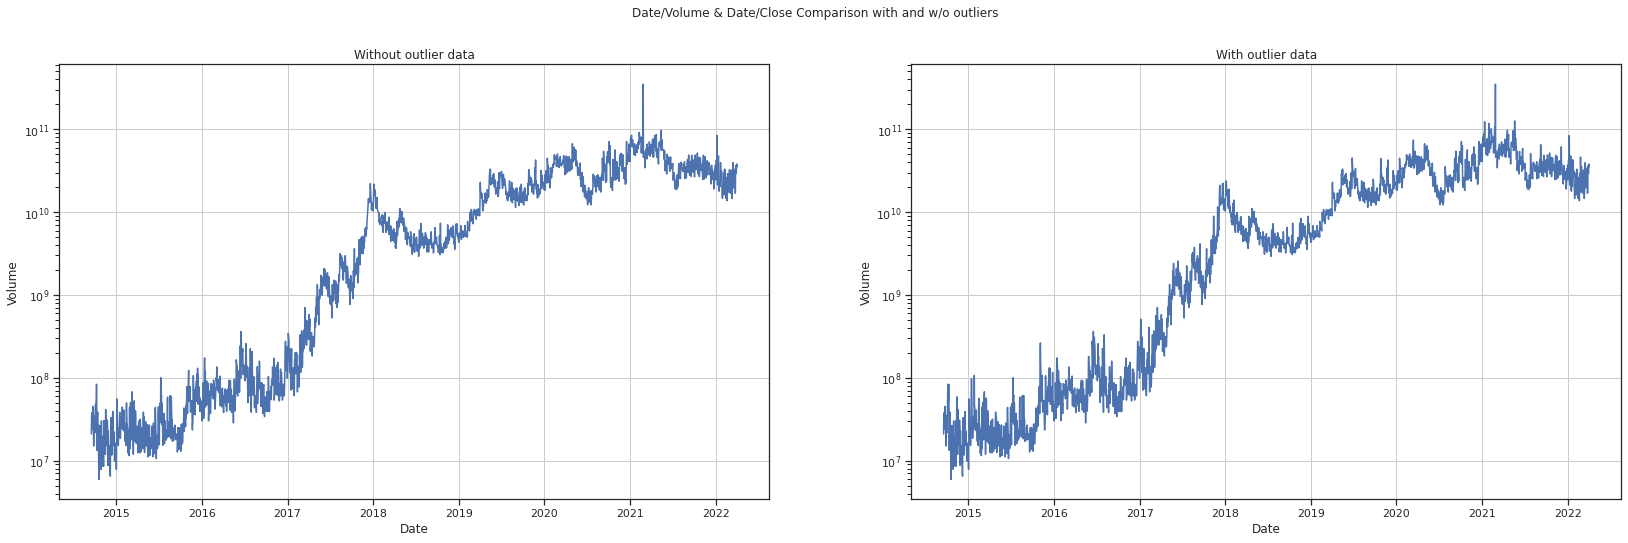

In [ ]:
#First visualization of the report
#importance of outlier elimination
fig, axes = plt.subplots(1, 2, figsize = (28,8))
fig.suptitle("Date/Volume & Date/Close Comparison with and w/o outliers")

sns.set_style("ticks",{'axes.grid' : True})
ax1 = sns.lineplot(x = "Date", y = "Volume", data = primary_dataset, ax = axes[0])
axes[0].set_title("Without outlier data")
ax1.set(yscale='log')
ax2 = sns.lineplot(x = "Date", y = "Volume", data = primary_copy, ax = axes[1])
axes[1].set_title("With outlier data")
ax2.set(yscale='log');

###Date / Volume Comparison
It can be cleary seen that the volume, that was traded in BTC exchanges, follows and increasing trend from 2015 to 2021. The zigzag pattern of the line clearly shows that volume traded on a daily basis is high volatile and subject to instability.

# Why did we use logarithmic base instead of 10 ?

The volume metric of the dataset tells the observer about how much of a value is interchanged in the BTC Exchanges throughout the day. Because as the time goes forward; the amount of exchanged Bitcoin increases exponetially, thus graphing a line graph creates an odd visuals. To prevent such anomality, we normalized and transformed our Volume with log base 10. As a result, the plotted graphs look a lot more understandable and clear

#Comparison with time series

### Time vs. Open & Close
When looking at both of these linegraphs, it can be interpretted that both graphics are the same. Although it looks like both of them are identical, their centrality metrics are different, thus making the distinguishable. Mean Close Price is higher than the Mean Open Price, which indicates that usually the price is higher at closing than the opening. Both of these graph has tendency to increase in the overall lifetime of Bitcoin.

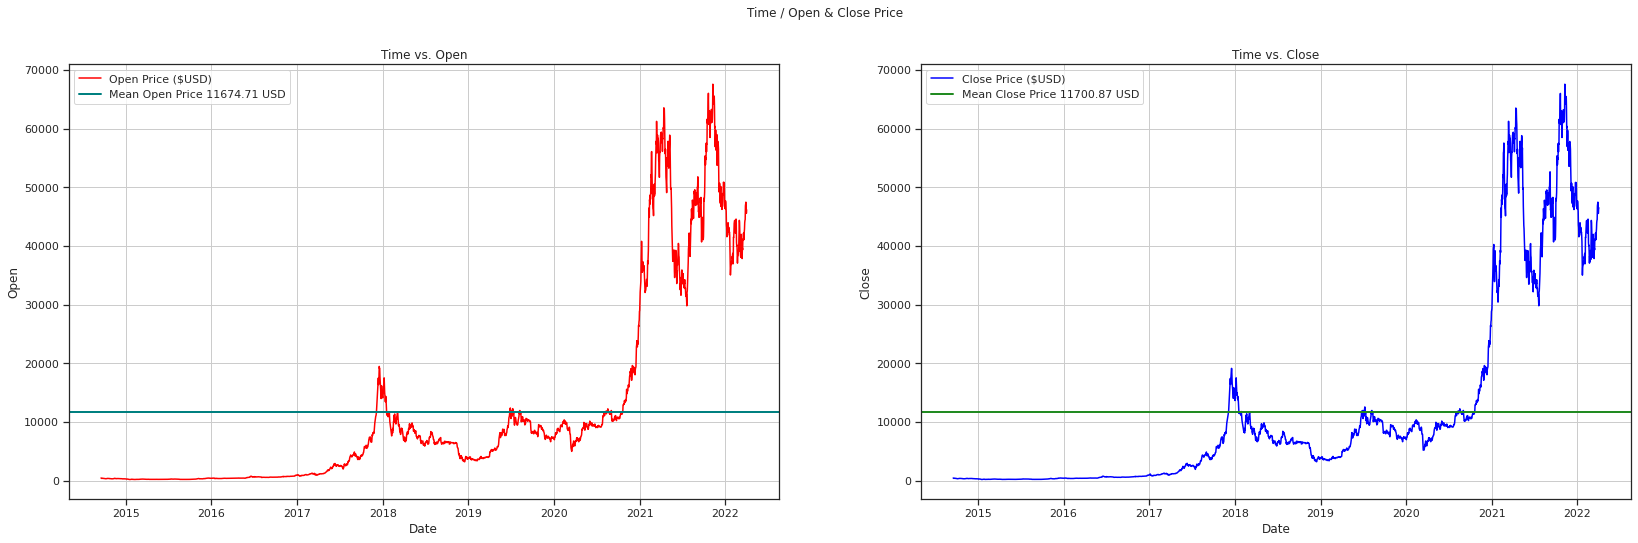

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (28,8))
fig.suptitle("Time / Open & Close Price")

ax1 = sns.lineplot(x = "Date", y = "Open", data = primary_dataset, ax = axes[0], color = "red", label = "Open Price ($USD)")
ax1.axhline(primary_dataset['Open'].mean(), color = "teal", linewidth = 2, label = f"Mean Open Price {float(format(primary_dataset['Open'].mean(), '.2f'))} USD")
axes[0].set_title("Time vs. Open")
ax1.legend()
ax2 = sns.lineplot(x = "Date", y = "Close", data = primary_dataset, ax = axes[1], color = "blue", label = "Close Price ($USD)")
ax2.axhline(primary_dataset['Open'].mean(), color = "forestgreen", linewidth = 2, label = f"Mean Close Price {float(format(primary_dataset['Close'].mean(), '.2f'))} USD")
axes[1].set_title("Time vs. Close")
ax2.legend()

### Time vs. High & Low

Like their previous graphed brothers, both of these next graph also look very familiar because of the BTC's daily price point being not so far off between different data. As expected, the Mean High Price is bigger than the Mean Low Price of BTC Prize data.

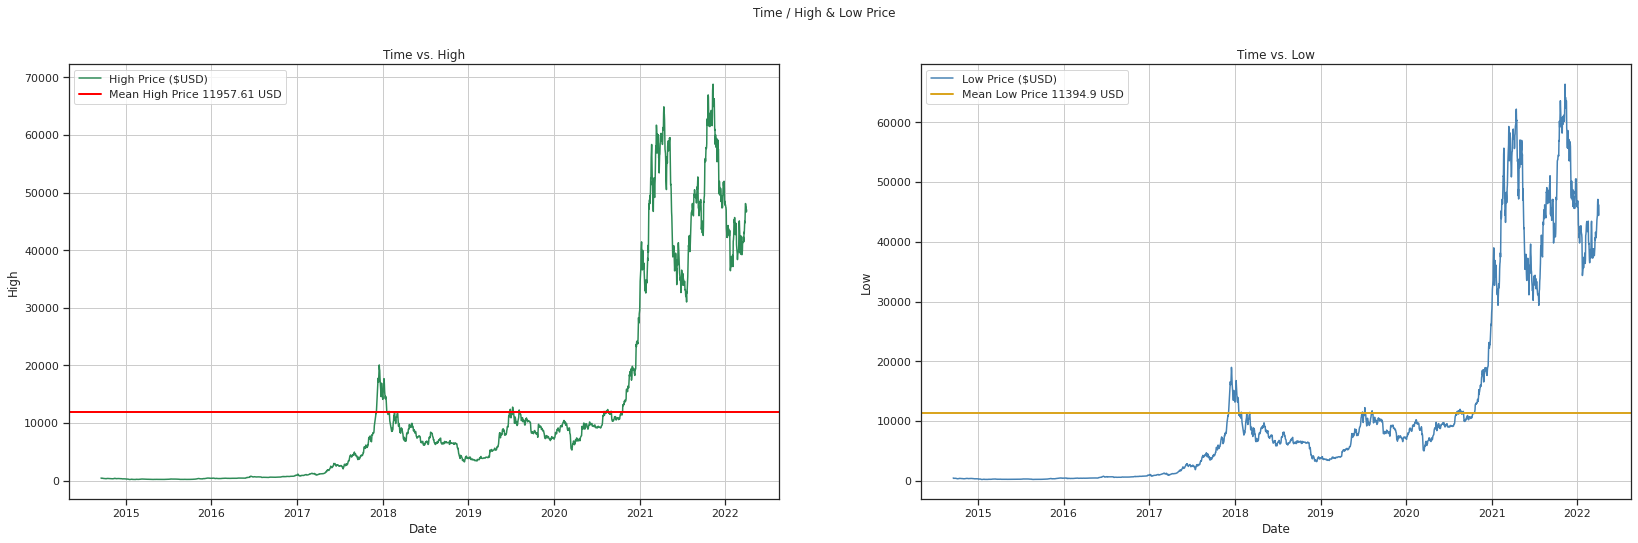

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (28,8))
fig.suptitle("Time / High & Low Price")

ax1 = sns.lineplot(x = "Date", y = "High", data = primary_dataset, ax = axes[0], color = "seagreen", label = "High Price ($USD)")
ax1.axhline(primary_dataset['High'].mean(), color = "red", linewidth = 2, label = f"Mean High Price {float(format(primary_dataset['High'].mean(), '.2f'))} USD")
axes[0].set_title("Time vs. High")
ax1.legend()
ax2 = sns.lineplot(x = "Date", y = "Low", data = primary_dataset, ax = axes[1], color = "steelblue", label = "Low Price ($USD)")
ax2.axhline(primary_dataset['Low'].mean(), color = "goldenrod", linewidth = 2, label = f"Mean Low Price {float(format(primary_dataset['Low'].mean(), '.2f'))} USD")
ax2.legend()
axes[1].set_title("Time vs. Low");

### Time vs. Adj Close & Volume
Time vs. Volume Graph tells us that over time as BTC became more popular and mainstream, the trade volume of BTC increased accordingly. After the first half of 2019, trade volume has exceeded the all-time mean value; indicating that most valuable trades were made after 2019 and further.

The mean Adjusted Close Price is higher than the mean Close Price, showing that after hours trading is usually profitable.

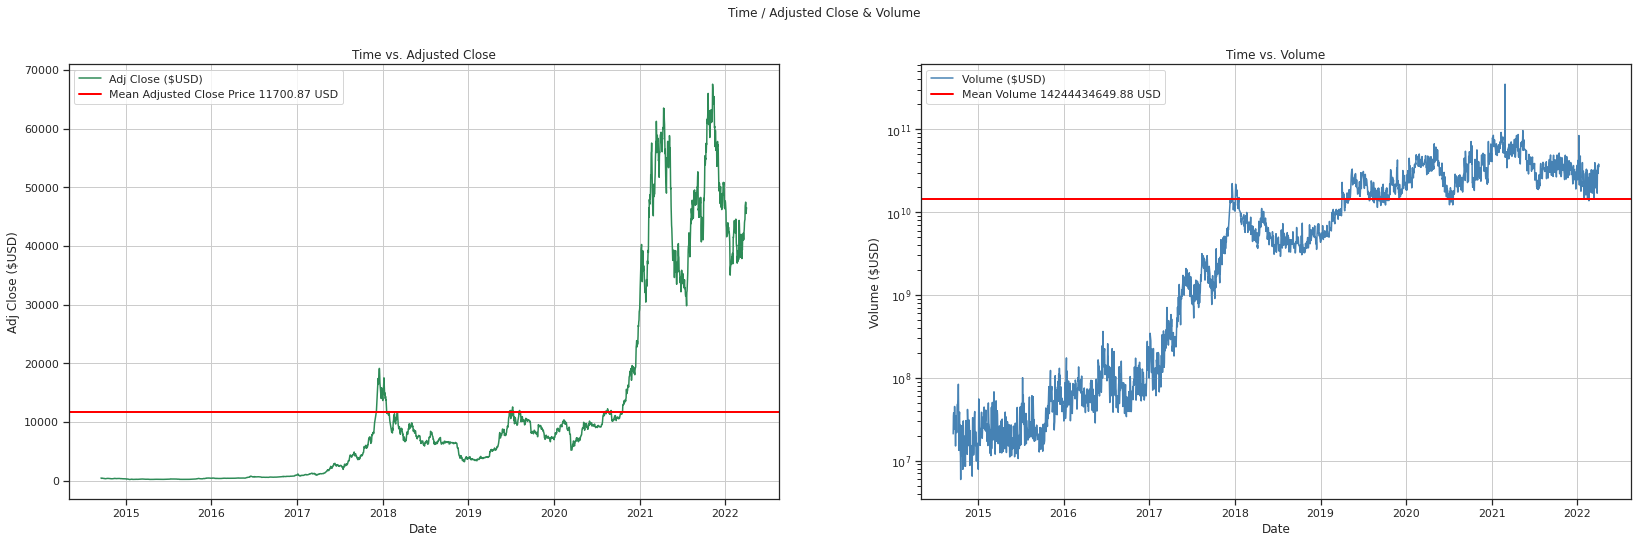

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (28,8))
fig.suptitle("Time / Adjusted Close & Volume")

ax1 = sns.lineplot(x = "Date", y = "Adj Close", data = primary_dataset, ax = axes[0], color = "seagreen", label = "Adj Close ($USD)")
axes[0].set_title("Time vs. Adjusted Close")
axes[0].set_ylabel("Adj Close ($USD)")
ax1.axhline(primary_dataset['Adj Close'].mean(), color = "red", linewidth = 2, label = f"Mean Adjusted Close Price {float(format(primary_dataset['Adj Close'].mean(), '.2f'))} USD")
ax1.legend()

ax2 = sns.lineplot(x = "Date", y = "Volume", data = primary_dataset, ax = axes[1], color = "steelblue", label = "Volume ($USD)")
ax2.set(yscale = "log")
axes[1].set_title("Time vs. Volume")
axes[1].set_ylabel("Volume ($USD)")
ax2.axhline(primary_dataset['Volume'].mean(), color = "red", linewidth = 2, label = f"Mean Volume {float(format(primary_dataset['Volume'].mean(), '.2f'))} USD")
ax2.legend();

#Comparison with volume

### Volume vs. Low & High 
Both of these next graph look alike. What should be understand from these scatterplots is that as the trade volume increased fo BTC; the price range, in which Bitcoin goes back and forth, increased substantially. An increased volume in the trade ovverall can etiher cause low or high prices for bitcoin. Higher volume allows the price to travel in a larger price interval. The scatter graphs follows an exponential shape if a relationship line is constructed. To finalize, the volume has a overall positive healthy realtionship with Low / High prices.

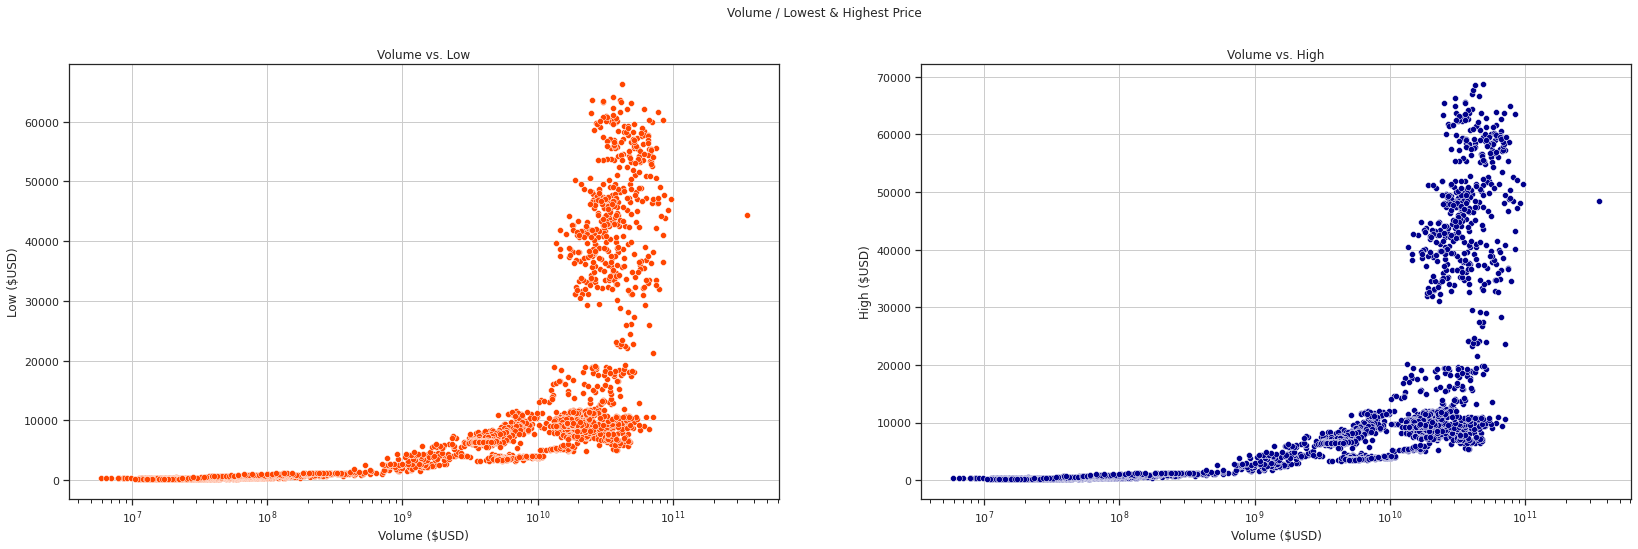

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (28,8))
fig.suptitle("Volume / Lowest & Highest Price")

ax1 = sns.scatterplot(x = "Volume", y = "Low", data = primary_dataset, ax = axes[0], color = "orangered")
axes[0].set_title("Volume vs. Low")
axes[0].set_ylabel("Low ($USD)")
axes[0].set_xlabel("Volume ($USD)")
ax1.set(xscale='log')
ax2 = sns.scatterplot(x = "Volume", y = "High", data = primary_dataset, ax = axes[1], color = "darkblue")
axes[1].set_title("Volume vs. High")
axes[1].set_ylabel("High ($USD)")
axes[1].set_xlabel("Volume ($USD)")
ax2.set(xscale='log');

### Volume vs. Open & Close

The same is also acceptable for the open / close prices of bitcoin, which have many datapoints(scatter points) in the graph. Their relationships with the volume is the same with its previous data examples.

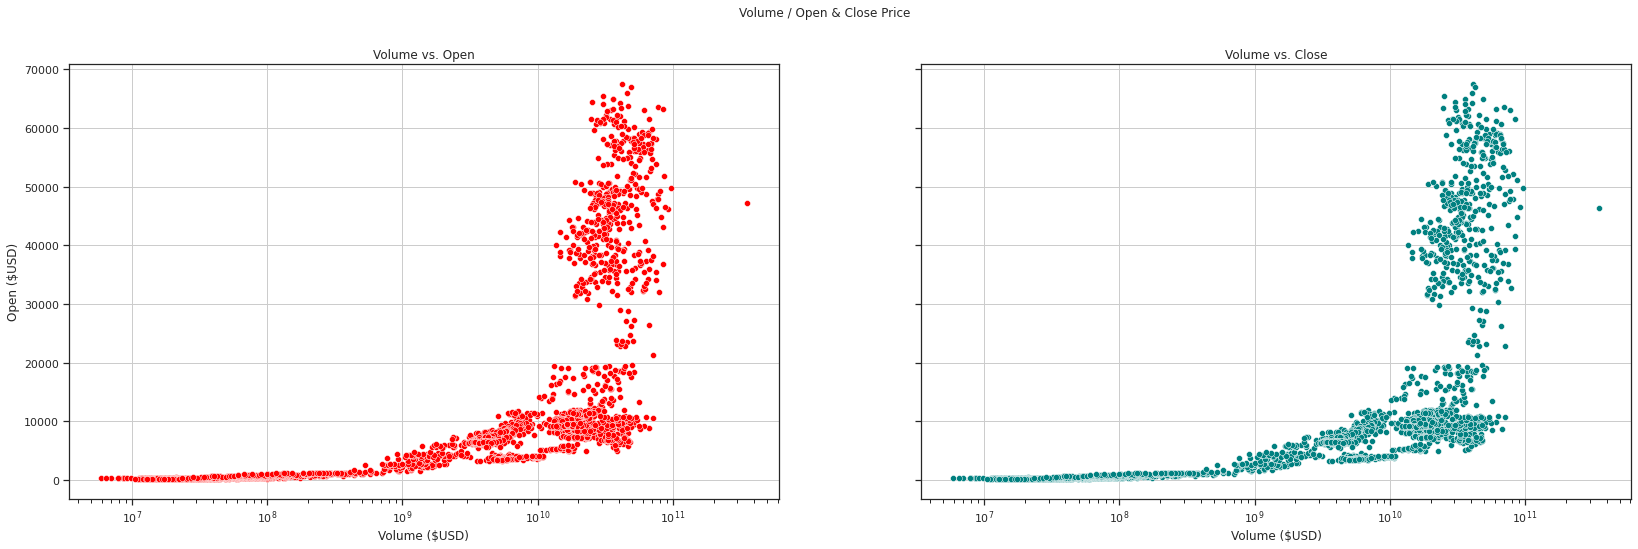

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (28,8), sharey = True)
fig.suptitle("Volume / Open & Close Price")

ax1 = sns.scatterplot(x = "Volume", y = "Open", data = primary_dataset, ax = axes[0], color = "red")
axes[0].set_title("Volume vs. Open")
axes[0].set_ylabel("Open ($USD)")
axes[0].set_xlabel("Volume ($USD)")
ax1.set(xscale='log')
ax2 = sns.scatterplot(x = "Volume", y = "Close", data = primary_dataset, ax = axes[1], color = "teal")
axes[1].set_title("Volume vs. Close")
axes[1].set_ylabel("Close ($USD)")
axes[1].set_xlabel("Volume ($USD)")
ax2.set(xscale='log');

#<font color = "Black">Analysis of the Highest and the Lowest Price of All Time with Respect to Volume </font>

To achive this, we've created a scatterplot with only two datapoints, one is for the high and the next is for the low. The former sits at the upper-right corner of the graph while the latter sits at bottom-left corner. This indicates that with the higher trade volume a high price can be achieved and the low price is the result of low trading volume, causing more BTC supply stay on the market.

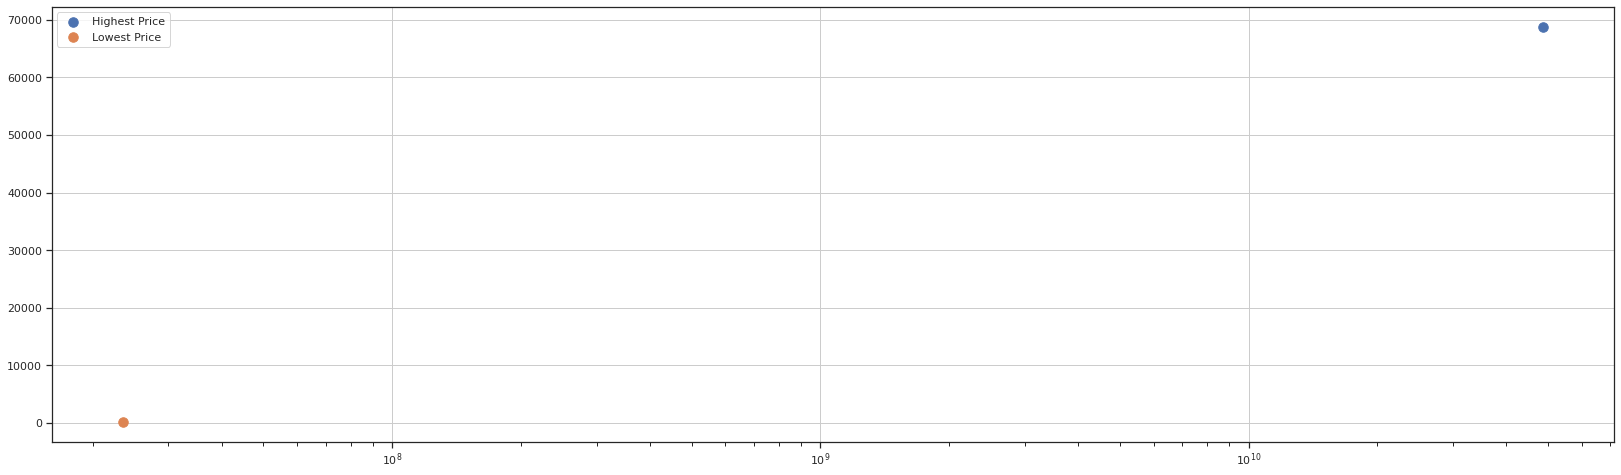

In [ ]:
df_extra = primary_dataset.drop(primary_dataset[(primary_dataset["High"] < primary_dataset["High"].max()) & (primary_dataset["Low"] > primary_dataset['Low'].min())].index)

df1 = df_extra.iloc[0]
df2 = df_extra.iloc[1]
plt.figure(figsize=(28,8))
plt.xscale('log')
plt.scatter(df2["Volume"], df2["High"], s = 90, label = "Highest Price")
plt.scatter(df1["Volume"], df1["Low"], s = 90, label = "Lowest Price")
plt.xticks()
plt.yticks()
plt.legend();

# <font color = "Black"> Comparison of Open, Close & High, Low prices with respect to Time Series</font>

These comparisons are made to see the change in Open, Close & High, Low prices in the all-time. It can be clearly seen that all of these 4 graphs look identical. The date range for this graph is after the first half of the year 2020 until today. During this period, Bitcoin saw the most daily actions, events & jumps in its history.

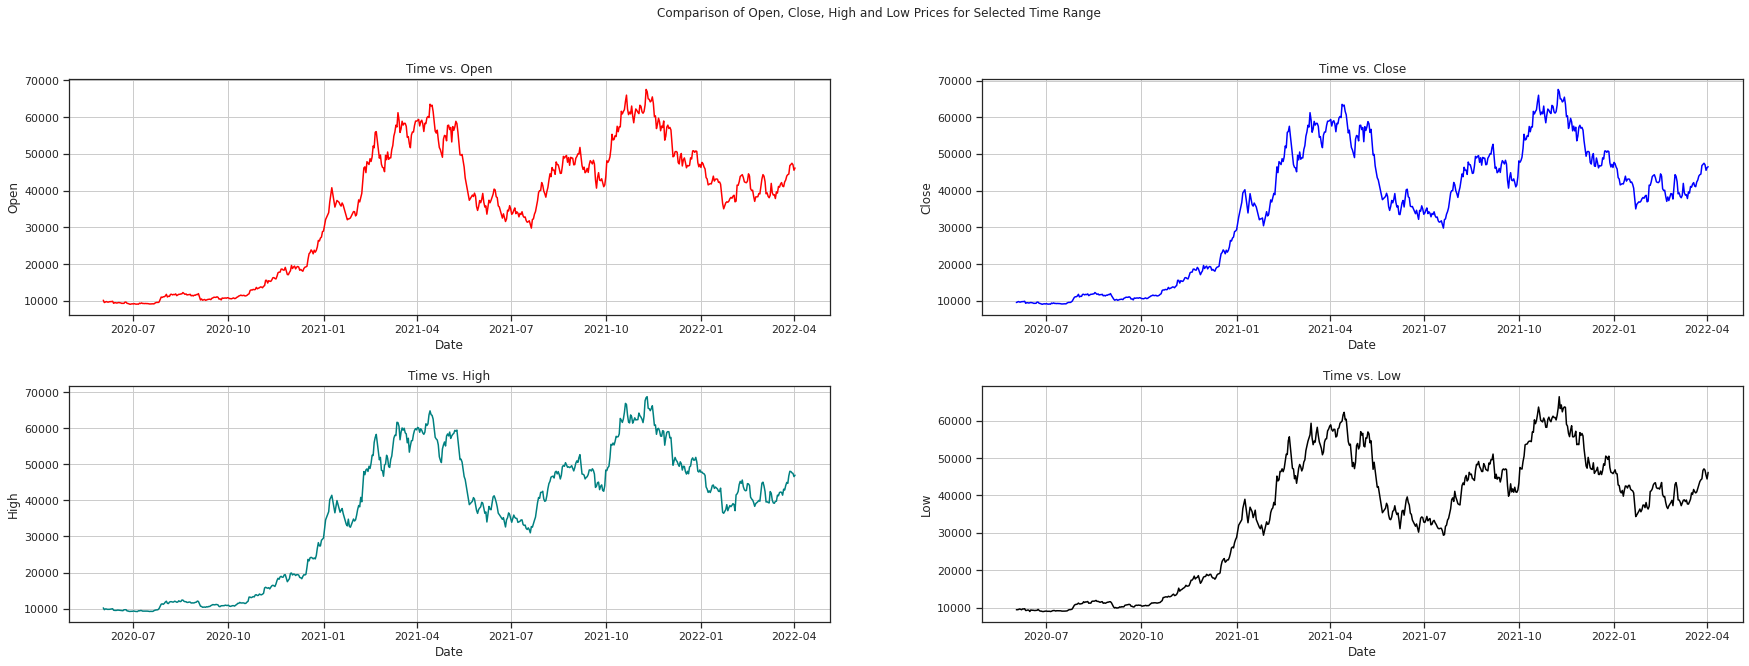

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (30,10))
fig.suptitle("Comparison of Open, Close, High and Low Prices for Selected Time Range")

primary_time = primary_dataset[primary_dataset["Date"] > '2020-06-01']


plt.subplots_adjust(hspace=0.3)
ax1 = sns.lineplot(x = "Date", y = "Open", data = primary_time, ax = axes[0,0], color = "red")
axes[0,0].set_title("Time vs. Open")
ax2 = sns.lineplot(x = "Date", y = "Close", data = primary_time, ax = axes[0,1], color = "blue")
axes[0,1].set_title("Time vs. Close");
ax3 = sns.lineplot(x = "Date", y = "High", data = primary_time, ax = axes[1,0], color = "teal")
axes[1,0].set_title("Time vs. High")
ax4 = sns.lineplot(x = "Date", y = "Low", data = primary_time, ax = axes[1,1], color = "black")
axes[1,1].set_title("Time vs. Low");

# Comparisons with Different Combinations of Data

### <font color = "Black"> Comparison of Open prices with High, Low, Close and Adj close prices</font>

Most of these oncoming comparison & relationship analysis made with scatterplots. The result of the scatterplots indicate that there's a strong positive relationship between Open Price vs. High, Low, Close and Adj Close prices, which was expected as the previous time series lines had already disclosed that these variables have a similar relationship.

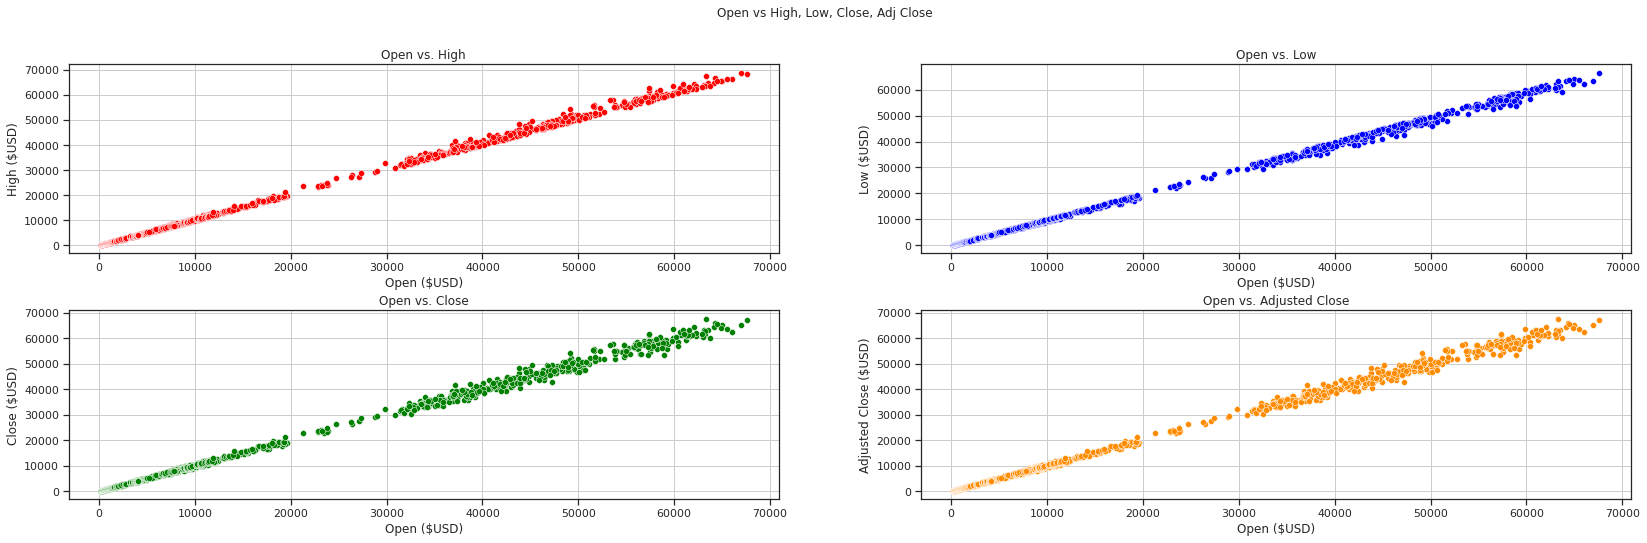

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (28,8))
fig.suptitle("Open vs High, Low, Close, Adj Close")
plt.subplots_adjust(hspace=0.3)

ax1 = sns.scatterplot(x = "Open", y = "High", data = primary_dataset, ax = axes[0,0], color = "red")
axes[0,0].set_title("Open vs. High")
axes[0,0].set_ylabel("High ($USD)")
axes[0,0].set_xlabel("Open ($USD)")

ax2 = sns.scatterplot(x = "Open", y = "Low", data = primary_dataset, ax = axes[0,1], color = "blue")
axes[0,1].set_title("Open vs. Low")
axes[0,1].set_ylabel("Low ($USD)")
axes[0,1].set_xlabel("Open ($USD)")

ax3 = sns.scatterplot(x = "Open", y = "Close", data = primary_dataset, ax = axes[1,0], color = "green")
axes[1,0].set_title("Open vs. Close")
axes[1,0].set_ylabel("Close ($USD)")
axes[1,0].set_xlabel("Open ($USD)")

ax4 = sns.scatterplot(x = "Open", y = "Adj Close", data = primary_dataset, ax = axes[1,1], color = "darkorange")
axes[1,1].set_title("Open vs. Adjusted Close")
axes[1,1].set_ylabel("Adjusted Close ($USD)")
axes[1,1].set_xlabel("Open ($USD)");



### <font color = "Black"> Comparison of High Prices with Low, Open, Close and Adj Close Prices</font>

Previous code & text cell had already explained the relationship and pattern between price-point variables. As usual, here they are also strongly positive correlated.

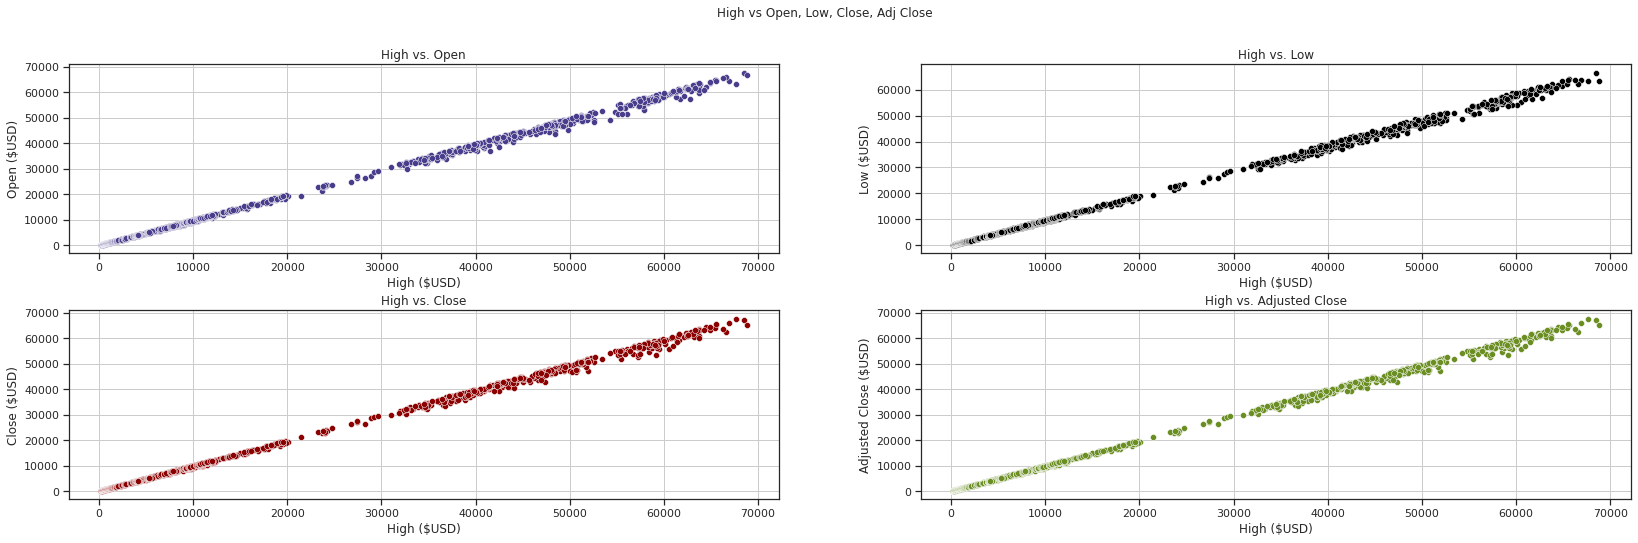

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (28,8))
fig.suptitle("High vs Open, Low, Close, Adj Close")
plt.subplots_adjust(hspace=0.3)

ax1 = sns.scatterplot(x = "High", y = "Open", data = primary_dataset, ax = axes[0,0], color = "darkslateblue")
axes[0,0].set_title("High vs. Open")
axes[0,0].set_ylabel("Open ($USD)")
axes[0,0].set_xlabel("High ($USD)")

ax2 = sns.scatterplot(x = "High", y = "Low", data = primary_dataset, ax = axes[0,1], color = "black")
axes[0,1].set_title("High vs. Low")
axes[0,1].set_ylabel("Low ($USD)")
axes[0,1].set_xlabel("High ($USD)")

ax3 = sns.scatterplot(x = "High", y = "Close", data = primary_dataset, ax = axes[1,0], color = "darkred")
axes[1,0].set_title("High vs. Close")
axes[1,0].set_ylabel("Close ($USD)")
axes[1,0].set_xlabel("High ($USD)")

ax4 = sns.scatterplot(x = "High", y = "Adj Close", data = primary_dataset, ax = axes[1,1], color = "olivedrab")
axes[1,1].set_title("High vs. Adjusted Close")
axes[1,1].set_ylabel("Adjusted Close ($USD)")
axes[1,1].set_xlabel("High ($USD)");

## <font color = "Black"> Comparison of Low prices with High, Open, Close and Adj close prices</font>

After comparison, it is seen that there is strong positive correlation between lowest prices of the day and the high, open, close and adj closing prices.

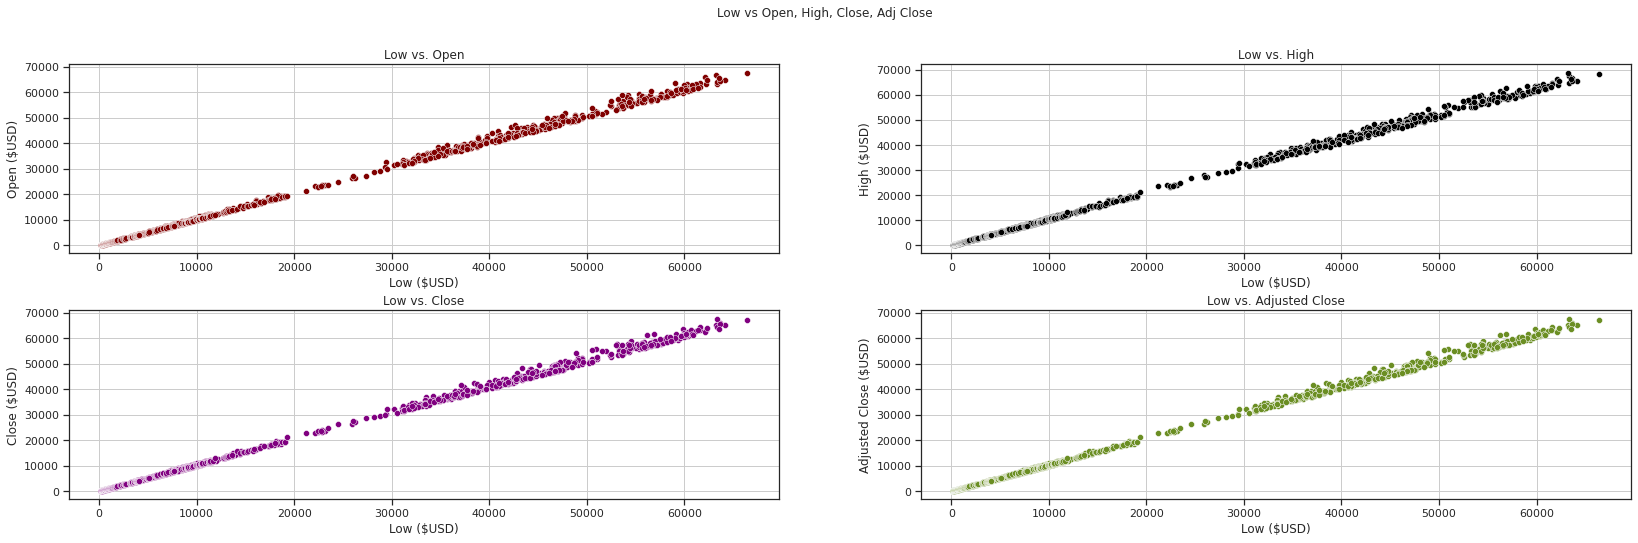

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (28,8))
fig.suptitle("Low vs Open, High, Close, Adj Close")
plt.subplots_adjust(hspace=0.3)

ax1 = sns.scatterplot(x = "Low", y = "Open", data = primary_dataset, ax = axes[0,0], color = "maroon")
axes[0,0].set_title("Low vs. Open")
axes[0,0].set_ylabel("Open ($USD)")
axes[0,0].set_xlabel("Low ($USD)")

ax2 = sns.scatterplot(x = "Low", y = "High", data = primary_dataset, ax = axes[0,1], color = "black")
axes[0,1].set_title("Low vs. High")
axes[0,1].set_ylabel("High ($USD)")
axes[0,1].set_xlabel("Low ($USD)")

ax3 = sns.scatterplot(x = "Low", y = "Close", data = primary_dataset, ax = axes[1,0], color = "purple")
axes[1,0].set_title("Low vs. Close")
axes[1,0].set_ylabel("Close ($USD)")
axes[1,0].set_xlabel("Low ($USD)")

ax4 = sns.scatterplot(x = "Low", y = "Adj Close", data = primary_dataset, ax = axes[1,1], color = "olivedrab")
axes[1,1].set_title("Low vs. Adjusted Close")
axes[1,1].set_ylabel("Adjusted Close ($USD)")
axes[1,1].set_xlabel("Low ($USD)");

## <font color = "Black"> Comparison of Closing prices with Low, High, Open and Adj close prices</font>

>The same logic of point-price applies here, and one can also see the high positive correlation between closing prices of the days and low,high, openning and adj closing prices.

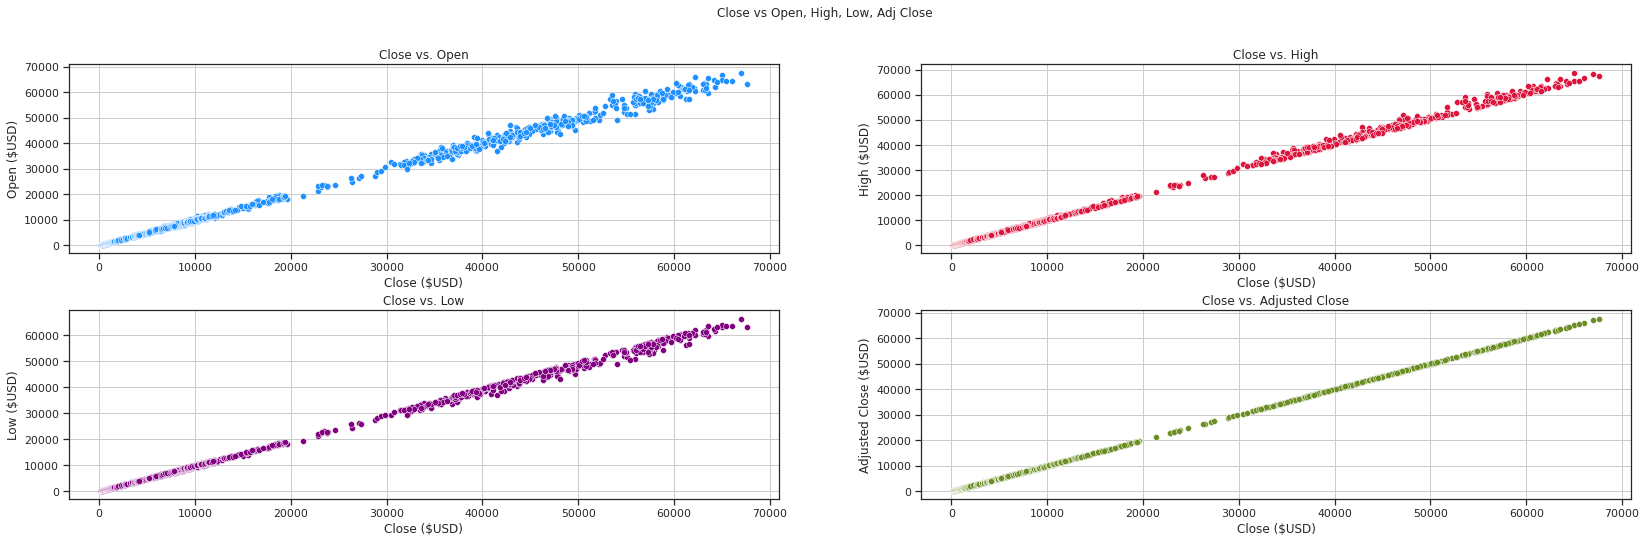

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (28,8))
fig.suptitle("Close vs Open, High, Low, Adj Close")
plt.subplots_adjust(hspace=0.3)

ax1 = sns.scatterplot(x = "Close", y = "Open", data = primary_dataset, ax = axes[0,0], color = "dodgerblue")
axes[0,0].set_title("Close vs. Open")
axes[0,0].set_ylabel("Open ($USD)")
axes[0,0].set_xlabel("Close ($USD)")

ax2 = sns.scatterplot(x = "Close", y = "High", data = primary_dataset, ax = axes[0,1], color = "crimson")
axes[0,1].set_title("Close vs. High")
axes[0,1].set_ylabel("High ($USD)")
axes[0,1].set_xlabel("Close ($USD)")

ax3 = sns.scatterplot(x = "Close", y = "Low", data = primary_dataset, ax = axes[1,0], color = "purple")
axes[1,0].set_title("Close vs. Low")
axes[1,0].set_ylabel("Low ($USD)")
axes[1,0].set_xlabel("Close ($USD)")

ax4 = sns.scatterplot(x = "Close", y = "Adj Close", data = primary_dataset, ax = axes[1,1], color = "olivedrab")
axes[1,1].set_title("Close vs. Adjusted Close")
axes[1,1].set_ylabel("Adjusted Close ($USD)")
axes[1,1].set_xlabel("Close ($USD)");

## <font color = "Black"> Comparison of Adj Close prices with High, Low, Open and Close prices</font>

>Similarly, Adj closing prices of the days have strong positive correlation with the high, low , open and closing prices as seen in the scatter plots.

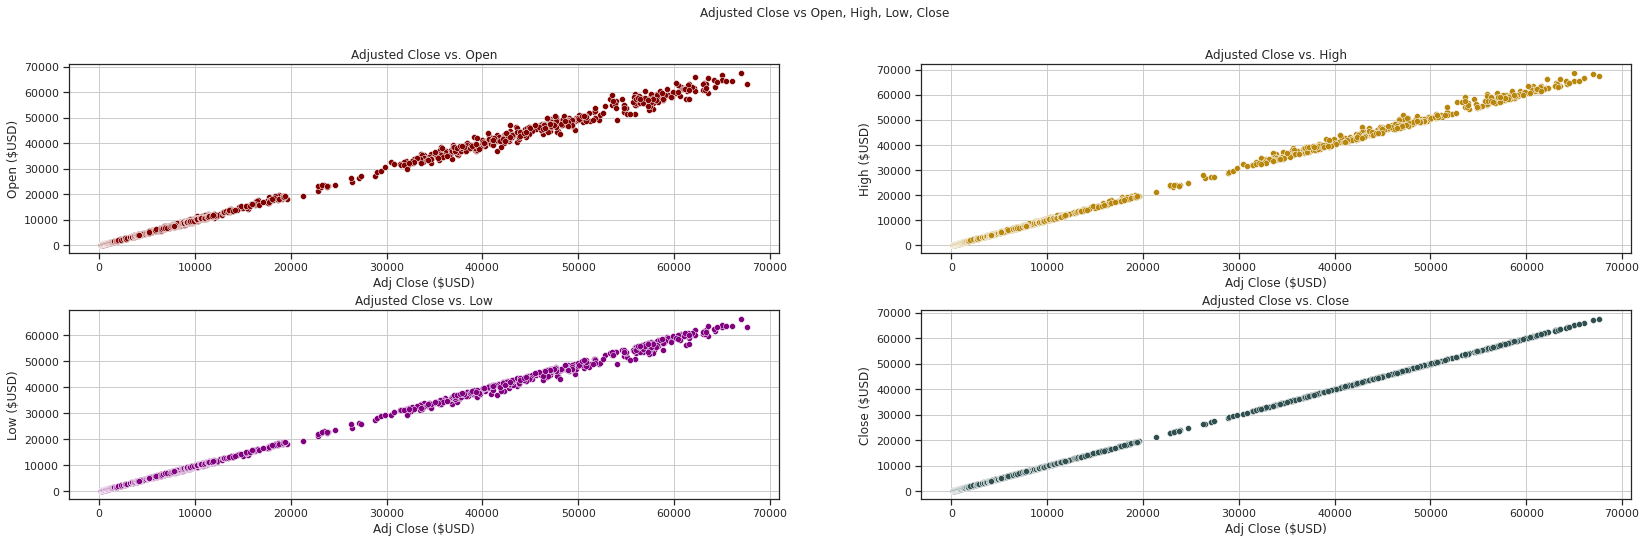

In [ ]:
fig, axes = plt.subplots(2, 2, figsize = (28,8))
fig.suptitle("Adjusted Close vs Open, High, Low, Close")
plt.subplots_adjust(hspace=0.3)

ax1 = sns.scatterplot(x = "Adj Close", y = "Open", data = primary_dataset, ax = axes[0,0], color = "maroon")
axes[0,0].set_title("Adjusted Close vs. Open")
axes[0,0].set_ylabel("Open ($USD)")
axes[0,0].set_xlabel("Adj Close ($USD)")

ax2 = sns.scatterplot(x = "Adj Close", y = "High", data = primary_dataset, ax = axes[0,1], color = "darkgoldenrod")
axes[0,1].set_title("Adjusted Close vs. High")
axes[0,1].set_ylabel("High ($USD)")
axes[0,1].set_xlabel("Adj Close ($USD)")

ax3 = sns.scatterplot(x = "Adj Close", y = "Low", data = primary_dataset, ax = axes[1,0], color = "purple")
axes[1,0].set_title("Adjusted Close vs. Low")
axes[1,0].set_ylabel("Low ($USD)")
axes[1,0].set_xlabel("Adj Close ($USD)")

ax4 = sns.scatterplot(x = "Adj Close", y = "Close", data = primary_dataset, ax = axes[1,1], color = "darkslategray")
axes[1,1].set_title("Adjusted Close vs. Close")
axes[1,1].set_ylabel("Close ($USD)")
axes[1,1].set_xlabel("Adj Close ($USD)");

# Heat Map 

> After seeing the comparisons between the high,close, openning, closing and adj closing prices of the days, One can also see the strong correlations between them through the heat map.

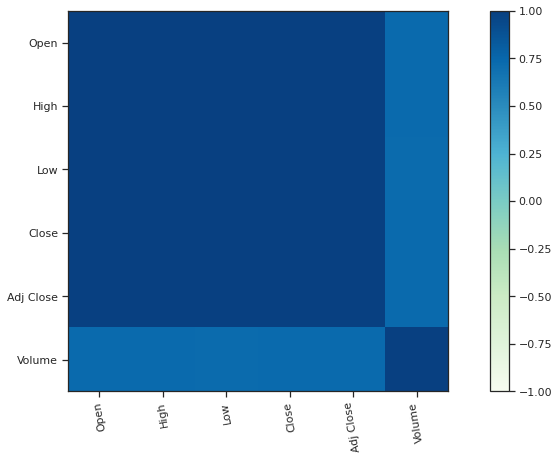

In [ ]:
#Heat Map

copy = primary_dataset.drop("Biggest Change", axis = 1)
crr = copy.corr()

plt.imshow(crr, cmap="GnBu", vmin = -1, vmax = 1)

plt.colorbar()
plt.xticks(range(len(crr)),crr.columns, rotation=100)
plt.yticks(range(len(crr)),crr.index)
plt.grid()
plt.show()

#Distributions of Variables

---


  All of these are showing the distribution of the opening, closing, high, low and volume values of the primary data set with their mean and standard deviation. These graphs are symmetrical bell-shaped graphs which show the probability distribution that is symmetric about the mean value, indicating that data values which are near the mean are more frequent in occurrence than data which are far from the mean. 

***As one can see, opening, closing, high and low prices have a mean of roughly 11,500\$ and standard deviation of 16,000\$, and showing the symmetrical distributions around the mean value, thus indicating that the more frequent occurence in these prices are the ones that are close to the mean value of 11,500\$





###Distribution of Open Prices 
The open prices has a mean of \$11,675 and standard deviation of \$16,506. 

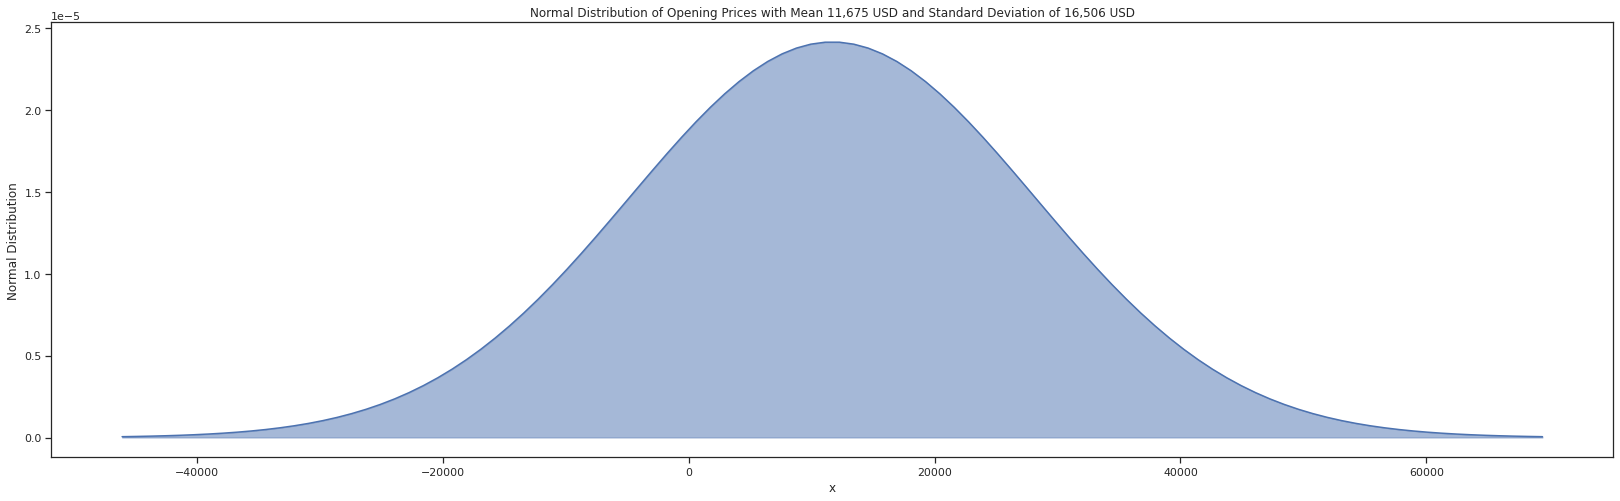

In [ ]:
mean, std = np.array(primary_dataset["Open"]).mean(), np.array(primary_dataset["Open"]).std()
offset = 3.5 * std
n= 100
x = np.linspace(mean-offset, mean+offset, n)

# probability density function
# of the given normal dist.
y = stats.norm.pdf(x, mean, std)

plt.figure(figsize=(28, 8))
plt.plot(x,y)
# put grids on the figure
plt.grid()
plt.xlabel("x")
plt.ylabel("Normal Distribution")
# filling the area below the line
plt.fill_between(x, y, alpha=0.5, color="b")
plt.title("Normal Distribution of Opening Prices with Mean " + str("{:,.0f}".format(mean)) + " USD and Standard Deviation of " + str("{:,.0f}".format(std)) + " USD")
plt.show();

###Distribution of Close Prices
The close prices has a mean of \$11,701 and standard deviation of \$16,537. 

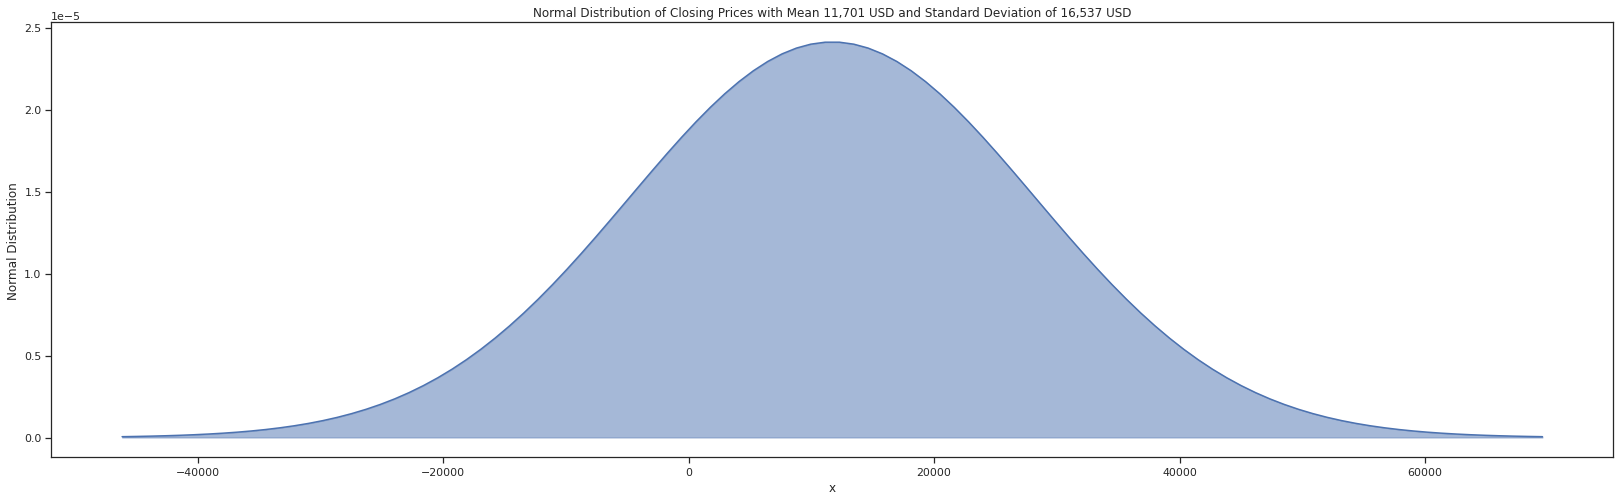

In [ ]:
mean, std = np.array(primary_dataset["Close"]).mean(), np.array(primary_dataset["Close"]).std()
offset = 3.5 * std
n= 100
x = np.linspace(mean-offset, mean+offset, n)

# probability density function
# of the given normal dist.
y = stats.norm.pdf(x, mean, std)

plt.figure(figsize=(28, 8))
plt.plot(x,y)
# put grids on the figure
plt.grid()
plt.xlabel("x")
plt.ylabel("Normal Distribution")
# filling the area below the line
plt.fill_between(x, y, alpha=0.5, color="b")
plt.title("Normal Distribution of Closing Prices with Mean " + str("{:,.0f}".format(mean)) + " USD and Standard Deviation of " + str("{:,.0f}".format(std)) + " USD")
plt.show();

###Distribution of High Prices
The high prices has a mean of \$11,958 and standard deviation of \$16,925. 

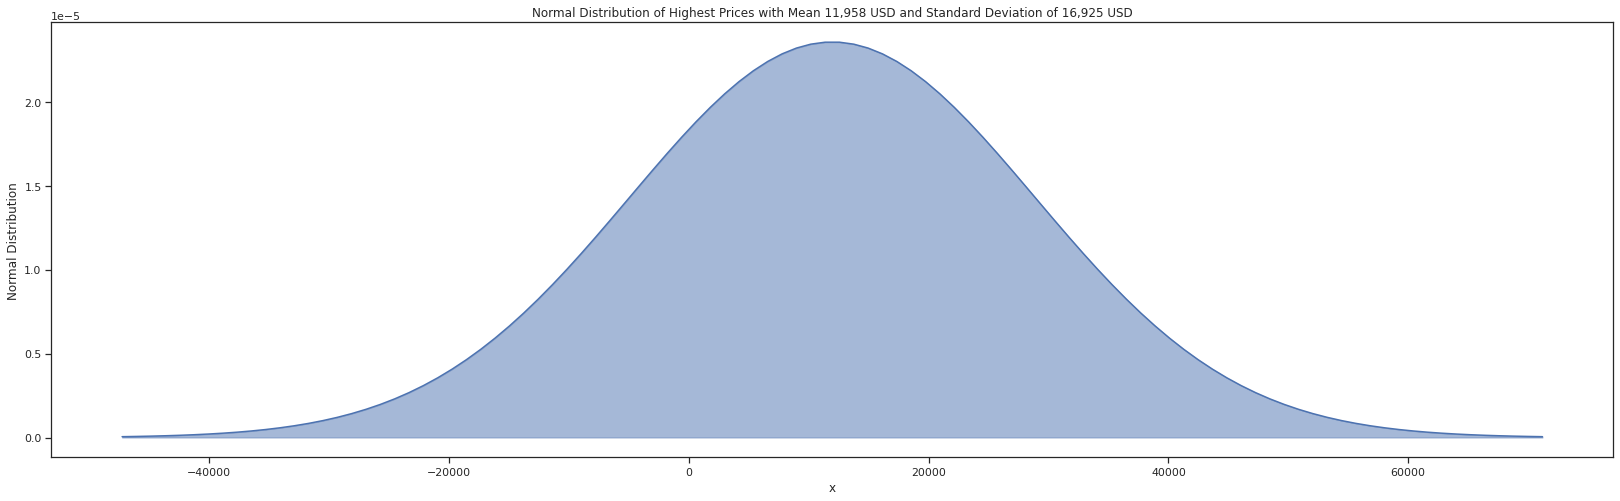

In [ ]:
mean, std = np.array(primary_dataset["High"]).mean(), np.array(primary_dataset["High"]).std()
offset = 3.5 * std
n= 100
x = np.linspace(mean-offset, mean+offset, n)

# probability density function
# of the given normal dist.
y = stats.norm.pdf(x, mean, std)

plt.figure(figsize=(28, 8))
plt.plot(x,y)
# put grids on the figure
plt.grid()
plt.xlabel("x")
plt.ylabel("Normal Distribution")
# filling the area below the line
plt.fill_between(x, y, alpha=0.5, color="b")
plt.title("Normal Distribution of Highest Prices with Mean " + str("{:,.0f}".format(mean)) + " USD and Standard Deviation of " + str("{:,.0f}".format(std)) + " USD")
plt.show();

###Distribution of Low Prices
The low prices has a mean of \$11,395 and standard deviation of \$16,080. 


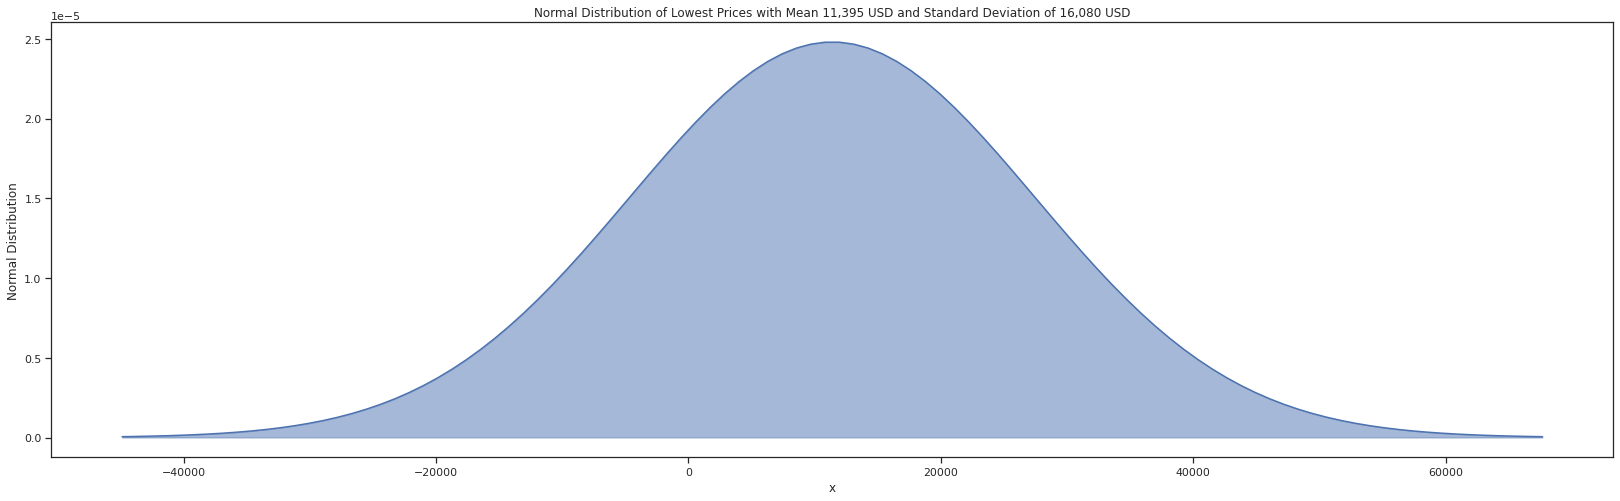

In [ ]:
mean, std = np.array(primary_dataset["Low"]).mean(), np.array(primary_dataset["Low"]).std()
offset = 3.5 * std
n= 100
x = np.linspace(mean-offset, mean+offset, n)

# probability density function
# of the given normal dist.
y = stats.norm.pdf(x, mean, std)

plt.figure(figsize=(28, 8))
plt.plot(x,y)
# put grids on the figure
plt.grid()
plt.xlabel("x")
plt.ylabel("Normal Distribution")
# filling the area below the line
plt.fill_between(x, y, alpha=0.5, color="b")
plt.title("Normal Distribution of Lowest Prices with Mean " + str("{:,.0f}".format(mean)) + " USD and Standard Deviation of " + str("{:,.0f}".format(std)) + " USD")
plt.show();

###Distribution of the Volume

  ***As for Volume, the same logic applies. It has a mean of 14 Billion \$ and 19 Billion $ standard deviation, thereby showing that the more occurence happens in the values that are close to the mean value, and the less occurence happens as gettig far away from the mean value.

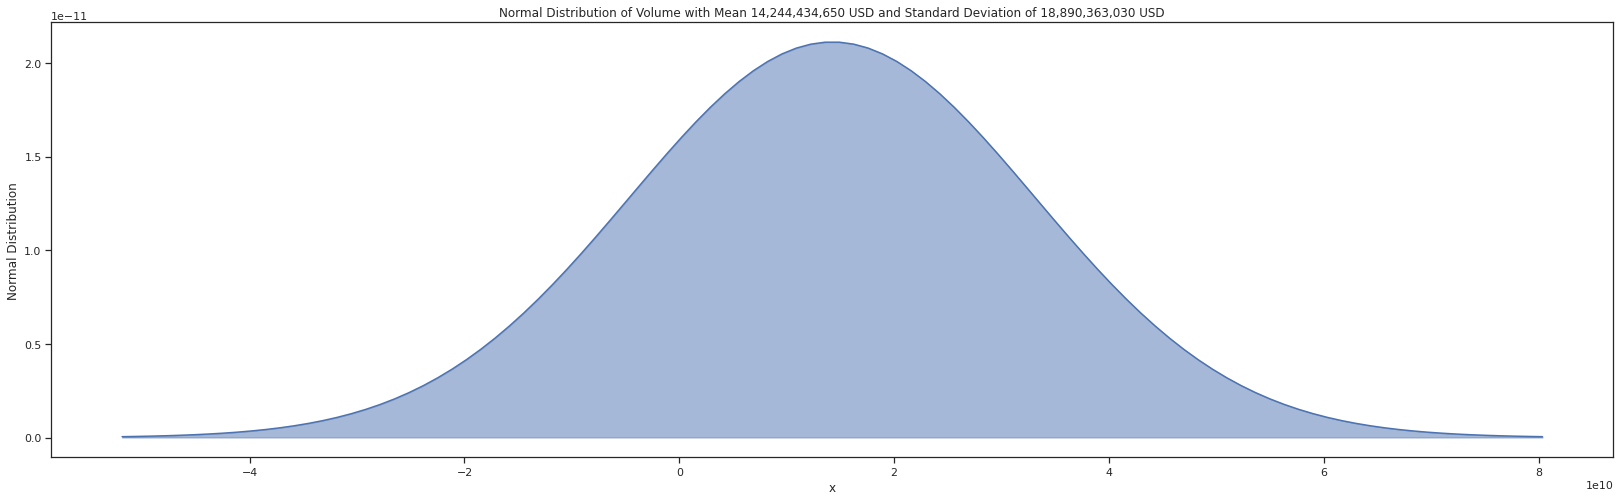

In [ ]:
mean, std = np.array(primary_dataset["Volume"]).mean(), np.array(primary_dataset["Volume"]).std()
offset = 3.5 * std
n= 100
x = np.linspace(mean-offset, mean+offset, n)

# probability density function
# of the given normal dist.
y = stats.norm.pdf(x, mean, std)

plt.figure(figsize=(28, 8))
plt.plot(x,y)
# put grids on the figure
plt.grid()
plt.xlabel("x")
plt.ylabel("Normal Distribution")
# filling the area below the line
plt.fill_between(x, y, alpha=0.5, color="b")
plt.title("Normal Distribution of Volume with Mean " + str("{:,.0f}".format(mean)) + " USD and Standard Deviation of " + str("{:,.0f}".format(std)) + " USD")
plt.show();

#Additional Datasets and Extra Features

To make data exploration more accurate and verifiable, we have opted to choose another dataset that covers the previous dataset. In addition to this, we've also added new features such as `Daily Price Change in Percentage`, a categorical data `Daily Price Change` which categorically captures daily if price is increased since open or not. Finally, we referenced price actions on a weekly basis, explaning in which days were the volume, open-close and high-low prices are better or in which they were dropping.

### Outlier Elimination for the Secondary Dataset

Previously done to the primary data source, we should also check for outliers in this dataset and try to get rid of them for a heathy analysis. The same IQR method is also applied here

In [ ]:
secondary_copy = secondary_dataset.copy()
secondary_dataset['Biggest Change'] = ((secondary_dataset['High'] - secondary_dataset['Low']) / secondary_dataset["Low"]) *100

# Apply the technique
Q1 = np.percentile(secondary_dataset['Biggest Change'], 25, interpolation = 'midpoint')

Q3 = np.percentile(secondary_dataset['Biggest Change'], 75, interpolation = 'midpoint')
IQR = Q3 - Q1

upper = np.where(secondary_dataset['Biggest Change'] >= (Q3 + 1.5 * IQR))
lower = np.where(secondary_dataset['Biggest Change'] <= (Q1 -1.5  * IQR))

secondary_dataset.drop(upper[0], inplace = True)
secondary_dataset.drop(lower[0], inplace = True)

### Adding New Features to the Dataset

On the next code block a series of new features will be built on our new dataset to make analysis easier.

In [ ]:
secondary_dataset["Daily Average"] = (secondary_dataset["Open"] +secondary_dataset["Close"]) / 2
secondary_dataset["Daily Percentage Change"] = ((secondary_dataset["Close"] -secondary_dataset["Open"]) /secondary_dataset["Open"]) * 100.0
secondary_time = secondary_dataset[secondary_dataset["Date"] > '2020-06-01 00:00:00']

In [ ]:
def open_close_level(dataset):
    if float(dataset["Open"]) > float(dataset["Close"]):
        return "Daily Price Decrease"
    elif float(dataset["Open"]) < float(dataset["Close"]):
        return "Daily Price Increase"
    else:
        return "No Change"

primary_dataset["Daily Verbal Change"] = primary_dataset.apply(open_close_level, axis = "columns")
secondary_dataset["Daily Verbal Change"] = secondary_dataset.apply(open_close_level, axis = "columns")
freq_of_Change = pd.crosstab(index = primary_dataset["Daily Verbal Change"], columns = "Days")

# <font color = "Darkred">  Daily Price Increase vs Decrease</font>

In this **Pie Chart**, one can see in which portion of the total days, the daily price increase and decrease. It looks like their occurence are balanced, however when considering the size of the data,the fact that the daily price increase happened more than the decrease have an important impact and meaning.


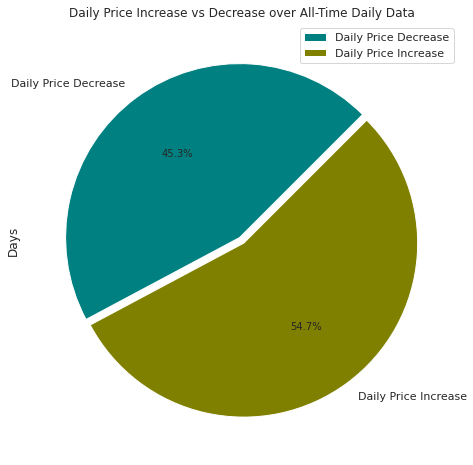

In [ ]:
# Draw Daily price increase vs daily price decrease by comparing their % in days.
freq_of_Change.plot(startangle = 45, y = "Days" ,title = "Daily Price Increase vs Decrease over All-Time Daily Data",
                    kind = "pie", figsize= (28,8),autopct = '%1.1f%%', shadow = False, colors = ["teal", "olive"], explode = (0.02, 0.02));

### Additional Feature for Weekly Analysis
For the next few code blocks, data analysis will be made on a weekly basis with bar charts and bar plots, which will show us the centrality metrics for weekly BTC price change.

In [ ]:
def converter(row): # assign the days to datetime objects
    if row["Date"].strftime('%A') == dt.datetime(2021, 11, 1).strftime('%A'):
        return "Monday"
    elif row["Date"].strftime('%A') == dt.datetime(2021, 11, 2).strftime('%A'):
        return "Tuesday"
    elif row["Date"].strftime('%A') == dt.datetime(2021, 11, 3).strftime('%A'):
        return "Wednesday"
    elif row["Date"].strftime('%A') == dt.datetime(2021, 11, 4).strftime('%A'):  
        return "Thursday"
    elif row["Date"].strftime('%A') == dt.datetime(2021, 11, 5).strftime('%A'):
        return "Friday"
    elif row["Date"].strftime('%A') == dt.datetime(2021, 11, 6).strftime('%A'):
        return "Saturday"
    elif row["Date"].strftime('%A') == dt.datetime(2021, 11, 7).strftime('%A'):
        return "Sunday"

secondary_dataset["Days"] = secondary_dataset.apply(converter, axis = 1) # new column indicating the day as a string value
primary_dataset["Days"] = primary_dataset.apply(converter, axis = 1)
grouped_data = secondary_dataset.groupby(by = "Days") # group the data by Days

 #calculate the total volumes of each day
Monday = secondary_dataset[secondary_dataset["Days"] == "Monday"]["Volume"].sum()
Tuesday = secondary_dataset[secondary_dataset["Days"] == "Tuesday"]["Volume"].sum()
Wednesday = secondary_dataset[secondary_dataset["Days"] == "Wednesday"]["Volume"].sum()
Thursday = secondary_dataset[secondary_dataset["Days"] == "Thursday"]["Volume"].sum()
Friday = secondary_dataset[secondary_dataset["Days"] == "Friday"]["Volume"].sum()
Saturday = secondary_dataset[secondary_dataset["Days"] == "Saturday"]["Volume"].sum()
Sunday = secondary_dataset[secondary_dataset["Days"] == "Sunday"]["Volume"].sum()

#Checking for Trading Volume on Each Day of the Week
>To create this bar chart, firstly data is grouped by each day of the week. Then, the volume of each day is shown, so it can be seen which day has more volume in trading and which day has less. By that, it can be understood on which day there is more movement, more density of input and outputs. As shown in this bar chart Saturday and Sunday have the biggest volumes as weekend days while Tuesday has the least volume with a significant difference. In the future, this may be used as an indicator to select the best trading time.
  

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


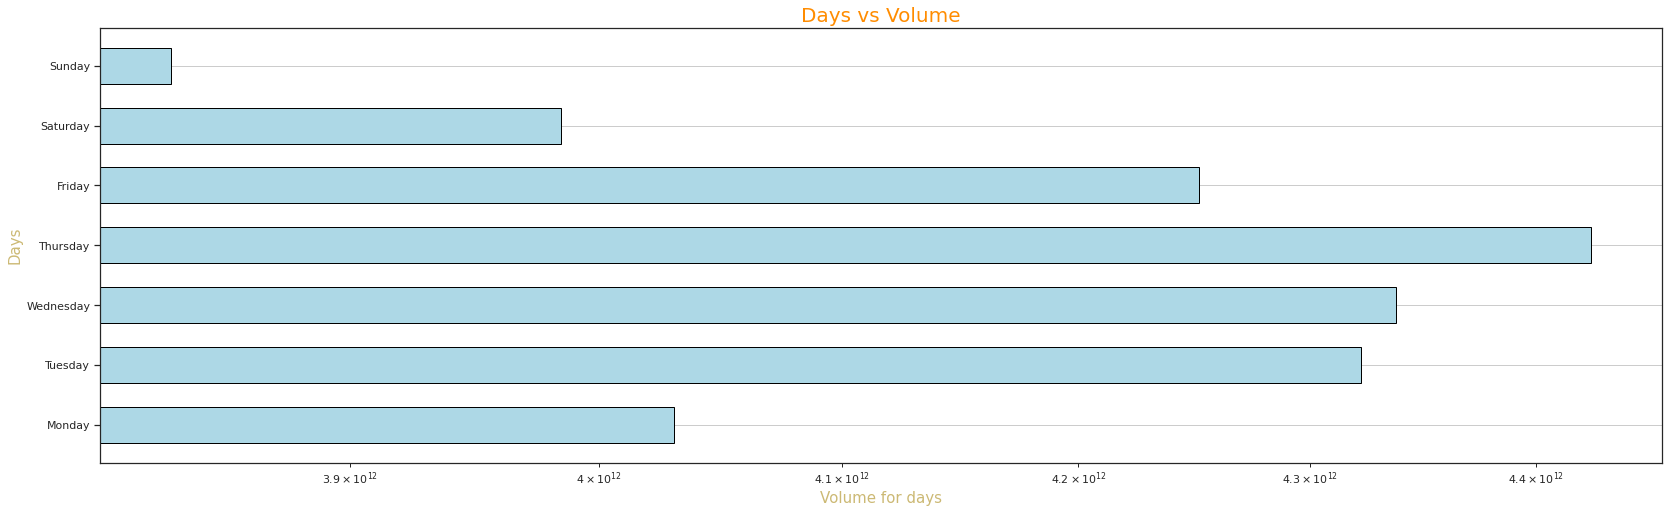

In [ ]:
categories = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
volumes = [Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, Sunday]

fig , ax = plt.figure(figsize=(28,8)), plt.subplot()

plt.barh(categories,volumes,color="lightblue", height=0.6,log = True, edgecolor= "black")
plt.ylabel("Days",fontsize = 15, color = "y")
plt.xlabel("Volume for days",fontsize = 15, color = "y")
plt.title("Days vs Volume", fontsize = 20, color = "darkorange")
plt.show();

#Box Plots
![](https://i.ytimg.com/vi/BE8CVGJuftI/maxresdefault.jpg)


 **A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It also shows the outliers and their values.
Moreover It can indicate if the data is symmetrical, how tightly the data is grouped, and if and how the data is skewed.**


##Checking for Sum of High Values on Each Day of the Week

  Here, The boxplot of Days vs sum of high prices are shown. One can see the sum of high prices of each day in the week and the fact that, the mean, median and the minimum of the sum of high prices are very close to each other for every day. Maximum values vary a little bit from day to day which is clearly shown in the right tail of the boxplots. Furthermore, the natural outliers of the each day also can be seen in the box plots as little equilateral quadrangle shapes.



  Numerically, the minimum values are close to the 0\$ whereas maximum values for each day are close to the 20,000\$ and the natural outliers scatter around the prices between 30,000\$ and 60,000\$

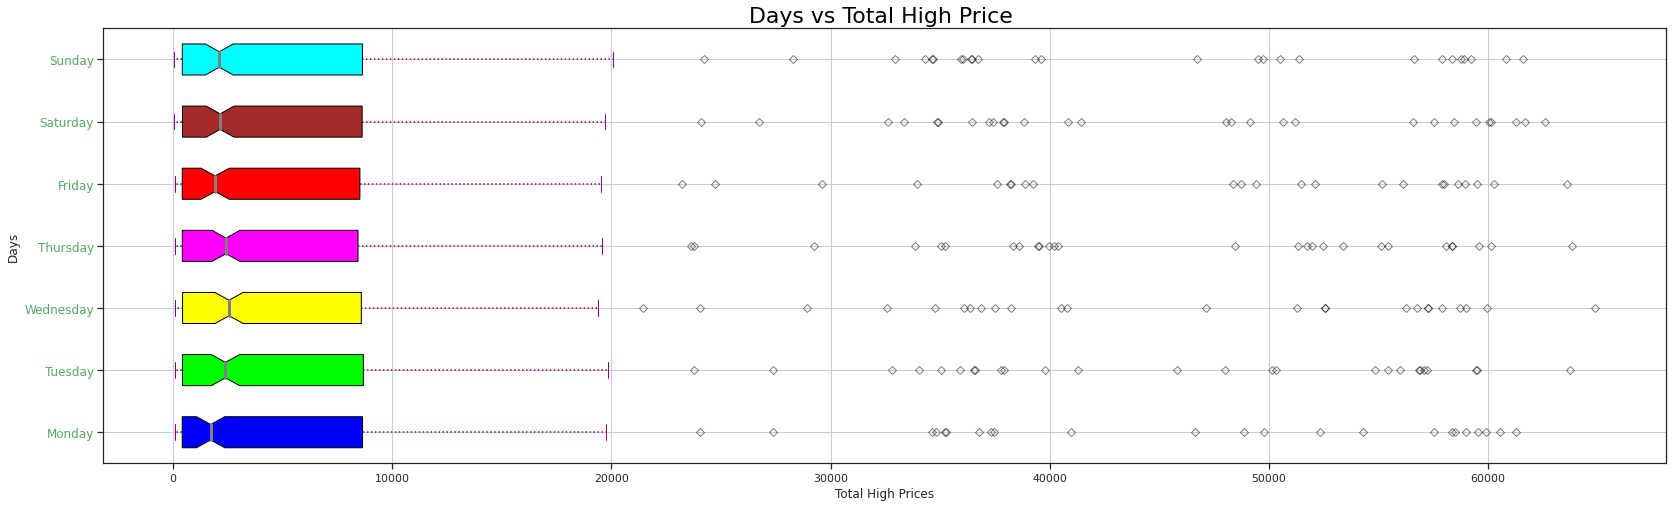

In [ ]:

monday_h = secondary_dataset[secondary_dataset["Days"] == "Monday"]["High"]
tuesday_h = secondary_dataset[secondary_dataset["Days"] == "Tuesday"]["High"]
wednesday_h = secondary_dataset[secondary_dataset["Days"] == "Wednesday"]["High"]
thursday_h = secondary_dataset[secondary_dataset["Days"] == "Thursday"]["High"]
friday_h = secondary_dataset[secondary_dataset["Days"] == "Friday"]["High"]
saturday_h = secondary_dataset[secondary_dataset["Days"] == "Saturday"]["High"]
sunday_h = secondary_dataset[secondary_dataset["Days"] == "Sunday"]["High"]

categories = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
highest = np.array([monday_h,tuesday_h,wednesday_h,thursday_h,friday_h,saturday_h,sunday_h], dtype = object)

fig1 = plt.figure(figsize =(28, 8))
ax3 = fig1.add_subplot(111)

bp = ax3.boxplot(highest, patch_artist = True,
                notch ='True', vert = 0)
colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF', "red" ,"brown","cyan"]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 1)
for median in bp['medians']:
    median.set(color ='grey',
               linewidth = 3)
    
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)
ax3.set_yticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],fontsize = 12, color = "g")
plt.ylabel("Days")
plt.xlabel("Total High Prices")
ax3.get_xaxis().tick_bottom()
ax3.get_yaxis().tick_left()
plt.title("Days vs Total High Price ",fontsize = 22, color = "black")
plt.show();

##Checking for Sum of Low Values on Each Day of the Week

Here the same logic applies again with the previous boxplot, however it is not highest prices anymore, the lowest prices instead. Numerical values are almost the same with the previous one, however one can see more detailly from the boxplot.


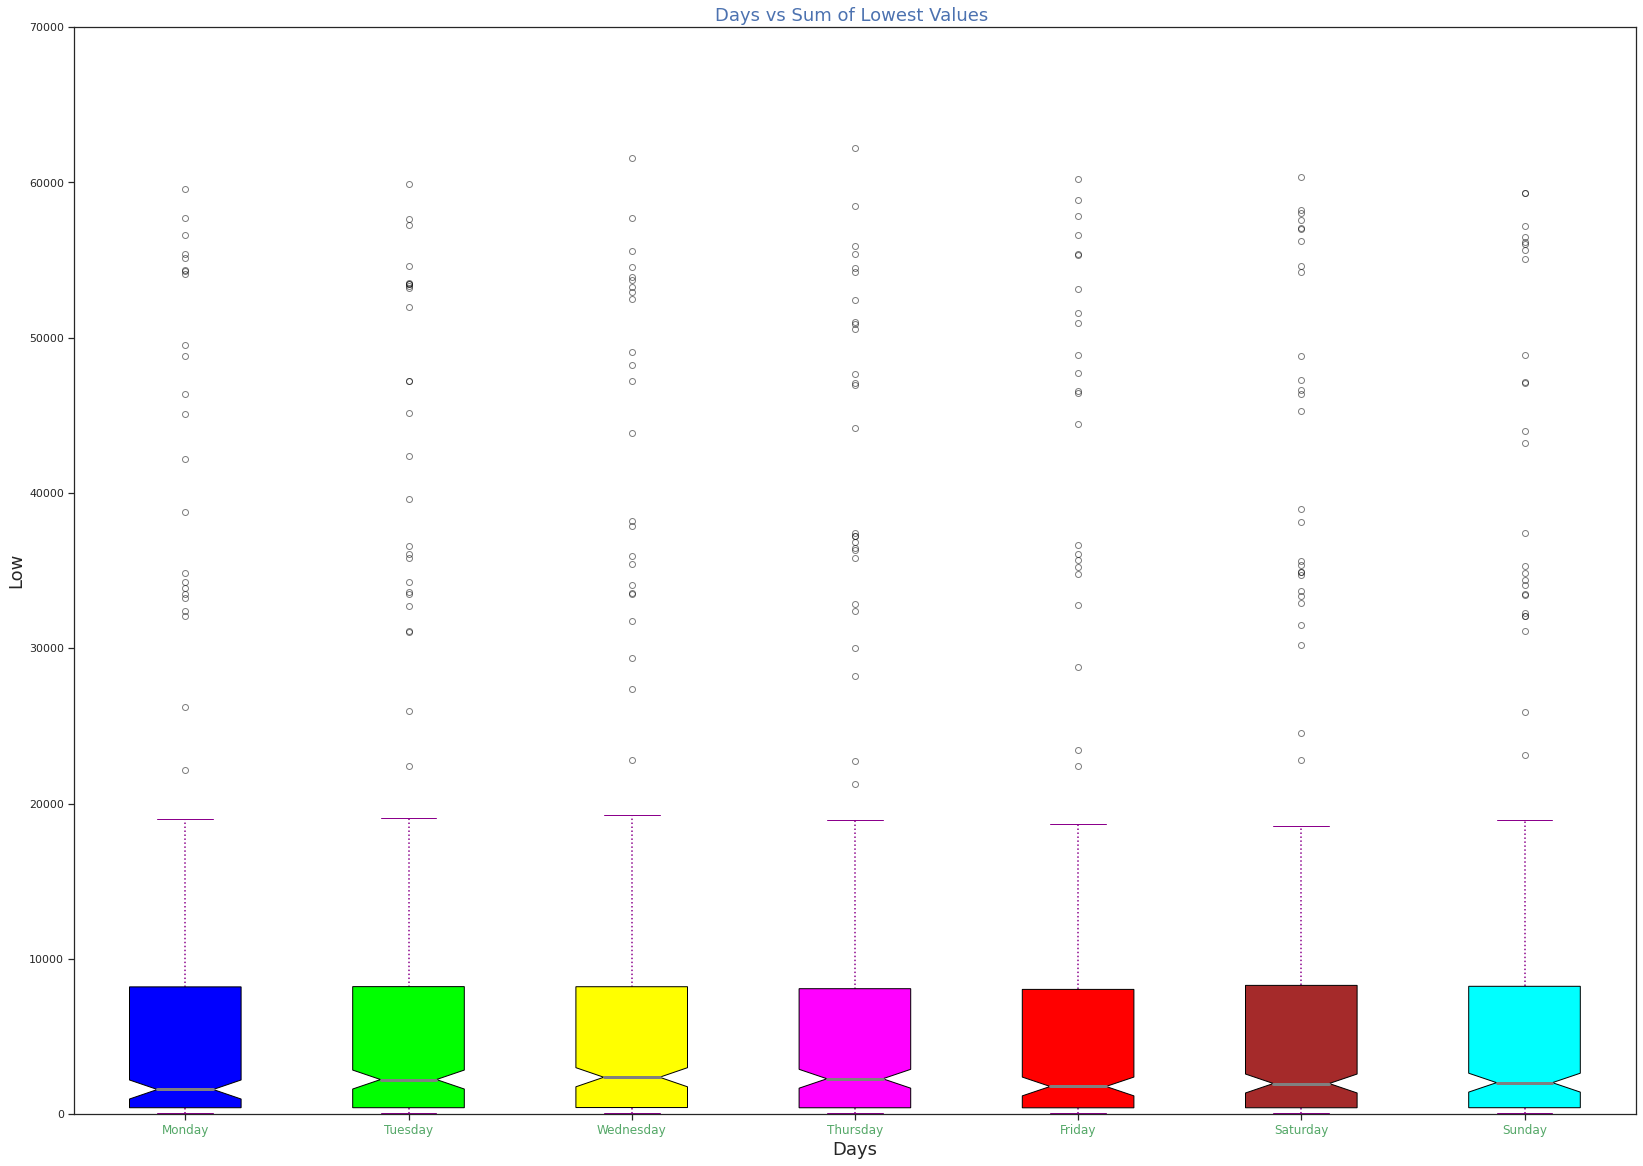

In [ ]:
secondary_dataset["Days"] = secondary_dataset.apply(converter, axis = 1)
grouped_data_l = secondary_dataset.groupby(by = "Days")
monday_l = secondary_dataset[secondary_dataset["Days"] == "Monday"]["Low"]
tuesday_l = secondary_dataset[secondary_dataset["Days"] == "Tuesday"]["Low"]
wednesday_l = secondary_dataset[secondary_dataset["Days"] == "Wednesday"]["Low"]
thursday_l = secondary_dataset[secondary_dataset["Days"] == "Thursday"]["Low"]
friday_l = secondary_dataset[secondary_dataset["Days"] == "Friday"]["Low"]
saturday_l = secondary_dataset[secondary_dataset["Days"] == "Saturday"]["Low"]
sunday_l = secondary_dataset[secondary_dataset["Days"] == "Sunday"]["Low"]
categories = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
lowest = np.array([monday_l,tuesday_l,wednesday_l,thursday_l,friday_l,saturday_l,sunday_l], dtype = object)

fig1 = plt.figure(figsize =(28, 20))
ax3 = fig1.add_subplot(111)

bp = ax3.boxplot(lowest, patch_artist = True,
                notch ='True', vert = 1)
colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF', "red" ,"brown","cyan"]
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
 
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 1)
for median in bp['medians']:
    median.set(color ='grey',
               linewidth = 3)
    
for flier in bp['fliers']:
    flier.set(
              color ='#e7298a',
              alpha = 0.5)
ax3.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"],fontsize = 12, color = "g")
plt.ylabel("Low", fontsize = 18)
plt.xlabel("Days", fontsize = 18)
plt.ylim([0,70000])
plt.yticks()
ax3.get_xaxis().tick_bottom()
ax3.get_yaxis().tick_left()
plt.title("Days vs Sum of Lowest Values ",fontsize = 18, color = "b")
plt.grid()
plt.show();

# Bar Charts

## Days vs. Sum of Openning Prices

>This bar chart shows the sum of opening prices for each day. Using the data previously grouped by days, it is aimed to find if there is a significant difference in opening prices of each day. Therefore by summing up the opening prices for that day, a data is reached. As can be seen on bar chart, Saturday and Wednesday have the highest opening values while Tuesday has the least opening value. By using this analyse, there is a chance to plan future steps for trading.

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


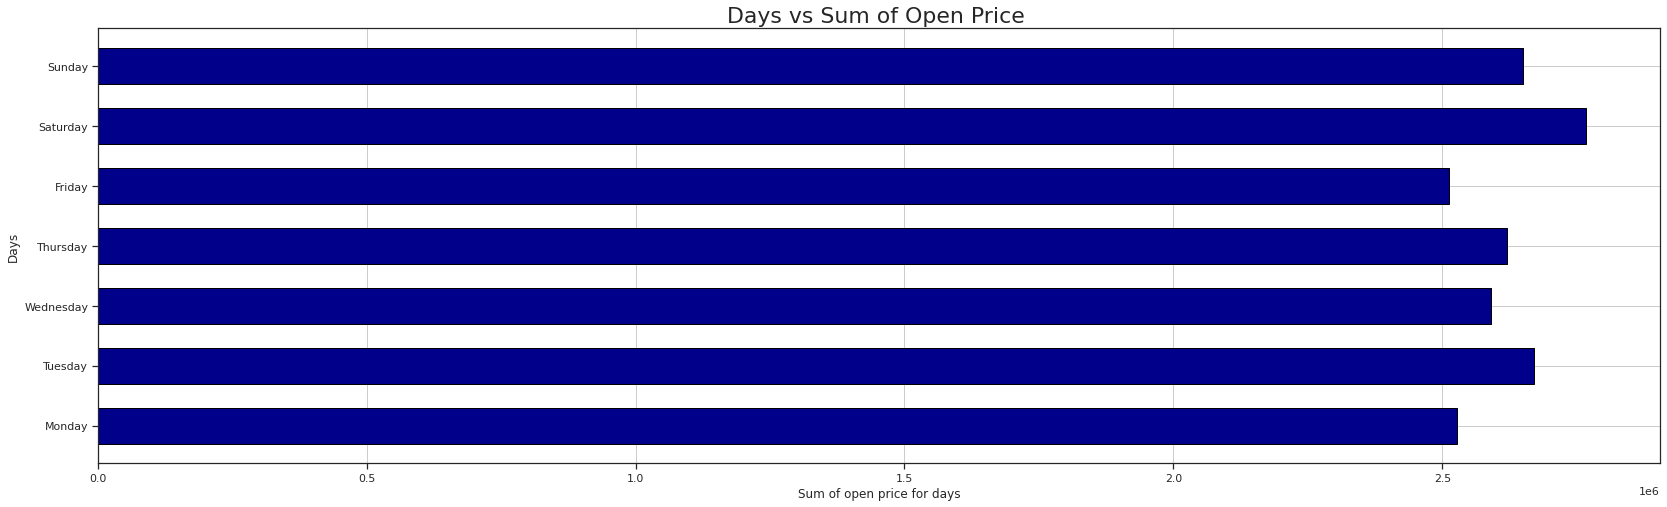

In [ ]:
monday_o = secondary_dataset[secondary_dataset["Days"] == "Monday"]["Open"].sum()
tuesday_o = secondary_dataset[secondary_dataset["Days"] == "Tuesday"]["Open"].sum()
wednesday_o = secondary_dataset[secondary_dataset["Days"] == "Wednesday"]["Open"].sum()
thursday_o = secondary_dataset[secondary_dataset["Days"] == "Thursday"]["Open"].sum()
friday_o = secondary_dataset[secondary_dataset["Days"] == "Friday"]["Open"].sum()
saturday_o = secondary_dataset[secondary_dataset["Days"] == "Saturday"]["Open"].sum()
sunday_o = secondary_dataset[secondary_dataset["Days"] == "Sunday"]["Open"].sum()
categories = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
open_ = [monday_o,tuesday_o,wednesday_o,thursday_o,friday_o,saturday_o,sunday_o]
fig_o = plt.figure(figsize = (28,8))
plt.barh(categories, open_, color = "darkblue", height = 0.6,  edgecolor= "black")

plt.ylabel("Days")
plt.xlabel("Sum of open price for days")
plt.title("Days vs Sum of Open Price ",fontsize = 22)
plt.show();


## Days vs. Sum of Closing Prices
> The same logic with the previous bar chart, but here is the barchart of the sum of closing prices of each day in the week. Same interpretations can be done on the bar chart. 

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


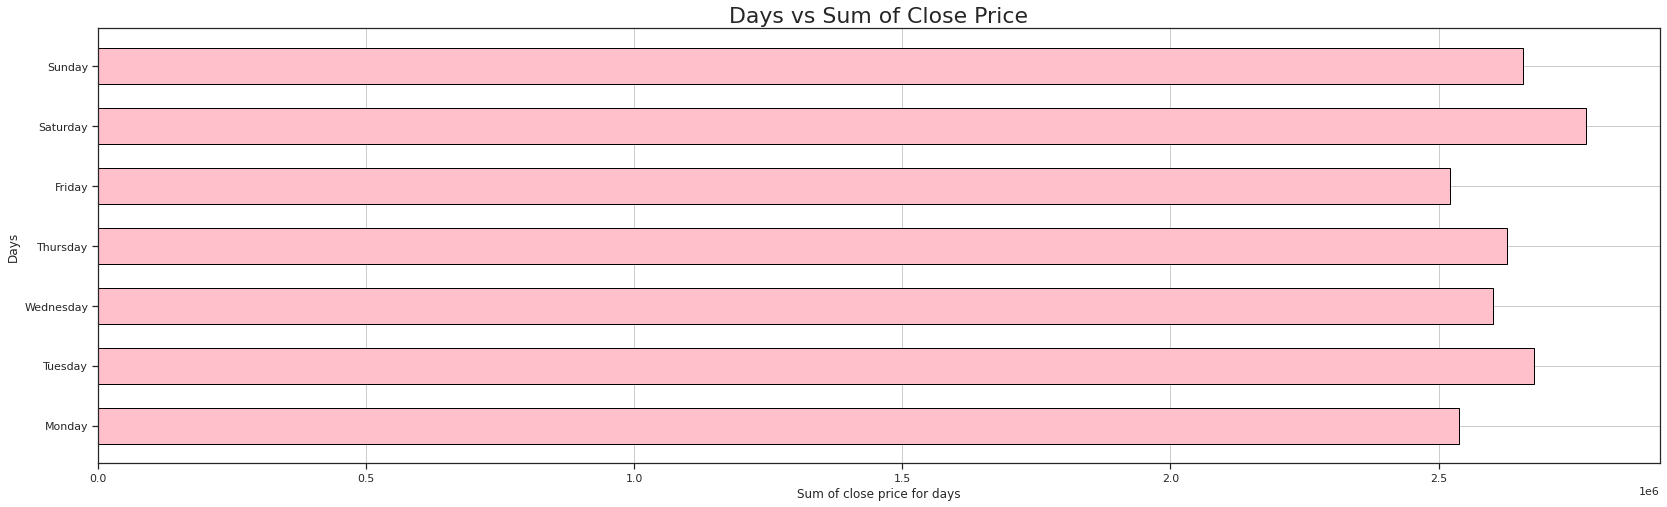

In [ ]:


monday_c = secondary_dataset[secondary_dataset["Days"] == "Monday"]["Close"].sum()
tuesday_c = secondary_dataset[secondary_dataset["Days"] == "Tuesday"]["Close"].sum()
wednesday_c = secondary_dataset[secondary_dataset["Days"] == "Wednesday"]["Close"].sum()
thursday_c = secondary_dataset[secondary_dataset["Days"] == "Thursday"]["Close"].sum()
friday_c = secondary_dataset[secondary_dataset["Days"] == "Friday"]["Close"].sum()
saturday_c = secondary_dataset[secondary_dataset["Days"] == "Saturday"]["Close"].sum()
sunday_c = secondary_dataset[secondary_dataset["Days"] == "Sunday"]["Close"].sum()
categories = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
close_ = [monday_c,tuesday_c,wednesday_c,thursday_c,friday_c,saturday_c,sunday_c]
fig_c = plt.figure(figsize = (28,8))
plt.barh(categories,close_,color="pink", height=0.6,edgecolor= "black")

plt.ylabel("Days")
plt.xlabel("Sum of close price for days")
plt.title("Days vs Sum of Close Price", fontsize = 22)
plt.show()

# Daily Change on Time Series

> Here is the time series of the daily price change percentage of Bitcoin data with respect to time interval between 2013-2022. The back and forth movement of the line shows the daily change in percentage which is averaged around 0.35% overall.

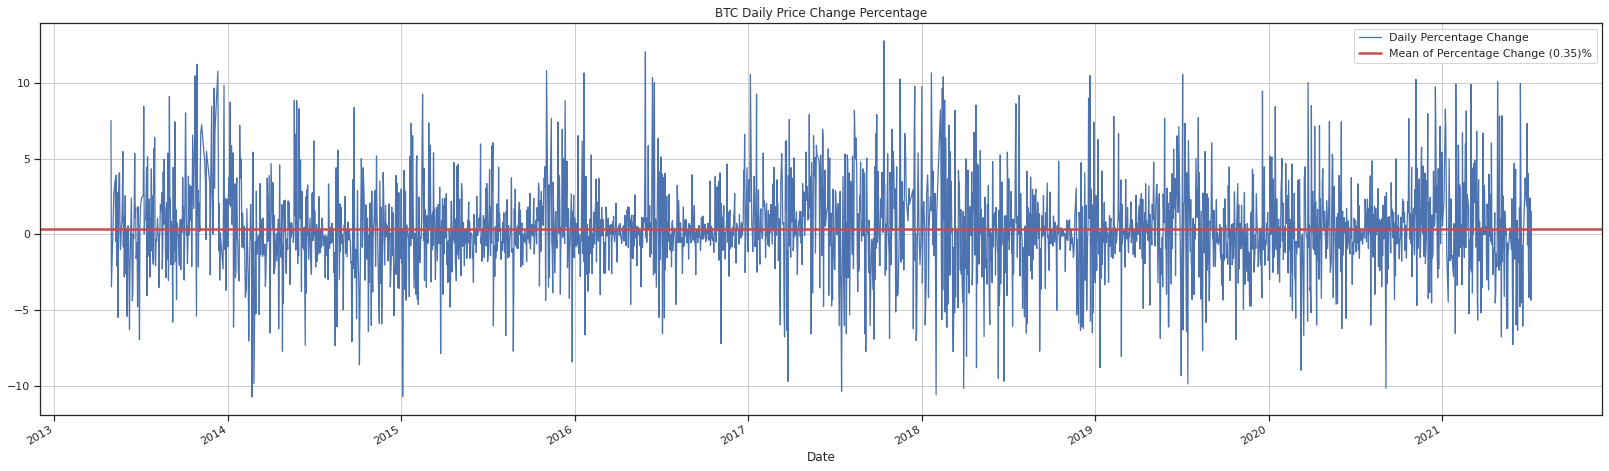

In [ ]:
secondary_dataset.plot(x = "Date", y = "Daily Percentage Change", kind = "line", figsize = (28,8), title = "BTC Daily Price Change Percentage", linewidth = 1.25)
plt.axhline(secondary_dataset["Daily Percentage Change"].mean(), color='r', linestyle='-', linewidth = 2.5,
            label = "Mean of Percentage Change (" + str("{:.2f}".format(secondary_dataset["Daily Percentage Change"].mean())) + ")%")
plt.legend();

# Future Work

<font color="black">
Throughout this step we completed “exploratory data analysis”, we collect data and analyzed datasets mentioned in the “utilized datasets”. Then we visualized them using Python. Thanks to these, now we are able to continue with “Statistical Analysis & Hypothesis Testing”, so our future steps will be like this:<br>
</font>

```
-Applying statistical tests to find out relationships between price actions and market phase,

-Time series analysis with the help of our visualized data,

-Checking if there is a trend, seasonal, cyclical, or horizontal change,

-Define the significant differences between the months of a single year and the same month of different years,

-Determining statistically meaningful price actions over various time frames,

-analyzing the effects of big world events try to find their effect on graphs,

-Checking in which ways, if any, volume and the other features of the data set affect the opening price of the upcoming day or the closing price of the current day, 

-Determining the relationship between them
```

# Hypothesis Testing

This part of our project will hepls us to find a research field for Bitcoin Price Prediction Algorithm. Any Alternative Hypothesis that will be accepted in this part will be used for Machine Learnign Process to correctly forecast every data for Bitcoin Price point.

For testing our Alternative Hypothesis' validity, we will be taking "α" value 0.05 for 90% accuracy whe calculating.

In [ ]:
from scipy.stats import ttest_ind, chi2_contingency
from scipy.stats import spearmanr
from scipy import special
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
alpha = 0.05;

## First Hypothesis


</span>

 - **Null Hypothesis ($\large{H_0}$)**: Time series of Bitcoin data can be shown by a unit root that is not stationary, meaning that the Time series can be affected by trends and seasonal effects.
 - **Alternative Hypothesis ($\large{H_A}$)**: Time series Bitcoin data is a stationary Time Series graph.

## Stationary Time Series Testing
When analyzing a time series, testing it with [ADF Test](https://www.machinelearningplus.com/time-series/augmented-dickey-fuller-test/) or known as "Augmented Dickey-Fuller Test" helps us to see if our dataset is afected by trends and seasonal events. It is a statistical unit root test. Our Null Hypothesis states that the dataset's Time Series graphs aren't affected by such outside conditions and the Alternative Hothesis states otherwise, that there are outside effects on the time series of bitcoin price. By finding an unit root of the time series, we can show that the time series is non-stationary.

</span>


if p-value > 0.05:  Fail to reject the null hypothesis ($\large{H_0}$), the data does have a unit root and is non-stationary.

if p-value <= 0.05:  Reject the null hypothesis ($\large{H_0}$), the data does not have a unit root and is stationary.

In [ ]:
# First we have to sample less than 10% of the whole dataset with random sampling methods
sample_len_h1 = int(len(secondary_dataset) * 9.5 / 100) #nearly 9.5% of the dataset
sample_h1 = secondary_dataset.sample(n = sample_len_h1)
sample_h1 = sample_h1.sort_index(axis = 0) #sorting so that the ADF test can work it's magic

result = adfuller(sample_h1["Daily Average"])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.480059
p-value: 0.984254
Critical Values:
	1%: -3.457
	5%: -2.873
	10%: -2.573


#### Interpretation
Before the test, we have randomly sampled the 9.5% of the dataset's data. The special "adfuller" function ran the ADF test within the sampled data. As a result, we printed some of the important details of our result dictionary. It returned the p-value, the critical regions' value and the ADF result.
Because our p-value is > 0.05, we cannot reject the null hypothesis, therefore the data does have a unit root and is-non stationary. Since our ADF score is > t-values at 1%, 5% and 10%; we can conclude that null hypothesis is valid Additionally, we took our confidence interval at 5% and the results matches our implications.

## Second Hypothesis


</span>

 - **Null Hypothesis ($\large{H_0}$)**: Day of the week has no effect on the bitcoin price increase or decrease.
 - **Alternative Hypothesis ($\large{H_A}$)**: Day of the week has effect on the bitcoin price increase or decrease.

## Day of the Week's Effect on the Bitcoin Price
In this hypothesis testing part, we are checking if there's any significant day of the week that affects bitcoins price substantially, increase or decrease.

</span>

 - **($\large{H_0}$)**: ($\large{\bar{x}_{monday}}$) = ($\large{\bar{x}_{tuesday}}$) = ($\large{\bar{x}_{wednesday}}$) = ($\large{\bar{x}_{thursday}}$) = ($\large{\bar{x}_{friday}}$) = ($\large{\bar{x}_{saturday}}$) = ($\large{\bar{x}_{sunday}}$) 

 - **($\large{H_A}$)**: ($\large{\bar{x}_{monday}}$) ≠ ($\large{\bar{x}_{tuesday}}$) ≠ ($\large{\bar{x}_{wednesday}}$) ≠ ($\large{\bar{x}_{thursday}}$) ≠ ($\large{\bar{x}_{friday}}$) ≠ ($\large{\bar{x}_{saturday}}$) ≠ ($\large{\bar{x}_{sunday}}$)



### Interpretation
if p-value > 0.05:  Fail to reject the null hypothesis ($\large{H_0}$), Day of the week has no effect on the bitcoin price increase or decrease.

if p-value <= 0.05:  Reject the null hypothesis ($\large{H_0}$), Day of the week has effect on the bitcoin price increase or decrease.

In [ ]:
sample_h2 = secondary_dataset.sample(n = int(len(secondary_dataset) * 9.5 / 100) )
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'Degree of Freedom', 'Sum Square', 'Mean Square', 'F value', 'P-value', 'F critical']) 
anova_table.set_index('Source of Variation', inplace = True)
x_bar = sample_h2['Daily Average'].mean()
SSTR = sample_h2.groupby('Days').count() * (sample_h2.groupby('Days').mean() - x_bar)**2
anova_table['Sum Square']['Between Groups'] = SSTR['Daily Average'].sum()
SSE = (sample_h2.groupby('Days').count() - 1) * sample_h2.groupby('Days').std()**2
anova_table['Sum Square']['Within Groups'] = SSE['Daily Average'].sum()
SSTR = SSTR['Daily Average'].sum() + SSE['Daily Average'].sum()
anova_table['Sum Square']['Total'] = SSTR
anova_table['Degree of Freedom']['Between Groups'] = sample_h2['Days'].nunique() - 1
anova_table['Degree of Freedom']['Within Groups'] = sample_h2.shape[0] - sample_h2['Days'].nunique()
anova_table['Degree of Freedom']['Total'] = sample_h2.shape[0] - 1
anova_table['Mean Square'] = anova_table['Sum Square'] / anova_table['Degree of Freedom']
F = anova_table['Mean Square']['Between Groups'] / anova_table['Mean Square']['Within Groups']
anova_table["F value"]['Between Groups'] = F
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['Degree of Freedom']['Between Groups'], anova_table['Degree of Freedom']['Within Groups'])
anova_table['F critical']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['Degree of Freedom']['Between Groups'], anova_table['Degree of Freedom']['Within Groups'])
anova_table

Degree of Freedom          Sum Square       Mean Square  \
Source of Variation                                                           
Between Groups                      6    374683901.588272   62447316.931379   
Within Groups                     258  45376062622.062904  175876211.713422   
Total                             264  45750746523.651176  173298282.286557   

                      F value   P-value F critical  
Source of Variation                                 
Between Groups       0.355064  0.906576   2.133816  
Within Groups                                       
Total

### Conclusion
Because the P value > 0.05, which is higher than our benchmark, we cannot reject the null hypothesis. The higher F-value (variation between sample means / variation within the samples) leads to a lower P-value, which increases our chances to reject the null hypothesis. Thus we can conclude that there isn't any relationship between the day of the week and the bitcoin's Daily Average price.

## Third Hypothesis

</span>

 - **Null Hypothesis ($\large{H_0}$)**: Bitcoin's price point isn't affected by the previous days' performance.
 - **Alternative Hypothesis ($\large{H_A}$)**: Bitcoin's price point is affected by the previous days' performance.

### ACF Test

When analyzing the correlation between bitcoin's past performance on the next price point, we need to conduct [ACF](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/) (Autocorrelation Function) Test to see if our observations on time series are random or there's a correlation between the adjacent observations and a forecasting can be conducted. We will set the confidence interval of out test to 0.05.

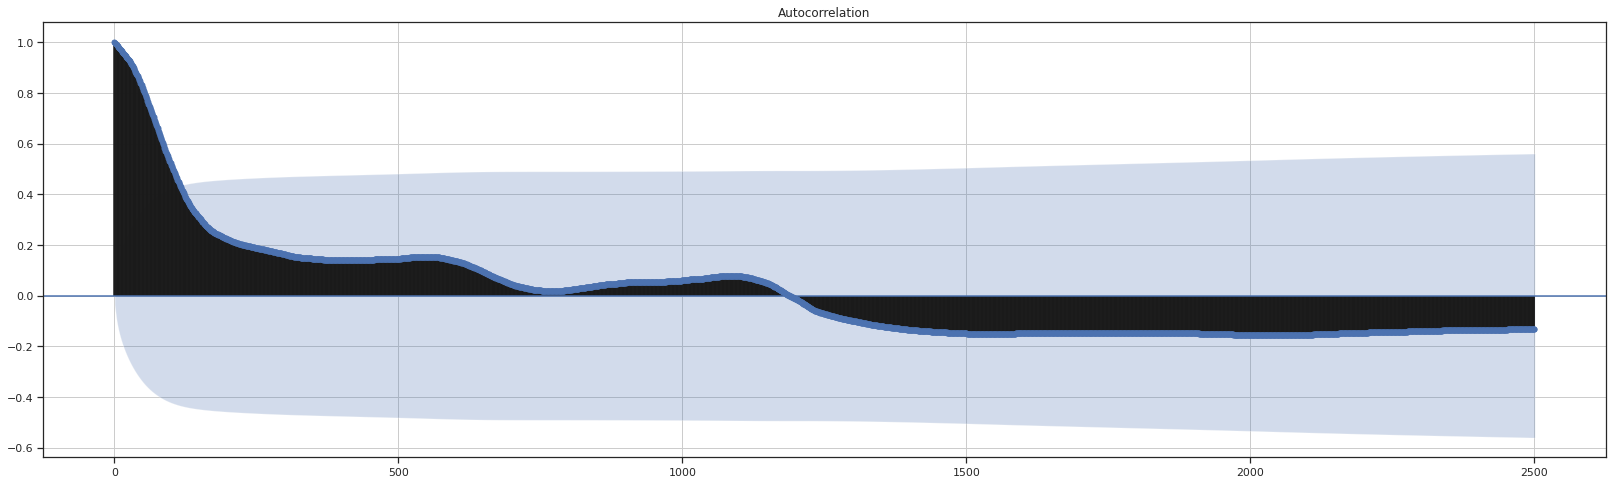

In [ ]:
plt.rc("figure", figsize=(28,8))
plot_acf(secondary_dataset["Daily Average"], alpha = alpha, lags = 2500)
plt.show();

### Interpretation of the First Graph Without Sampling
The ACF Plot of the Daily Average Bitcoin Price shows us the correlation between adjacent observations. The decreasing, decaying blue line (actuallly a point, but since there are 2500 points it became a line) and the highly significant first observation suggest that the time series isn't affected by the previous days' peformance and susceptible to the trends and patterns and it's non-stationary. The light blue shaded are represents our confidence interval, which we set to 90% confidence. The points under "0" imply that there's a negative correlation and the |x| < 0.5 also implys that there's a weak correlation. Any value in the confidence interval means that the data point has o correlation with the forthcoming price point. Between 100-250 data point, the data loses it's forecasting abilities. Thus most of the data is in the confidence interval, showing that the p value is more than 0.05; therefore we cannot reject the null hypothesis. 

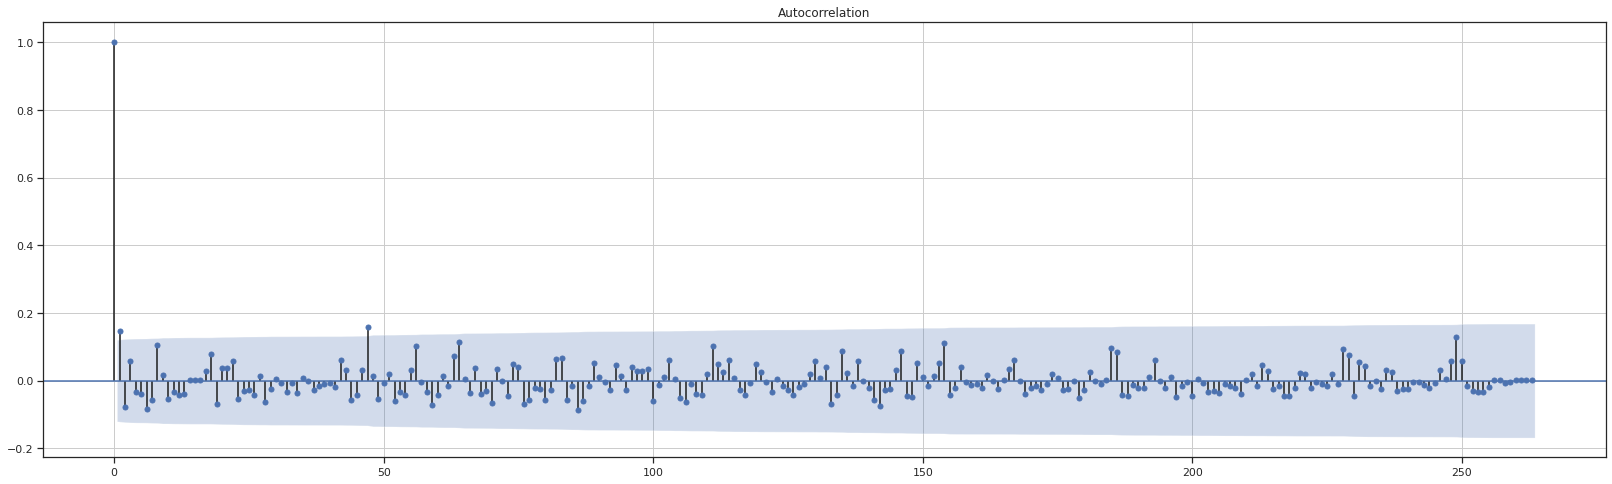

In [ ]:

sample_h3 = secondary_dataset.sample(n = int(len(secondary_dataset) * 9.5 / 100))
sample_h3.sort_index(axis = 0)
plt.rc("figure", figsize=(28,8))
plot_acf(sample_h3["Daily Average"], alpha = alpha, lags = 263)
plt.show();

### Interpretation of the Second Graph With Sampling

The results are nearly same, with most of the datapoints are in the confidence interval, with decreasing correlation level with every consecutive value. Therefore we've failed to reject the null hypothesis also this time. Same rules as the previous graph also applies here.

### Fourth Hypothesis Testing
</span>

 - **Null Hypothesis ($\large{H_0}$)**: Time Series of Bitcoin's daily change rate  can be shown by a unit root that is not stationary, meaning that the Time series can be affected by trends and seasonal effects.
 - **Alternative Hypothesis ($\large{H_A}$)**: Time Series of Bitcoin's daily change rate is a stationary Time Series graph.

### ADF Testing

We will be using the ADF Test again bu this time, we'll testing it on the Bitcoin's Daily Price Change Rate, which shows how much of a percentage increase or decrease the price has gone through.


</span>

if p-value > 0.05:  Fail to reject the null hypothesis ($\large{H_0}$), the data does have a unit root and is non-stationary.

if p-value <= 0.05:  Reject the null hypothesis ($\large{H_0}$), the data does not have a unit root and is stationary

In [ ]:
sample_len_h4 = int(len(secondary_dataset) * 9.5 / 100) #nearly 9.5% of the dataset
sample_h4 = secondary_dataset.sample(n = sample_len_h4)
sample_h4 = sample_h4.sort_index(axis = 0) #sorting so that the ADF test can work it's magic

result = adfuller(sample_h4["Daily Percentage Change"])

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.659177
p-value: 0.000000
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573


### Interpretation

At first glance, the value is shown as "0.000000" which is way lower than the 0.05 limit for our null hypothesis rejection. Although it may seem like a sampling error, it isn't. If we run the test on the whole dataset, instead of a random sample space, it will also show "0.000000" as the p value. By the result of the p value, we will be rejecting the null hypothesis, thus the Daily Change Rate has a unit root and it's stationary; therefore we can graph the data futher for Machine Learning and Price Forecasting.

## Fifth Hypothesis Testing

In this part, we'll be checking if daily Volume of Bitcoin has anything to do with the Bitcoin's price point.
The relationship between the price and and Volume is that if the daily trade of Bitcoin is increased, does it imply that the price of Bitcoin will increase or decrease throughout the day. We'll use Spearman Correlation to check for any correlation between the variables. 

</span>

 - **Null Hypothesis ($\large{H_0}$)**: There isn't any relationship between the volume and the price point.
 - **Alternative Hypothesis ($\large{H_A}$)**: There is a relationship between the volume and the price point.

Spearmans correlation coefficient: 0.931
Samples are correlated (reject H0) p=0.000


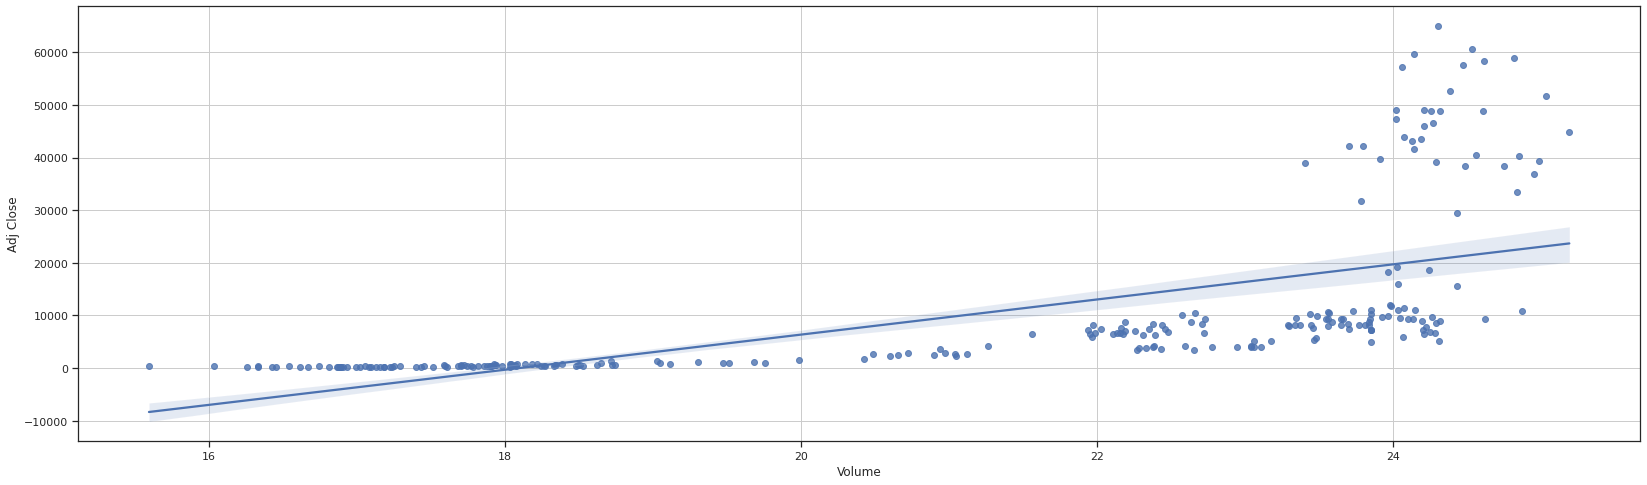

In [ ]:
sample_h5 = primary_dataset[(primary_dataset["Volume"] > 0)]
sample_h5 = sample_h5.sample(n = int(len(primary_dataset) * 9.5 / 100))
sample_h5 = sample_h5.sort_index(axis = 0)
sample_h5["Volume"] = np.log(sample_h5["Volume"])

coef, p = spearmanr(sample_h5["Volume"], sample_h5["Adj Close"])
print('Spearmans correlation coefficient: %.3f' % coef)
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
sns.regplot(x="Volume", y="Adj Close", data = sample_h5, ci = 95);

## Sixth Hypothesis Testing
</span>

 - **Null Hypothesis ($\large{H_0}$)**: Bitcoin's price is not correlated with bull-run years 2013, 2017, and 2021.
 - **Alternative Hypothesis ($\large{H_A}$)**: Bitcoin's price is correlated with bull-run years 2013, 2017, and 2021.

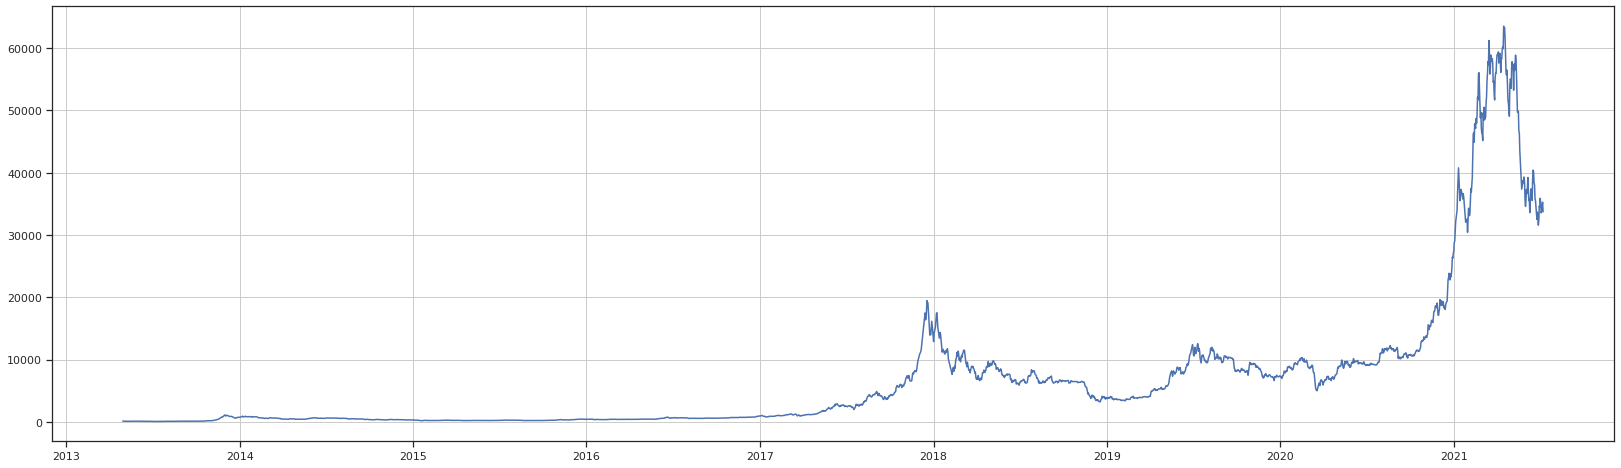

In [ ]:
fig, ax = plt.subplots(figsize=(28, 8))
secondary_dataset['Date'] = pd.to_datetime(secondary_dataset['Date'])

dat = secondary_dataset['Date']
val = secondary_dataset['Open']

ax.plot(dat, val);

Text(0.5, 1.0, '2021 Highs')

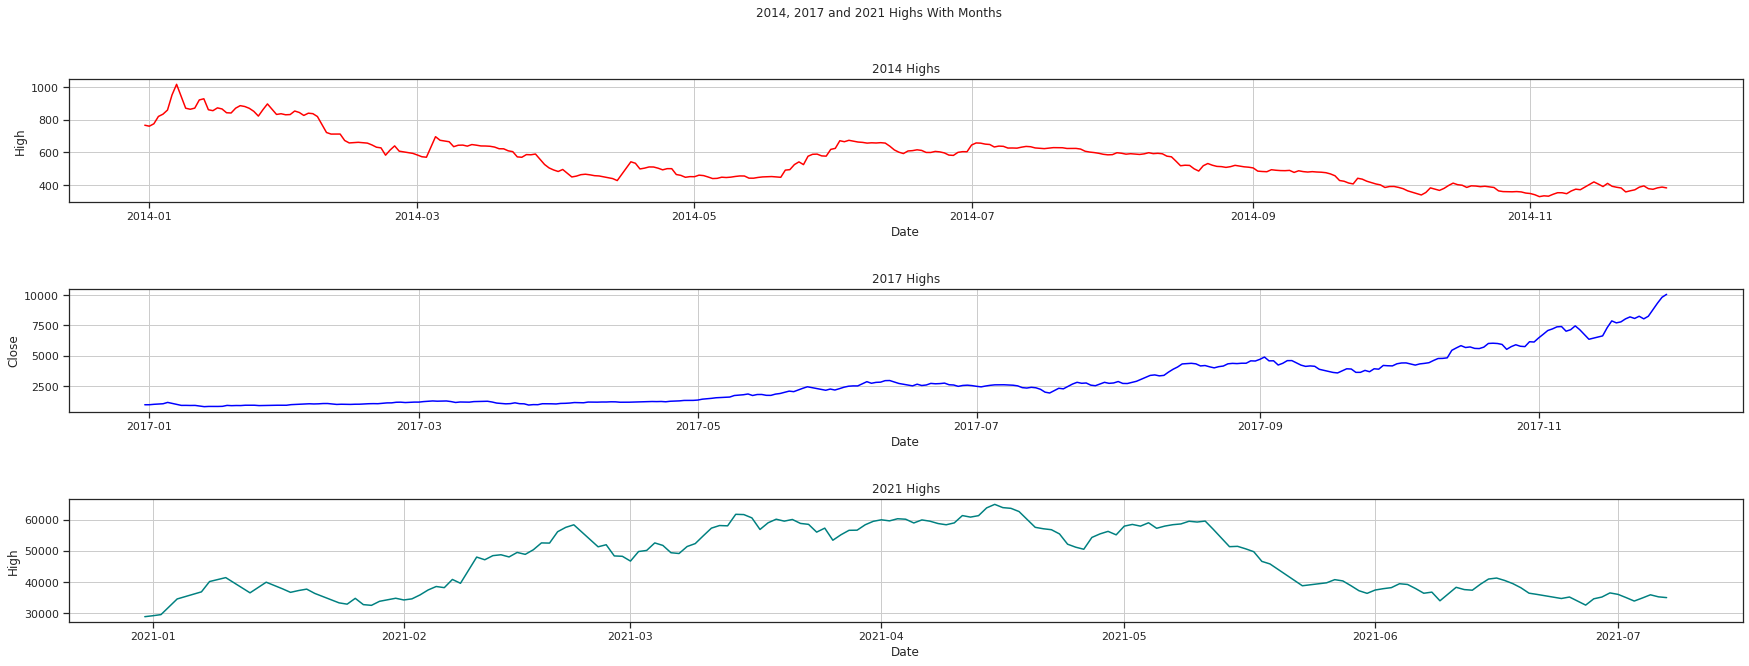

In [ ]:
fig, axes = plt.subplots(3, 1, figsize = (30,10))
fig.suptitle("2014, 2017 and 2021 Highs With Months")
secondary_time_2014 = secondary_dataset[ ( secondary_dataset["Date"] >= '2013-12-30') & (secondary_dataset["Date"] <= '2014-12-01') ]
secondary_time_2017 = secondary_dataset[ ( secondary_dataset["Date"] >= '2016-12-30') & (secondary_dataset["Date"] <= '2017-12-01') ]
secondary_time_2021 = secondary_dataset[ ( secondary_dataset["Date"] >= '2020-12-30') & (secondary_dataset["Date"] <= '2021-12-01') ]
plt.subplots_adjust(hspace=0.7)
ax1 = sns.lineplot(x = "Date", y = "High", data = secondary_time_2014, ax = axes[0], color = "red")
axes[0].set_title("2014 Highs")
ax2 = sns.lineplot(x = "Date", y = "Close", data = secondary_time_2017, ax = axes[1], color = "blue")
axes[1].set_title("2017 Highs");
ax3 = sns.lineplot(x = "Date", y = "High", data = secondary_time_2021, ax = axes[2], color = "teal")
axes[2].set_title("2021 Highs")

Daily high max value for 2014: 1017$
Daily high max value for 2017: 10125$
Daily high max value for 2021: 64863$

Average value of BTC daily high in 2014: 558$
Average value of BTC daily high in 2017: 2967$
Average value of BTC daily high in 2021: 47676$

Average value of BTC daily high until 2014: 156$
Average value of BTC daily high until 2017: 414$
Average value of BTC daily high until 2021: 3971$

48.772709802625585
435.79712971045893
513.5362976721772


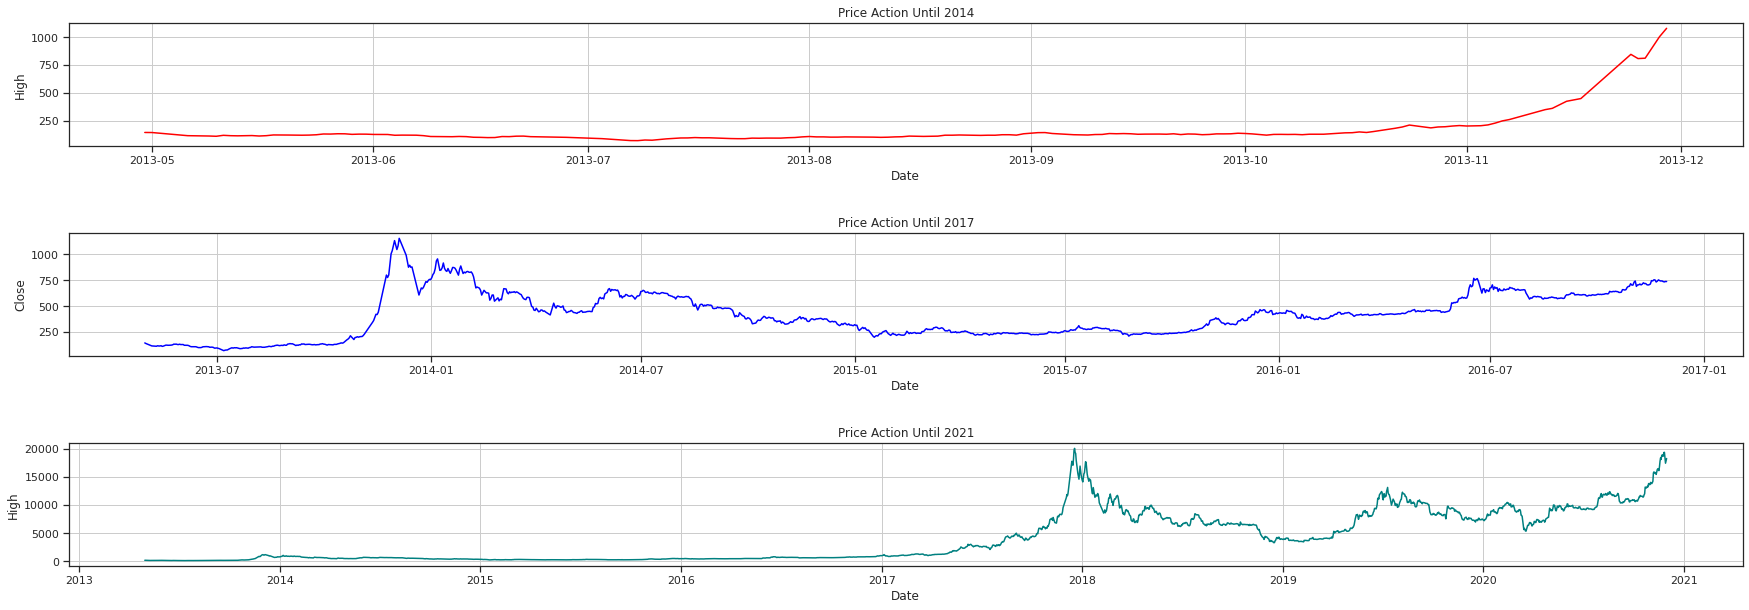

In [ ]:
import scipy.stats as stats

fig, axes = plt.subplots(3, 1, figsize = (30,10))

secondary_time_until2014 = secondary_dataset[ (secondary_dataset["Date"] <= '2013-11-30') ]
secondary_time_until2017 = secondary_dataset[ (secondary_dataset["Date"] <= '2016-11-30') ]
secondary_time_until2021 = secondary_dataset[ (secondary_dataset["Date"] <= '2020-11-30') ]

plt.subplots_adjust(hspace=0.7)
ax1 = sns.lineplot(x = "Date", y = "High", data = secondary_time_until2014, ax = axes[0], color = "red")
axes[0].set_title("Price Action Until 2014")
ax2 = sns.lineplot(x = "Date", y = "Close", data = secondary_time_until2017, ax = axes[1], color = "blue")
axes[1].set_title("Price Action Until 2017")
ax3 = sns.lineplot(x = "Date", y = "High", data = secondary_time_until2021, ax = axes[2], color = "teal")
axes[2].set_title("Price Action Until 2021")
average_until_2014 = sum(secondary_time_until2014["High"]) / len(secondary_time_until2014["High"])
average_until_2017 = sum(secondary_time_until2017["High"]) / len(secondary_time_until2017["High"])
average_until_2021 = sum(secondary_time_until2021["High"]) / len(secondary_time_until2021["High"])
std_sample_until_2014 = secondary_time_until2014["High"].std()
std_sample_until_2017 = secondary_time_until2017["High"].std()
std_sample_until_2021 = secondary_time_until2021["High"].std()
standard_error_2014 = std_sample_until_2014 / ((len(secondary_time_until2014)**.5))
standard_error_2017 = std_sample_until_2017 / ((len(secondary_time_until2017)**.5))
standard_error_2021 = std_sample_until_2021 / ((len(secondary_time_until2021)**.5))
average_2014 = sum(secondary_time_2014["High"]) / len(secondary_time_2014["High"])
average_2017 = sum(secondary_time_2017["High"]) / len(secondary_time_2017["High"])
average_2021 = sum(secondary_time_2021["High"]) / len(secondary_time_2021["High"])
max_value_2014 = secondary_time_2014["High"].max();
max_value_2017 = secondary_time_2017["High"].max();
max_value_2021 = secondary_time_2021["High"].max();
print("Daily high max value for 2014:", str(int(max_value_2014)) + "$");
print("Daily high max value for 2017:", str(int(max_value_2017)) + "$");
print("Daily high max value for 2021:", str(int(max_value_2021)) + "$\n");
print("Average value of BTC daily high in 2014:", str(int(average_2014)) + "$")
print("Average value of BTC daily high in 2017:", str(int(average_2017)) + "$")
print("Average value of BTC daily high in 2021:", str(int(average_2021)) + "$\n")
print("Average value of BTC daily high until 2014:", str(int(average_until_2014)) + "$")
print("Average value of BTC daily high until 2017:", str(int(average_until_2017)) + "$")
print("Average value of BTC daily high until 2021:", str(int(average_until_2021)) + "$\n")
std_2014 = secondary_time_2014["High"].std() 
se2014 = std_2014/ (len(secondary_time_2014["High"])**.5)
z_2014 = (average_2014 - average_until_2014) / se2014
print(z_2014)
z_2017 = (average_2017 - average_until_2017) / standard_error_2017
print(z_2017)
z_2021 = (average_2021 - average_until_2021) / standard_error_2021
print(z_2021)

## Seventh Hypothesis Testing
</span>

 - **Null Hypothesis ($\large{H_0}$)**: The halving of Bitcoin causes an exponential increase in the price.
 - **Alternative Hypothesis ($\large{H_A}$)**: The halving of Bitcoin doesn't cause an exponential increase in the price.

### Eighth Hypothesis Testing
</span>

 - **Null Hypothesis ($\large{H_0}$)**: The means of Volume is not different for the days with Bitcoin increase or decrease.
 - **Alternative Hypothesis ($\large{H_A}$)**:  The means of Volume is different for the days with Bitcoin increase or decrease.

In [ ]:
sample_h8_1 = secondary_dataset[secondary_dataset["Daily Verbal Change"] == "Daily Price Increase"]
sample_h8_2 = secondary_dataset[secondary_dataset["Daily Verbal Change"] == "Daily Price Decrease"]

sample_h8_1 = sample_h8_1.sample(n = int(len(sample_h8_1) * 9.5 / 100))
sample_h8_2 = sample_h8_2.sample(n = int(len(sample_h8_2) * 9.5 / 100))
result, p_val = ttest_ind(sample_h8_1["Volume"], sample_h8_2["Volume"], equal_var = False)
print("p-value:", p_val)

p-value: 0.6758090599502866


### Conclusion
Our p-value is bigger than 0.05 by a margin, which concludes that the means for both of these Verbal Change categories are most of the times same.

## Ninth Hypothesis Testing

</span>

 - **Null Hypothesis ($\large{H_0}$)**: The means of Bitcoin's price is not different for the months of the year.
 - **Alternative Hypothesis ($\large{H_A}$)**:  The means of Bitcoin's price is different for the months of the year.

In [ ]:
def converter_month(row): # assign the days to datetime objects
  if row["Date"].strftime('%B') == dt.datetime(2021, 1, 1).strftime('%B'):
      return "January"
  elif row["Date"].strftime('%B') == dt.datetime(2021, 2, 1).strftime('%B'):
      return "February"
  elif row["Date"].strftime('%B') == dt.datetime(2021, 3, 1).strftime('%B'):
      return "March"
  elif row["Date"].strftime('%B') == dt.datetime(2021, 4, 1).strftime('%B'):  
      return "April"
  elif row["Date"].strftime('%B') == dt.datetime(2021, 5, 1).strftime('%B'):
      return "May"
  elif row["Date"].strftime('%B') == dt.datetime(2021, 6, 1).strftime('%B'):
      return "June"
  elif row["Date"].strftime('%B') == dt.datetime(2021, 7, 1).strftime('%B'):
      return "July"
  elif row["Date"].strftime('%B') == dt.datetime(2021, 8, 1).strftime('%B'):
      return "August"
  elif row["Date"].strftime('%B') == dt.datetime(2021, 9, 1).strftime('%B'):
      return "September"
  elif row["Date"].strftime('%B') == dt.datetime(2021, 10, 1).strftime('%B'):
      return "October"
  elif row["Date"].strftime('%B') == dt.datetime(2021, 11, 1).strftime('%B'):
      return "November"
  elif row["Date"].strftime('%B') == dt.datetime(2021, 12, 1).strftime('%B'):
      return "December"

secondary_dataset["Months"] = secondary_dataset.apply(converter_month, axis = 1)
primary_dataset["Months"] = primary_dataset.apply(converter_month, axis = 1)

sample_h9 = secondary_dataset.sample(n = 300)
data = [['Between Groups', '', '', '', '', '', ''], ['Within Groups', '', '', '', '', '', ''], ['Total', '', '', '', '', '', '']] 
anova_table = pd.DataFrame(data, columns = ['Source of Variation', 'Degree of Freedom', 'Sum Square', 'Mean Square', 'F value', 'P-value', 'F critical']) 
anova_table.set_index('Source of Variation', inplace = True)
x_bar = sample_h9['Daily Average'].mean()
SSTR = sample_h9.groupby('Months').count() * (sample_h9.groupby('Months').mean() - x_bar)**2
anova_table['Sum Square']['Between Groups'] = SSTR['Daily Average'].sum()
SSE = (sample_h9.groupby('Months').count() - 1) * sample_h9.groupby('Months').std()**2
anova_table['Sum Square']['Within Groups'] = SSE['Daily Average'].sum()
SSTR = SSTR['Daily Average'].sum() + SSE['Daily Average'].sum()
anova_table['Sum Square']['Total'] = SSTR
anova_table['Degree of Freedom']['Between Groups'] = sample_h9['Months'].nunique() - 1
anova_table['Degree of Freedom']['Within Groups'] = sample_h9.shape[0] - sample_h9['Months'].nunique()
anova_table['Degree of Freedom']['Total'] = sample_h9.shape[0] - 1
anova_table['Mean Square'] = anova_table['Sum Square'] / anova_table['Degree of Freedom']
F = anova_table['Mean Square']['Between Groups'] / anova_table['Mean Square']['Within Groups']
anova_table["F value"]['Between Groups'] = F
anova_table['P-value']['Between Groups'] = 1 - stats.f.cdf(F, anova_table['Degree of Freedom']['Between Groups'], anova_table['Degree of Freedom']['Within Groups'])
anova_table['F critical']['Between Groups'] = stats.f.ppf(1-alpha, anova_table['Degree of Freedom']['Between Groups'], anova_table['Degree of Freedom']['Within Groups'])
anova_table

Degree of Freedom          Sum Square       Mean Square  \
Source of Variation                                                           
Between Groups                     11   1205704582.512778  109609507.501162   
Within Groups                     288  25182239791.995216   87438332.611095   
Total                             299  26387944374.507996   88253994.563572   

                      F value   P-value F critical  
Source of Variation                                 
Between Groups       1.253564  0.251319   1.821983  
Within Groups                                       
Total

# Machine Learning
For the machine learning part, it is aimed to leverage data to get better performance on some prediction tasks. In order to do that, five different machine learning methods are used for different predictions, in each prediction some steps were completed:

*To have more accurate predictions train test validation is conducted on the trends prediction.

*Accuracy and inaccuracy rates of all predictions are observed and some conclusions were made from them.

*In order to optimize models, hyperparameter methods were used.


## Method 1: Random Forest 

First extract the numerical data by removing unnecessary columns.

Using Random Forest method we will try to look 7 days into the future.

For simpilicity we will try to predict binary values instead of actula values. We tried to predict both but binary values gave us more reliable and accurate results so we continue with them.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
copy_set = primary_dataset.copy()
#rint(primary_dataset)

copy_set.drop('Biggest Change', inplace=True, axis=1)
copy_set.drop('Daily Verbal Change', inplace=True, axis=1)
copy_set.drop('Days', inplace=True, axis=1)
copy_set.drop('Months', inplace=True, axis=1)
covid_pre = copy_set.copy()

copy_set.set_index("Date", inplace =True)

pre = (copy_set['Close'].shift(periods = -7,fill_value = 0) - copy_set['Close'])
pre = (pre > 0)

#remove last 7 rows,  due to the shift
x = copy_set[:-7]
pre = pre[:-7]


x.shape,pre.shape


((2576, 6), (2576,))

We will do same prediction for the 2020 case, since there was a outbreak roughly in may 2020, we will examine the behavior of prediction of our model in 2020.

In [ ]:
covid_pre = covid_pre[covid_pre["Date"] < '2021-01-01']

covid_pre.set_index("Date", inplace =True)

pre2 = (covid_pre['Close'].shift(periods = -7,fill_value = 0) - covid_pre['Close'])
pre2 = (pre2 >0)


covid_x = covid_pre[:-7]
pre2 = pre2[:-7]
print(covid_x.shape, pre2.shape)

(2154, 6) (2154,)


###Train-Test-Validation 

For the accuracy of our model, we will train %80 of out data and test the data for remaining days (%20).

In [ ]:
#Whole Data
test_nm =int(2576 *20/100) #extract the training part 
training_x = x[:-test_nm]
training_y = pre[:-test_nm]
test_x = x[-test_nm:]
test_y = pre[-test_nm:]


Do the same thing for the 2020 case

In [ ]:
# Test For 2020 
test_nm_c = int(2154 *20/100)
training_x_c =  covid_x[:-test_nm_c]
training_y_c =  pre2[:-test_nm_c]  
test_x_c =  covid_x[-test_nm_c:]
test_y_c =  pre2[-test_nm_c:] 


Using 4 depth decision trees and RandomForest Classifier we fit our training data.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(max_depth=4, random_state=17) # 4 depth decision tree
RFC.fit(training_x, training_y)


RandomForestClassifier(max_depth=4, random_state=17)

In [ ]:
RFC2 = RandomForestClassifier(max_depth=4, random_state=17) # 4 depth decision tree
RFC2.fit(training_x_c, training_y_c)

RandomForestClassifier(max_depth=4, random_state=17)

###Test the Model
 The success of the prediction is %42 with test dataset. In other words, prediction is accurate in the %42 of the cases.

In [ ]:
res = RFC.predict(test_x)
acc1 = (res == test_y.values).mean()
print(acc1)


0.42135922330097086


Testing the model with raining dataset leads to %65, which is not surprising because such these models mostly have a tendency to overfit. 

In [ ]:
res2 = RFC.predict(training_x)
acc2 = (res2== training_y.values).mean()
print(acc2)

0.6516254245511888


2020
%44 accuracy in prediction cases.

In [ ]:
res1_c = RFC2.predict(test_x_c)
acc1_c = (res1_c== test_y_c.values).mean()
print(acc1_c)

0.4441860465116279


2020 %63 accuracy with trained data.




In [ ]:
res2_c = RFC2.predict(training_x_c)
acc2_c = (res2_c== training_y_c.values).mean()
print(acc2_c)

0.6392111368909513


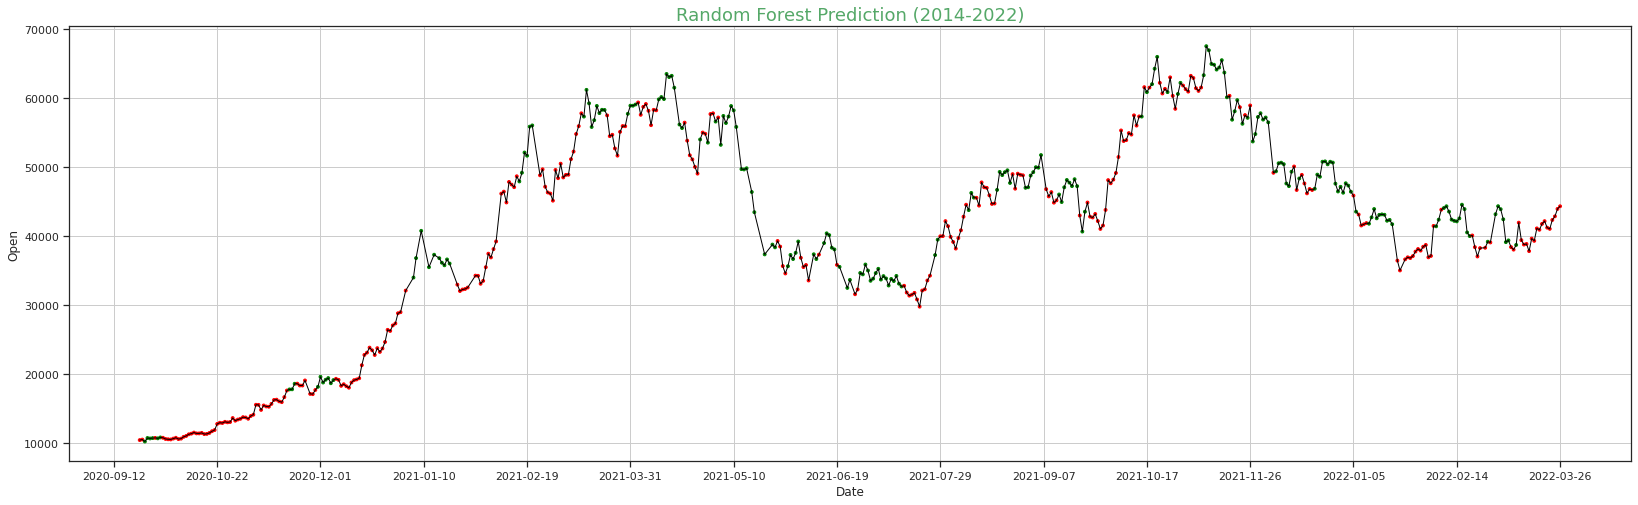

In [ ]:
colors = ['green' if x else 'red' for x in res== test_y]

ax = plt.gca()
ax.plot(test_x['Open'],lw = 1, c = 'black')
ax.title.set_text('Random Forest Prediction (2014-2022)')
ax.title.set_color('g')
ax.title.set_fontsize(18)

test_x.reset_index().plot.scatter( x = 'Date', y = 'Open',color = colors,s = 8,ax= ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(20))

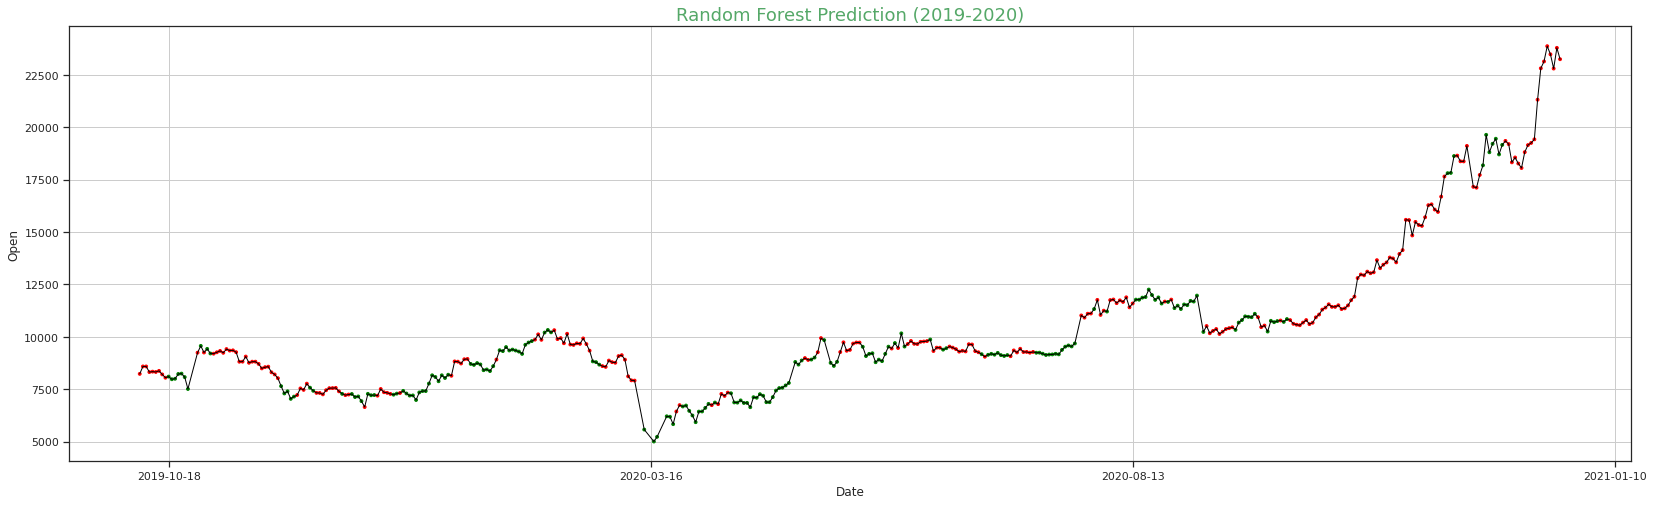

In [ ]:
colors = ['green' if x else 'red' for x in res1_c== test_y_c]

ax = plt.gca()
ax.plot(test_x_c['Open'],lw = 1, c = 'black')
ax.title.set_text('Random Forest Prediction (2019-2020)')
ax.title.set_color('g')
ax.title.set_fontsize(18)
test_x_c.reset_index().plot.scatter( x = 'Date', y = 'Open',color = colors,s = 8,ax= ax)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

###Interpretation of Random Forest Prediction Method

As a result, the Random Forest models successfully predicted the decline of the prices in march-april 2020, which correspond to the starting of the covid-19 pandemic. One should also note that the model could not achive to predict the increase in prices of Bitcoin during the end of the 2020 ( September-December).

+ Decrease in 2020 march.

- İncrease in end of the 2020

When we consider the accuracy of the trained, test data, and predictions, the results have shown us that the model is good at predicting some trends and has high accuracy rate. Therefore we can choose it to estimate future trends of Bitcoin.

##Method 2 (ARİMA & SARİMA)

ARİMA Model (autoregressive integrated moving average model) is a form of regression analysis that gauges the strength of one dependent variable relative to other changing variables. The model's goal is to predict future securities or financial market moves by examining the differences between values in the series instead of through actual values.

The reason why we choose this model is that Bitcoin prices are highly dependent on seasonal changes, any trend in the World, even a tweet of a people, so if we want to predict the Bitcoin Prices we should also take into considetation these seasonal changes and trends.

In [ ]:
plt.rcParams["figure.figsize"] = (15,7)

import seaborn as sns
from datetime import datetime, timedelta

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

from scipy import stats
import statsmodels.api as sm
from itertools import product

###Prepare The Data

Extract the numericel parts of the data.

Resample to the monthly frequency

In [ ]:
arima = primary_dataset.copy()

arima.drop(['Adj Close','Biggest Change' , 'Volume','Daily Verbal Change','Days','Months'], axis = 1, inplace = True)
arima.set_index("Date", inplace =True)

btc_month = arima.resample('M').mean() 
print(btc_month)

                    Open          High           Low         Close
Date                                                              
2014-09-30    412.654003    421.104422    398.174641    407.182428
2014-10-31    368.582172    376.441623    358.920690    366.828484
2014-11-30    362.508895    371.714860    355.290963    362.096356
2014-12-31    343.074836    347.487129    336.565775    341.267871
2015-01-31    254.386918    261.339044    247.097335    254.151750
...                  ...           ...           ...           ...
2021-12-31  49535.162891  50616.397396  48282.709505  49265.292709
2022-01-31  41566.721983  42243.486530  40568.396687  41428.808594
2022-02-28  40829.474760  41710.565204  39918.269832  40763.516527
2022-03-31  41889.148438  42770.031502  41120.731729  41966.237525
2022-04-30  45861.132813  46809.835938  45280.560547  46394.873047

[92 rows x 4 columns]


In [ ]:
btc_month['close_box'], lmbda = stats.boxcox(btc_month.Close)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.close_box)[1])

Dickey–Fuller test: p=0.861563


In [ ]:
# Seasonal differentiation (12 months)
btc_month['box_diff_seasonal_12'] = btc_month.close_box - btc_month.close_box.shift(12)
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff_seasonal_12[12:])[1])

Dickey–Fuller test: p=0.079766


In this part, we tried to look for stabilities in the trends, seasonal changes, since the stationary means lack of broad trends in data. The results show that  the p-value indicates that series is stationary as the computed p-value is lower than the significance level alpha = 0.05.

Dickey–Fuller test: p=0.000269


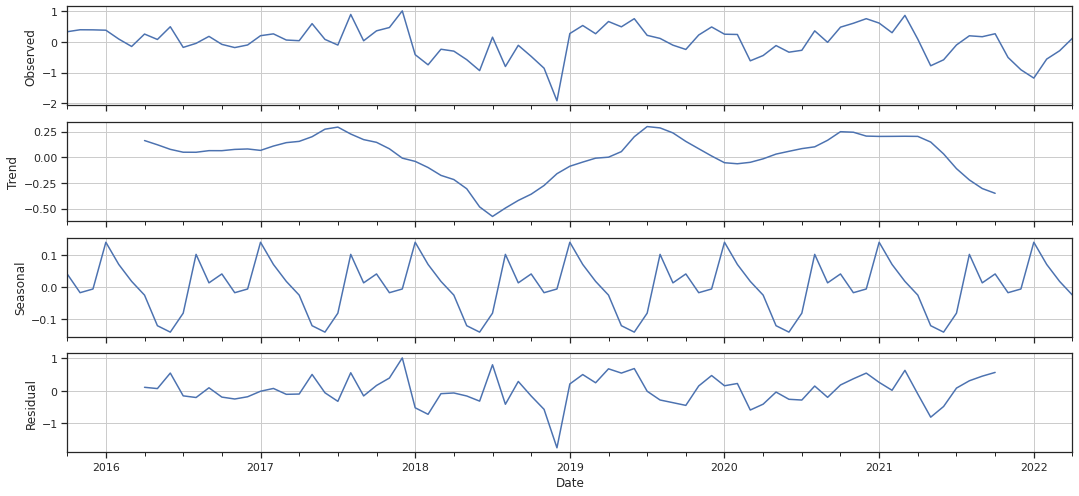

In [ ]:
btc_month['box_diff2'] = btc_month.box_diff_seasonal_12 - btc_month.box_diff_seasonal_12.shift(1)

# STL-decomposition
seasonal_decompose(btc_month.box_diff2[13:]).plot()   
print("Dickey–Fuller test: p=%f" % adfuller(btc_month.box_diff2[13:])[1])

plt.show()


Autocorrelation

Autocorrelation is the correlation of a time series with the same time series lagged. It summarizes the strength of a relationship with an observation in a time series with observations at prior time steps.

In this part, We created that autocorrelation factor (ACF) and partial autocorrelation factor (PACF) have aim of to plot to be able to detect the patterns in the data, stationary on both variance and mean. Our primary aim  is to identify AR and MA components in the residuals part.

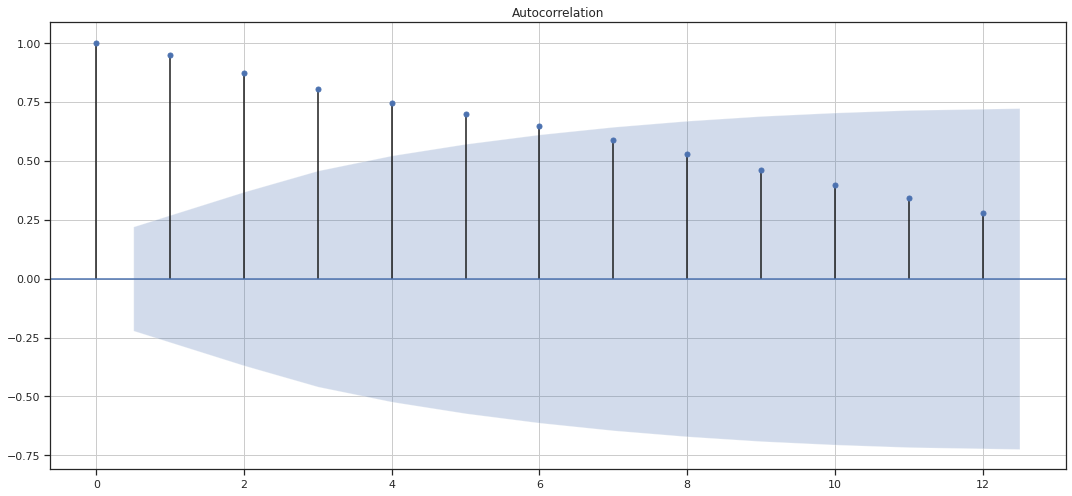

In [ ]:
plot_acf(btc_month.Close[13:].values.squeeze(), lags=12)

plt.tight_layout()
plt.show()

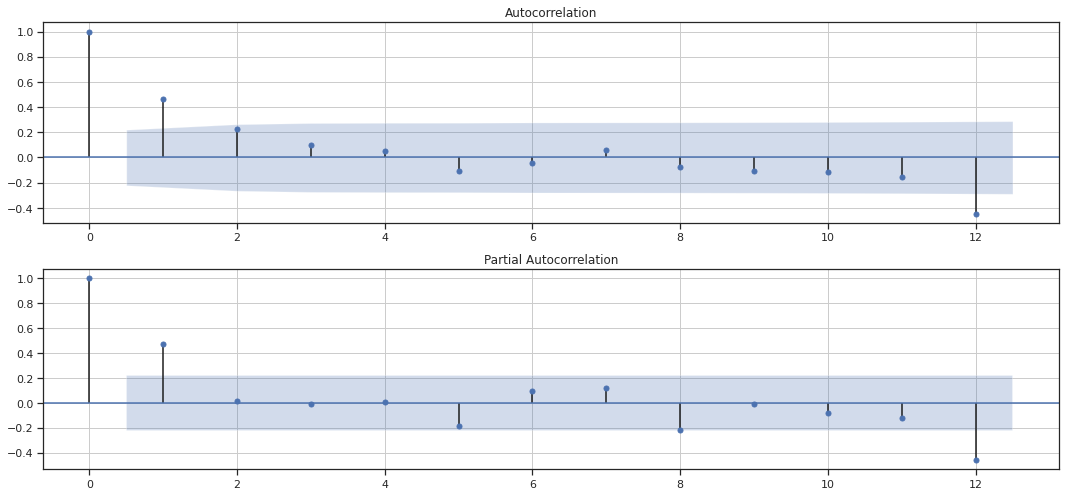

In [ ]:

ax = plt.subplot(211)
plot_acf(btc_month.box_diff2[13:].values.squeeze(), lags=12, ax=ax)
ax = plt.subplot(212)
plot_pacf(btc_month.box_diff2[13:].values.squeeze(), lags=12, ax=ax)
plt.tight_layout()
plt.show()

ARIMA models are considered as ARIMA(p, d, q). These parameters correspond to seasonality, trend, and noises in datasets:

p - the number of lag observations to include in the model, or lag order. (AR)

d - the number of times that the raw observations are differenced, or the degree of differencing. (I)

q - the size of the moving average window, also called the order of moving average.(MA)

With some specified numbers and terms a linear regression model is built.
Data is passed through some processes such as differencing in order to make it stationary, and removing trend and seasonal structures which may have an effect on the regression model. If the value 0 is used for a parameter it means that to not use that element of the model.

Parameter Selection:


For each different parameter combination thanks to SARIMAX() a new ARIMA model is provided. For the using stats model, the Akaike Information Criterion value which is returned from ARIMA will be used. This Akaike Information Criterion value shows that if a data set is fit to the model, taking into consideration the complexity of the model. We want to see the lowest Akaike Information Criterion value since big AIC means fitting the data very well by using lots of features.

In [ ]:
# initial approximation for the initilization
qs = range(0, 3)
ps = range(0, 3)
d=1

parameters = product(ps, qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")

for param in parameters_list:
    try:
        model = SARIMAX(btc_month.close_box, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter (if there is any) :', param) # print if there is any bad parameter.
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
# Find Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

  parameters        aic
3     (1, 0)  46.352378
7     (2, 1)  47.555130
1     (0, 1)  47.816635
4     (1, 1)  48.338250
6     (2, 0)  48.342714


In [ ]:
print(best_model.summary())

                           Statespace Model Results                           
Dep. Variable:              close_box   No. Observations:                   92
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 -21.176
Date:                Tue, 14 Jun 2022   AIC                             46.352
Time:                        18:50:11   BIC                             51.374
Sample:                    09-30-2014   HQIC                            48.378
                         - 04-30-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4092      0.071      5.773      0.000       0.270       0.548
sigma2         0.0931      0.013      7.359      0.000       0.068       0.118
Ljung-Box (Q):                       47.08   Jarque-

In [ ]:
print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])

Dickey–Fuller test:: p=0.000000


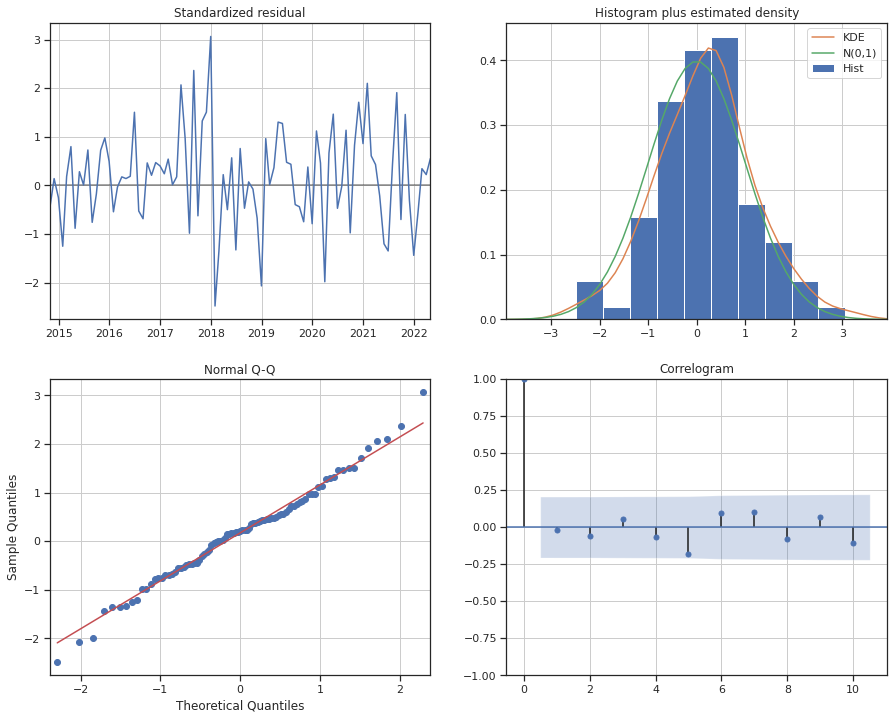

In [ ]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [ ]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

In [ ]:
print(arima.head());

                  Open        High         Low       Close
Date                                                      
2014-09-17  465.864014  468.174011  452.421997  457.334015
2014-09-18  456.859985  456.859985  413.104004  424.440002
2014-09-19  424.102997  427.834991  384.532013  394.795990
2014-09-20  394.673004  423.295990  389.882996  408.903992
2014-09-21  408.084991  412.425995  393.181000  398.821014


In [ ]:
print(arima.tail());

                    Open          High           Low         Close
Date                                                              
2022-03-29  47100.437500  48022.289063  47100.437500  47465.730469
2022-03-30  47456.898438  47655.148438  46746.210938  47062.664063
2022-03-31  47062.148438  47512.027344  45390.539063  45538.675781
2022-04-01  45554.164063  46616.242188  44403.140625  46281.644531
2022-04-02  46168.101563  47003.429688  46157.980469  46508.101563


Prediction

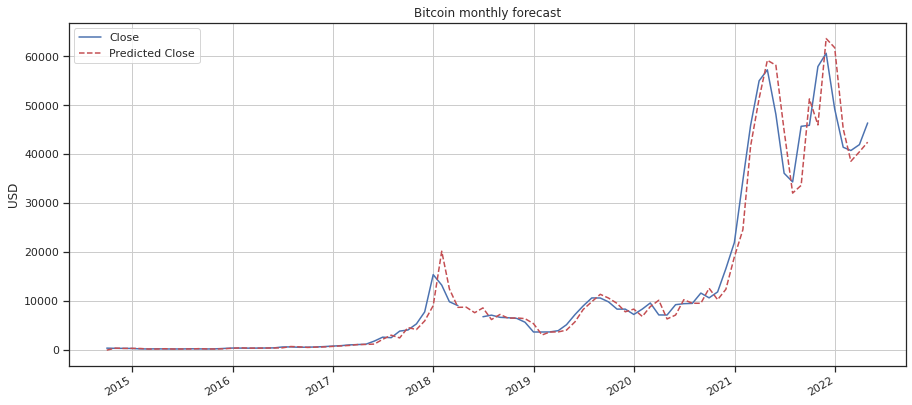

In [ ]:

btc_month_pred = btc_month[['Close']]
date_list = [datetime(2018, 3, 31), datetime(2018, 4, 30), datetime(2018, 5, 31), datetime(2018, 6, 30)]
future = pd.DataFrame(index=date_list, columns= btc_month.columns)
btc_month_pred = pd.concat([btc_month_pred, future])

btc_month_pred['forecast'] = invboxcox(best_model.predict(start=0, end=100), lmbda)



plt.figure(figsize=(15,7))
btc_month_pred.Close.plot()
btc_month_pred.forecast.plot(color='r', ls='--', label='Predicted Close')
plt.legend()
plt.title('Bitcoin monthly forecast')
plt.ylabel('USD')
plt.show();

In [ ]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")

for param in parameters_list:
    try:
#        model = SARIMAX(btc_month.close_box, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
        model = SARIMAX(btc_month.close_box, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], 4)).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals

/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [ ]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary());

      parameters        aic
19  (1, 0, 0, 1)  59.928506
7   (0, 1, 0, 1)  60.376174
25  (1, 1, 0, 1)  61.780320
37  (2, 0, 0, 1)  61.822642
21  (1, 0, 1, 1)  61.883864
                                 Statespace Model Results                                
Dep. Variable:                         close_box   No. Observations:                   92
Model:             SARIMAX(1, 1, 0)x(0, 1, 1, 4)   Log Likelihood                 -26.964
Date:                           Tue, 14 Jun 2022   AIC                             59.929
Time:                                   18:50:34   BIC                             67.326
Sample:                               09-30-2014   HQIC                            62.907
                                    - 04-30-2022                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------

Analysis of Results 
The coef column shows the weight (i.e. importance) of each feature and how each one impacts the time series. The P>|z| column informs us of the significance of each feature weight. Here, each weight has a p-value lower or close to 0.05, so it is reasonable to retain all of them in our model.

When fitting seasonal ARIMA models (and any other models for that matter), it is important to run model diagnostics to ensure that none of the assumptions made by the model have been violated. The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.

In [ ]:
print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1]);

Dickey–Fuller test:: p=0.000000


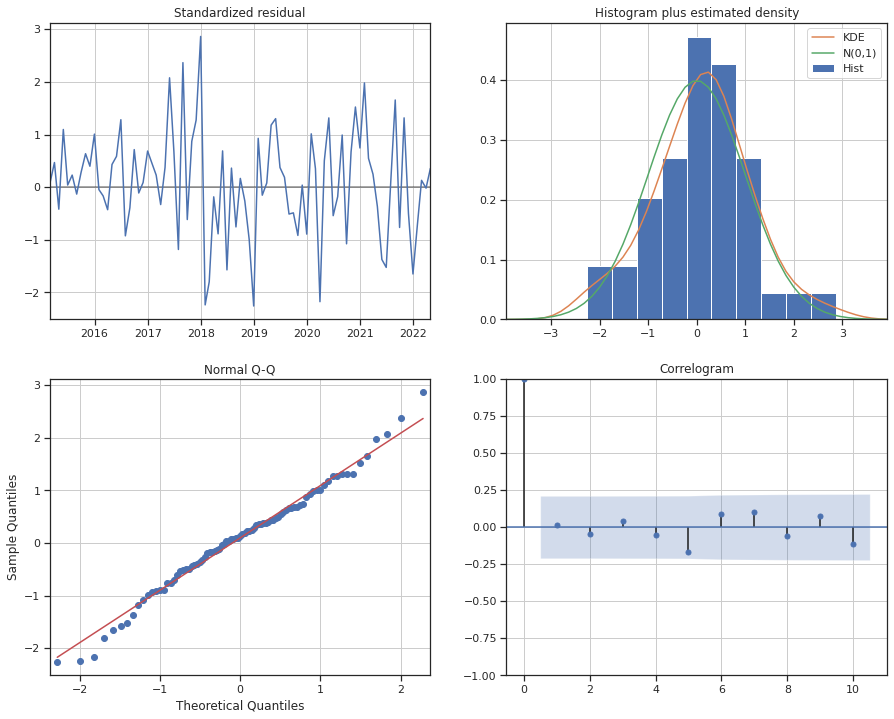

In [ ]:
best_model.plot_diagnostics(figsize=(15, 12))
plt.show()

Dickey–Fuller test:: p=0.000000


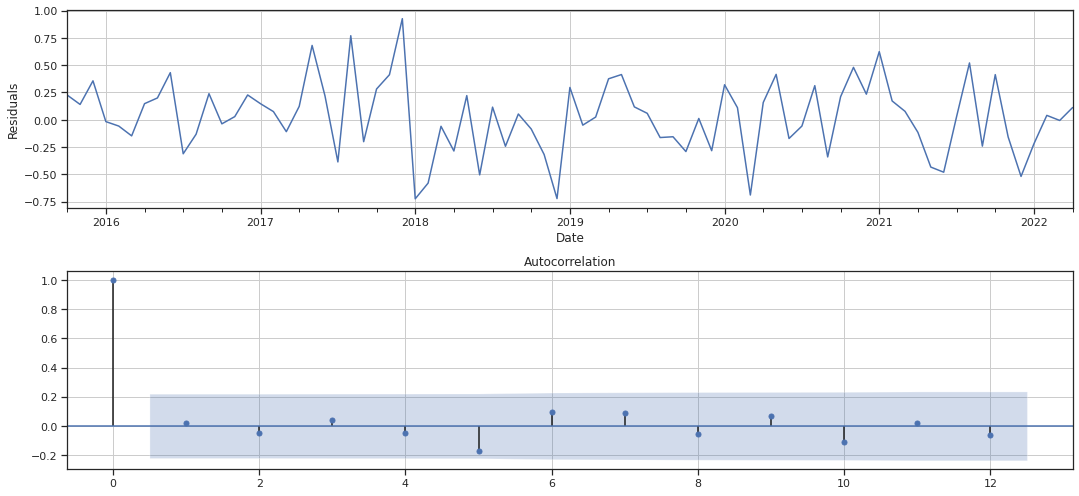

In [ ]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
plot_acf(best_model.resid[13:].values.squeeze(), lags=12, ax=ax)

print("Dickey–Fuller test:: p=%f" % adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show();

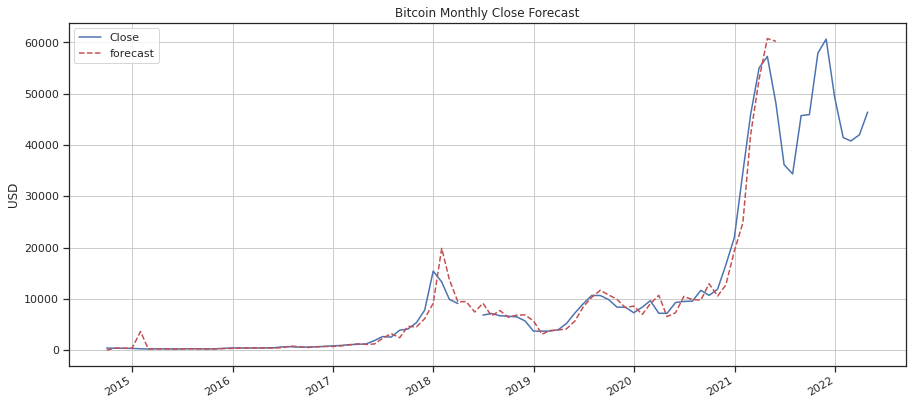

In [ ]:
# Prediction
btc_month2 = btc_month[['Close']]
date_list = [datetime(2018, 3, 31), datetime(2018, 4, 30), datetime(2018, 5, 31), datetime(2018, 6, 30)]
future = pd.DataFrame(index=date_list, columns= btc_month.columns)
btc_month2 = pd.concat([btc_month2, future])

btc_month2['forecast'] = invboxcox(best_model.predict(start=0, end=80), lmbda)

plt.figure(figsize=(15,7))
btc_month2.Close.plot()
btc_month2.forecast.plot(color='r', ls='--', label='forecast')
plt.legend()
plt.title('Bitcoin Monthly Close Forecast')
plt.ylabel('USD')
plt.savefig('bitcoin_monthly_forecast.png')
plt.show()

### Validation
To be able to understand how accurate the model in the prediction is simply we calculate the root mean square errors (RMSE). Then lets we calculated first RMSE for the one-step ahead predictions starting from 2014, through to the end of 2015.

In [ ]:
y_forecasted = btc_month2.forecast
y_truth = btc_month2[:'2016-01-01'].Close

# Compute the root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('Mean Squared Error: {}'.format(round(rmse, 2)));

Mean Squared Error: 852.85


Then starting from 2016, through to the end of 2016.

In [ ]:
y_forecasted = btc_month2.forecast
y_truth = btc_month2['2016-01-01':'2017-01-01'].Close

# Compute the root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('Mean Squared Error: {}'.format(round(rmse, 2)));

Mean Squared Error: 83.28


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



Starting from 2017, through to the end of 2017.

In [ ]:
y_forecasted = btc_month2.forecast
y_truth = btc_month2['2017-01-01':'2018-01-01'].Close

# Compute the root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('Mean Squared Error: {}'.format(round(rmse, 2)));

Mean Squared Error: 1967.34


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



Starting from 2018, through to the end of 2018.

In [ ]:
y_forecasted = btc_month2.forecast
y_truth = btc_month2['2018-01-01':'2019-01-01'].Close

# Compute the root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('Mean Squared Error: {}'.format(round(rmse, 2)));

Mean Squared Error: 2257.95


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



Starting from 2019, through to the end of 2019.

In [ ]:
y_forecasted = btc_month2.forecast
y_truth = btc_month2['2019-01-01':'2020-01-01'].Close

# Compute the root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('Mean Squared Error: {}'.format(round(rmse, 2)));

Mean Squared Error: 926.99


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



 starting from 2020, through to the 2022 may.

In [ ]:
y_forecasted = btc_month2.forecast
y_truth = btc_month2['2020-01-01':].Close

# Compute the root mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('Mean Squared Error: {}'.format(round(rmse, 2)));

Mean Squared Error: 4388.49


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



Analysis of Mean Squarred Erros:

  There are some years that our model predict in very accurate way and there are some years that the model is not that good.
  However, as a group we have decided that the model is very good at seeing the trends and predicting the increases and decreases in the prices of Bitcoin.



On the other hand, when we need logn-term prediction, using dynamic forecasts is the better option. In this method we have information up to spesific point and after that the model predicts, forecasts using previous information.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



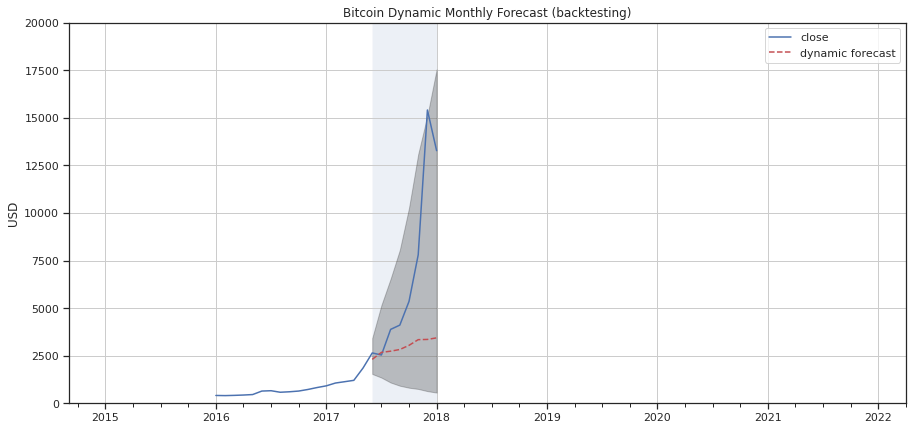

In [ ]:
# Get the dynamic forecast between dates t1 and t2
t1 = pd.to_datetime('2017-06-30')
t2 = pd.to_datetime('2018-01-31')
btc_month_dynamic = best_model.get_prediction(start=t1, end=t2, dynamic=True, full_results=True)
btc_month2['dynamic_forecast'] = invboxcox(btc_month_dynamic.predicted_mean, lmbda)

# Taking 95% confidence interval 
pred_dynamic_ci = btc_month_dynamic.conf_int(alpha=0.05)
pred_dynamic_ci['lower close_box'] = invboxcox(pred_dynamic_ci['lower close_box'], lmbda)
pred_dynamic_ci['upper close_box'] = invboxcox(pred_dynamic_ci['upper close_box'], lmbda)

# Plot
plt.figure(figsize=(15,7))
plt.ylim((0,20000))

btc_month2.Close['2016':'2018-01'].plot(label='close')
btc_month2.dynamic_forecast.plot(color='r', ls='--', label='dynamic forecast')

plt.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
plt.fill_betweenx(plt.ylim(), t1, t2, alpha=.1, zorder=-1)

plt.legend()
plt.title('Bitcoin Dynamic Monthly Forecast (backtesting)')
plt.ylabel('USD')
plt.show();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



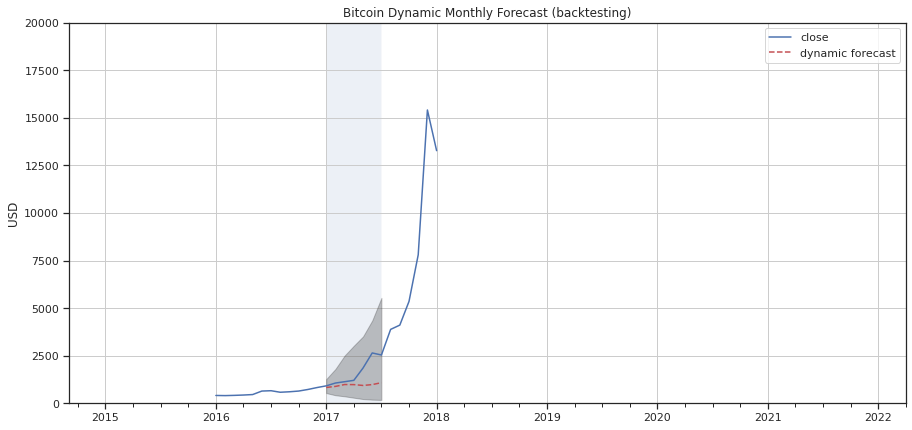

In [ ]:
# Get the dynamic forecast between dates t1 and t2
t1 = pd.to_datetime('2017-01-31')
t2 = pd.to_datetime('2017-07-31')
btc_month_dynamic = best_model.get_prediction(start=t1, end=t2, dynamic=True, full_results=True)
btc_month2['dynamic_forecast'] = invboxcox(btc_month_dynamic.predicted_mean, lmbda)

# Taking 95% confidence interval
pred_dynamic_ci = btc_month_dynamic.conf_int(alpha=0.05)
pred_dynamic_ci['lower close_box'] = invboxcox(pred_dynamic_ci['lower close_box'], lmbda)
pred_dynamic_ci['upper close_box'] = invboxcox(pred_dynamic_ci['upper close_box'], lmbda)

# Plot
plt.figure(figsize=(15,7))
plt.ylim((0,20000))

btc_month2.Close['2016':'2018-01'].plot(label='close')
btc_month2.dynamic_forecast.plot(color='r', ls='--', label='dynamic forecast')

plt.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
plt.fill_betweenx(plt.ylim(), t1, t2, alpha=.1, zorder=-1)

plt.legend()
plt.title('Bitcoin Dynamic Monthly Forecast (backtesting)')
plt.ylabel('USD')
plt.show();

###Analysis of the results
Although the %95 confidence interval includes prediction value, even %75-80 confidence intervals are so large to determine a single prediction value. Therefore Arima method is not the best option for us to predict exact values of Bitcoin. Instead of these, the Arima method is best for the predicting trends, general behavior of the bitcoin data, as far as we observed and calculated.

##Method 3: AutoTS

In this part we tried a auto predictor for the bitcoin prices. We have given our primary data and needed informations to the model, so at the end we predict upcoming 90 days of Bitcoin.


Here we created the candlestick for the Bitcoin data.

In [ ]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=primary_dataset["Date"],open=primary_dataset["Open"], high=primary_dataset["High"], low=primary_dataset["Low"],close=primary_dataset["Close"])])
figure.update_layout(title = "Bitcoin Price Analysis",  xaxis_rangeslider_visible=False)
figure.show()

This is the correlation of our parameters as we have already shown.

In [ ]:
corr= primary_dataset.corr()
print(corr["Close"].sort_values(ascending = False))

Close             1.000000
Adj Close         1.000000
High              0.999686
Low               0.999640
Open              0.999208
Volume            0.728053
Biggest Change    0.248723
Name: Close, dtype: float64


Prediction of Prices, we predicted the upcoming 90 days of Bitcoin closing prices so the trend.

In [ ]:
from autots import AutoTS
model = AutoTS(forecast_length=90, frequency='infer', ensemble='simple')
model = model.fit(primary_dataset, date_col='Date', value_col='Close', id_col=None)
prediction = model.predict()
forecast = prediction.forecast
print(forecast)

Inferred frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 6 with model DatepartRegression in generation 0 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 7 with model DatepartRegression in generation 0 of 10
Epoch 1/50
84/84 [==============================] - 20s 11ms/step - loss: 0.4233
Epoch 2/50
84/84 [==============================] - 1s 12ms/step - loss: 0.4224
Epoch 3/50
84/84 [==============================] - 1s 11ms/step - loss: 0.4228
Epoch 4/50
84/84 [==============================] - 1s 11ms/step - loss: 0.4219
Epoch 5/50
84/84 [==============================] - 1s 10ms/step - loss: 0.4219
Epoch 6/50
84/84 [==============================] - 1s 11ms/step - loss: 0.4216
Epoch 7/50
84/84 [==============================] - 1s 11ms/step - loss: 0.4220
Epoch 8/50
84/84 [==============================] - 1s 10ms/step - loss: 0.4214
Epoch 9/50
84/84 [==============================] - 1s 10ms/step - loss: 0.4218
Epoch 10/50
84/84 [==============================] - 1s 9ms/step - loss: 0.4215
Epoch 11/50
84/84 [==============================] - 1s 10ms/step - loss: 0.4216
Epoch 12/50
84/84 [==============================]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 30 with model FBProphet in generation 0 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 31 with model MultivariateRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    5.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 32 with model MultivariateRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 32: MultivariateRegression
Model Number: 33 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 33: DatepartRegression
Model Number: 34 with model SeasonalNaive in generation 0 of 10
Model Number: 35 with model DatepartRegression in generation 0 of 10
Model Number: 36 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (90, 1), got (90,).') in model 36: UnobservedComponents
Model Number: 37 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (90, 1), got (90,).') in model 37: UnobservedComponents
Model Number: 38 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 48 with model FBProphet in generation 0 of 10
Model Number: 49 with model SeasonalNaive in generation 0 of 10
Model Number: 50 with model DatepartRegression in generation 0 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    1.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 51 with model NVAR in generation 0 of 10
Model Number: 52 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 52: Theta
Model Number: 53 with model ConstantNaive in generation 0 of 10
Model Number: 54 with model LastValueNaive in generation 0 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 54: LastValueNaive
Model Number: 55 with model AverageValueNaive in generation 0 of 10
Model Number: 56 with model GLS in generation 0 of 10
Model Number: 57 with model SeasonalNaive in generation 0 of 10
Model Number: 58 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 58: GLM
Model Number: 59 with model ETS in generation 0 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 60 with model FBProphet in generation 0 of 10
Model Number: 61 with model UnobservedComponents in generation 0 of 10
Model Number: 62 with model VAR in generation 0 of 10
Template Eval Error: IndexError('tuple index out of range') in model 62: VAR
Model Number: 63 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 63: VECM
Model Number: 64 with model WindowRegression in generation 0 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 64: WindowRegression
Model Number: 65 with model DatepartRegression in generation 0 of 10
Model Number: 66 with model MultivariateRegression in generation 0 of 10
Model Number: 67 with model UnivariateMotif in generation 0 of 10
Model Number: 68 with model MultivariateMotif in generation 0 of 10
Model Number: 69 with model SectionalMotif in generation 0 of 10
Model Number: 70 with model NVAR in generation 0 of 10
Model Number: 71 with model Theta in

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:48: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:412: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 97 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 97: DatepartRegression
Model Number: 98 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 98: Theta
Model Number: 99 with model ConstantNaive in generation 0 of 10
Model Number: 100 with model NVAR in generation 0 of 10
Model Number: 101 with model ConstantNaive in generation 0 of 10
Model Number: 102 with model FBProphet in generation 0 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Template Eval Error: ValueError("Model returned NaN due to a preprocessing transformer {'fillna': 'rolling_mean', 'transformations': {'0': 'EWMAFilter', '1': 'ClipOutliers', '2': 'bkfilter', '3': 'bkfilter', '4': 'StandardScaler', '5': 'PowerTransformer'}, 'transformation_params': {'0': {'span': 3}, '1': {'method': 'clip', 'std_threshold': 2, 'fillna': None}, '2': {}, '3': {}, '4': {}, '5': {}}}. fail_on_forecast_nan=True") in model 102: FBProphet
Model Number: 103 with model ConstantNaive in generation 0 of 10
Model Number: 104 with model DatepartRegression in generation 0 of 10
Epoch 1/50
38/38 [==============================] - 8s 16ms/step - loss: 105.5049
Epoch 2/50
38/38 [==============================] - 1s 15ms/step - loss: 105.6783
Epoch 3/50
38/38 [==============================] - 1s 16ms/step - loss: 103.1761
Epoch 4/50
38/38 [==============================] - 1s 21ms/step - loss: 101.9247
Epoch 5/50
38/38 [==============================] - 1s 28ms/step - loss: 106.2168
Epo

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 104: DatepartRegression
Model Number: 105 with model FBProphet in generation 0 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 106 with model FBProphet in generation 0 of 10


Model Number: 107 with model MultivariateRegression in generation 0 of 10
Model Number: 108 with model Theta in generation 0 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 108: Theta
Model Number: 109 with model MultivariateRegression in generation 0 of 10
Model Number: 110 with model LastValueNaive in generation 0 of 10
Model Number: 111 with model GLS in generation 0 of 10
Model Number: 112 with model ConstantNaive in generation 0 of 10
Model Number: 113 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 113: DatepartRegression
Model Number: 114 with model GLS in generation 0 of 10
Model Number: 115 with model UnobservedComponents in generation 0 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (90, 1), got (90,).') in model 115: UnobservedComponents
Model Number: 116 wit

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 117 with model DatepartRegression in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 117: DatepartRegression
Model Number: 118 with model UnobservedComponents in generation 0 of 10
Model Number: 119 with model MultivariateRegression in generation 0 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 119: MultivariateRegression
Model Number: 120 with model UnivariateMotif in generation 0 of 10
Model Number: 121 with model SeasonalNaive in generation 0 of 10
Model Number: 122 with model GLS in generation 0 of 10
Model Number: 123 with model SectionalMotif in generation 0 of 10
Model Number: 124 with model MultivariateMotif in generation 0 of 10
Model Number: 125 with model UnivariateMotif in generation 0 of 10
Model Number: 126 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 126: VAR
Model Number: 127 with model

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:   20.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

Model Number: 147 with model ARDL in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 147: ARDL
Model Number: 148 with model LastValueNaive in generation 0 of 10
Model Number: 149 with model ConstantNaive in generation 0 of 10
Model Number: 150 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 150: VECM
Model Number: 151 with model NVAR in generation 0 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 151: NVAR
Model Number: 152 with model NVAR in generation 0 of 10
New Generation: 1 of 10
Model Number: 153 with model LastValueNaive in generation 1 of 10
Model Number: 154 with model LastValueNaive in generation 1 of 10

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:511: RuntimeWarning:

overflow encountered in multiply

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:513: RuntimeWarning:

divide by zero encountered in reciprocal

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:511: RuntimeWarning:

overflow encountered in multiply

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:513: RuntimeWarning:

divide by zero encountered in reciprocal

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce




Model Number: 155 with model LastValueNaive in generation 1 of 10
Model Number: 156 with model NVAR in generation 1 of 10
Model Number: 157 with model NVAR in generation 1 of 10
Model Number: 158 with model NVAR in generation 1 of 10
Model Number: 159 with model GLS in generation 1 of 10
Model Number: 160 with model GLS in generation 1 of 10
Model Number: 161 with model GLS in generation 1 of 10
Model Number: 162 with model SeasonalNaive in generation 1 of 10
Model Number: 163 with model SeasonalNaive in generation 1 of 10
Model Number: 164 with model SeasonalNaive in generation 1 of 10
Model Number: 165 with model SeasonalNaive in generation 1 of 10
Model Number: 166 with model WindowRegression in generation 1 of 10
Model Number: 167 with model WindowRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 167: WindowRegression
Model Number: 168 with model WindowRegression in generation 1 of 10
Model Number: 16

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.202e+02, tolerance: 2.447e-01



Model Number: 178 with model MultivariateMotif in generation 1 of 10
Model Number: 179 with model MultivariateMotif in generation 1 of 10
Model Number: 180 with model MultivariateRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 181 with model MultivariateRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 182 with model MultivariateRegression in generation 1 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 182: MultivariateRegression
Model Number: 183 with model MultivariateRegression in generation 1 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    5.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 184 with model ConstantNaive in generation 1 of 10
Model Number: 185 with model ConstantNaive in generation 1 of 10
Model Number: 186 with model ConstantNaive in generation 1 of 10
Model Number: 187 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 188 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 189 with model FBProphet in generation 1 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 190 with model FBProphet in generation 1 of 10
Model Number: 191 with model UnivariateMotif in generation 1 of 10
Model Number: 192 with model UnivariateMotif in generation 1 of 10
Model Number: 193 with model UnivariateMotif in generation 1 of 10
Model Number: 194 with model UnivariateMotif in generation 1 of 10
Model Number: 195 with model SectionalMotif in generation 1 of 10
Model Number: 196 with model SectionalMotif in generation 1 of 10
Model Number: 197 with model SectionalMotif in generation 1 of 10
Model Number: 198 with model SectionalMotif in generation 1 of 10
Model Number: 199 with model DatepartRegression in generation 1 of 10
Model Number: 200 with model DatepartRegression in generation 1 of 10
Model Number: 201 with model DatepartRegression in generation 1 of 10
Model Number: 202 with model UnobservedComponents in generation 1 of 10
Model Number: 203 with model UnobservedComponents in generation 1 of 10
Template Eval Error: ValueError('Provided exogenous v

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 247 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 248 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 249 with model FBProphet in generation 2 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 250 with model FBProphet in generation 2 of 10
Model Number: 251 with model SeasonalNaive in generation 2 of 10
Model Number: 252 with model SeasonalNaive in generation 2 of 10
Model Number: 253 with model SeasonalNaive in generation 2 of 10
Model Number: 254 with model SeasonalNaive in generation 2 of 10
Model Number: 255 with model AverageValueNaive in generation 2 of 10
Model Number: 256 with model AverageValueNaive in generation 2 of 10
Model Number: 257 with model AverageValueNaive in generation 2 of 10
Model Number: 258 with model WindowRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 258: WindowRegression
Model Number: 259 with model WindowRegression in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 259: WindowRegression
Model Number: 260 with model WindowRegression in generation 2 of 10
Model Number: 261 with model

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 273 with model DatepartRegression in generation 2 of 10
Model Number: 274 with model DatepartRegression in generation 2 of 10
Template Eval Error: ValueError('Failed to convert a NumPy array to a Tensor (Unsupported object type int).') in model 274: DatepartRegression
Model Number: 275 with model UnobservedComponents in generation 2 of 10
Model Number: 276 with model UnobservedComponents in generation 2 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 276: UnobservedComponents
Model Number: 277 with model UnobservedComponents in generation 2 of 10
Model Number: 278 with model GLM in generation 2 of 10
Model Number: 279 with model GLM in generation 2 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 279: GLM
Model Number: 280 with model GLM in generation 2 of 10
T

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 298 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 299 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 300 with model FBProphet in generation 3 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 301 with model FBProphet in generation 3 of 10
Model Number: 302 with model ETS in generation 3 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
Model Number: 303 with model ETS in generation 3 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('operands could not be broadcast together with shapes (40,) (60,) ')
Model Number: 304 with model ETS in generation 3 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
Model Number: 305 with model ETS in generation 3 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 306 with m

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 309: MultivariateRegression
Model Number: 310 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 311 with model MultivariateRegression in generation 3 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    6.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 312 with model MultivariateRegression in generation 3 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 312: MultivariateRegression
Model Number: 313 with model SectionalMotif in generation 3 of 10
Model Number: 314 with model SectionalMotif in generation 3 of 10
Model Number: 315 with model SectionalMotif in generation 3 of 10
Model Number: 316 with model SectionalMotif in generation 3 of 10
Model Number: 317 with model NVAR in generation 3 of 10
Model Number: 318 with model NVAR in generation 3 of 10
Model Number: 319 with model NVAR in generation 3 of 10
Model Number: 320 with model NVAR in generation 3 of 10
Model Number: 321 with model UnivariateMotif in generation 3 of 10
Model Number: 322 with model UnivariateMotif in generation 3 of 10
Model Number: 323 with model UnivariateMotif in generation 3 of 10
Model Number: 324 with model UnivariateMotif in generation 3 of 10
Model Number: 325 with model GLS in gene

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    3.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


Model Number: 348 with model UnobservedComponents in generation 3 of 10
Model Number: 349 with model UnobservedComponents in generation 3 of 10
Model Number: 350 with model UnobservedComponents in generation 3 of 10
Model Number: 351 with model GLM in generation 3 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 351: GLM
Model Number: 352 with model GLM in generation 3 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 352: GLM
Model Number: 353 with model GLM in generation 3 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 3

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:511: RuntimeWarning:

overflow encountered in multiply

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:513: RuntimeWarning:

divide by zero encountered in reciprocal

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce



Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 366: Theta
Model Number: 367 with model Theta in generation 3 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 367: Theta
Model Number: 368 with model Theta in generation 3 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 368: Theta
Model Number: 369 with model Theta in generation 3 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 369: Theta
New Generation: 4 of 10
Model Number: 370 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
Model Number: 371 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexp

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.672e+02, tolerance: 2.665e-01



Model Number: 372 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 373 with model ETS in generation 4 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 374 with model FBProphet in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 374: FBProphet
Model Number: 375 with model FBProphet in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 375: FBProphet
Model Number: 376 with model FBProphet in generation 4 of 10
Model Number: 377 with model FBProphet in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 377: FBProphet
Model Number: 378 with model MultivariateRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 378: MultivariateRegression
Model Number: 379 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 380 with model MultivariateRegression in generation 4 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 381 with model MultivariateRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 381: MultivariateRegression
Model Number: 382 with model LastValueNaive in generation 4 of 10
Model Number: 383 with model LastValueNaive in generation 4 of 10
Model Number: 384 with model LastValueNaive in generation 4 of 10
Model Number: 385 with model SectionalMotif in generation 4 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 385: SectionalMotif
Model Number: 386 with model SectionalMotif in generation 4 of 10
Model Number: 387 with model SectionalMotif in generation 4 of 10
Model Number: 388 with model SectionalMotif in generation 4 of 10
Model Number: 389 with model NVAR in generation 4 of 10
Model Number: 390 with model NVAR in generation 4 of 10
Model Number: 391 with model NVAR in generation 4 of 10
Model Number: 392 with model NVAR in generation 4 of 10
Model Numbe

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.378e+04, tolerance: 2.579e+04



Model Number: 410 with model WindowRegression in generation 4 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 410: WindowRegression
Model Number: 411 with model AverageValueNaive in generation 4 of 10
Model Number: 412 with model AverageValueNaive in generation 4 of 10
Model Number: 413 with model AverageValueNaive in generation 4 of 10
Model Number: 414 with model UnobservedComponents in generation 4 of 10
Model Number: 415 with model UnobservedComponents in generation 4 of 10
Model Number: 416 with model UnobservedComponents in generation 4 of 10
Model Number: 417 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 417: DatepartRegression
Model Number: 418 with model DatepartRegression in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 418: D

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 419: DatepartRegression
Model Number: 420 with model ConstantNaive in generation 4 of 10
Model Number: 421 with model ConstantNaive in generation 4 of 10
Model Number: 422 with model GLM in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.687e+10, tolerance: 4.524e+07

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



Model Number: 423 with model GLM in generation 4 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



Model Number: 424 with model GLM in generation 4 of 10
Model Number: 425 with model GLM in generation 4 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 425: GLM
Model Number: 426 with model VAR in generation 4 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 426: VAR
Model Number: 427 with model VAR in generation 4 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 427: VAR
Model Number: 428 with model VAR in generation 4 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 428: VAR
Model Number: 429 with model VAR in generation 4 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 429: VAR
Model Number: 430 with model VECM in generation 4 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 430: VECM
Model Number: 431 with model VECM in generation 4 of 10
Template Eval Erro

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:428: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

divide by zero encountered in true_divide



Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 434: ARDL
Model Number: 435 with model ARDL in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 435: ARDL
Model Number: 436 with model ARDL in generation 4 of 10
Template Eval Error: ValueError("regression_type='User' but future_regressor not supplied") in model 436: ARDL
Model Number: 437 with model Theta in generation 4 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 437: Theta
Model Number: 438 with model Theta in generation 4 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 438: Theta
Model Number: 439 with model Theta in generation 4 of 10
Template Eval Error: ModuleNotFoundError("No module named 'statsmodels.tsa.forecasting'") in model 439: Theta
Model Number: 440 with model Theta in generation 4 of 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:90: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/link.py:93: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

invalid value encountered in add

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:323: ConvergenceWarning:

lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 448: MultivariateRegression
Model Number: 449 with model MultivariateRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 449: MultivariateRegression
Model Number: 450 with model MultivariateRegression in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 451 with model MultivariateRegression in generation 5 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 451: MultivariateRegression
Model Number: 452 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 453 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 454 with model FBProphet in generation 5 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 455 with model FBProphet in generation 5 of 10
Model Number: 456 with model LastValueNaive in generation 5 of 10
Model Number: 457 with model LastValueNaive in generation 5 of 10
Model Number: 458 with model LastValueNaive in generation 5 of 10
Model Number: 459 with model MultivariateMotif in generation 5 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (4)') in model 459: MultivariateMotif
Model Number: 460 with model MultivariateMotif in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.658e+02, tolerance: 2.665e-01



Model Number: 461 with model MultivariateMotif in generation 5 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (1)') in model 461: MultivariateMotif
Model Number: 462 with model MultivariateMotif in generation 5 of 10
Model Number: 463 with model NVAR in generation 5 of 10
Model Number: 464 with model NVAR in generation 5 of 10
Model Number: 465 with model NVAR in generation 5 of 10
Model Number: 466 with model NVAR in generation 5 of 10
Model Number: 467 with model SectionalMotif in generation 5 of 10
Model Number: 468 with model SectionalMotif in generation 5 of 10
Model Number: 469 with model SectionalMotif in generation 5 of 10
Template Eval Error: ValueError('kth(=1) out of bounds (1)') in model 469: SectionalMotif
Model Number: 470 with model SectionalMotif in generation 5 of 10
Model Number: 471 with model UnivariateMotif in generation 5 of 10
Model Number: 472 with model UnivariateMotif in generation 5 of 10
Model Number: 473 with model UnivariateMotif in generati

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3218: RuntimeWarning:

overflow encountered in power



Model Number: 477 with model GLS in generation 5 of 10
Model Number: 478 with model WindowRegression in generation 5 of 10
Model Number: 479 with model WindowRegression in generation 5 of 10
Model Number: 480 with model WindowRegression in generation 5 of 10
Model Number: 481 with model AverageValueNaive in generation 5 of 10
Model Number: 482 with model AverageValueNaive in generation 5 of 10
Model Number: 483 with model AverageValueNaive in generation 5 of 10
Model Number: 484 with model GLM in generation 5 of 10
Model Number: 485 with model GLM in generation 5 of 10
Model Number: 486 with model GLM in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 487 with model GLM in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.395e+10, tolerance: 4.056e+07



Model Number: 488 with model UnobservedComponents in generation 5 of 10
Model Number: 489 with model UnobservedComponents in generation 5 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (90, 1), got (90,).') in model 489: UnobservedComponents
Model Number: 490 with model UnobservedComponents in generation 5 of 10
Template Eval Error: LinAlgError('LU decomposition error.') in model 490: UnobservedComponents
Model Number: 491 with model DatepartRegression in generation 5 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 491: DatepartRegression
Model Number: 492 with model DatepartRegression in generation 5 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.518e+10, tolerance: 3.761e+07



Model Number: 493 with model DatepartRegression in generation 5 of 10


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 494 with model ConstantNaive in generation 5 of 10
Model Number: 495 with model ConstantNaive in generation 5 of 10
Model Number: 496 with model VAR in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 496: VAR
Model Number: 497 with model VAR in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 497: VAR
Model Number: 498 with model VAR in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 498: VAR
Model Number: 499 with model VAR in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 499: VAR
Model Number: 500 with model VECM in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 500: VECM
Model Number: 501 with model VECM in generation 5 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 501: VECM
Model Number: 502 with model VECM in

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 518 with model MultivariateRegression in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 519 with model MultivariateRegression in generation 6 of 10
Model Number: 520 with model MultivariateRegression in generation 6 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 521 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 522 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 523 with model FBProphet in generation 6 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 524 with model FBProphet in generation 6 of 10
Model Number: 525 with model LastValueNaive in generation 6 of 10
Model Number: 526 with model LastValueNaive in generation 6 of 10
Model Number: 527 with model LastValueNaive in generation 6 of 10
Model Number: 528 with model AverageValueNaive in generation 6 of 10
Model Number: 529 with model AverageValueNaive in generation 6 of 10
Model Number: 530 with model AverageValueNaive in generation 6 of 10
Model Number: 531 with model SectionalMotif in generation 6 of 10
Template Eval Error: ValueError('kth(=1) out of bounds (1)') in model 531: SectionalMotif
Model Number: 532 with model SectionalMotif in generation 6 of 10
Template Eval Error: ValueError('zero-size array to reduction operation fmax which has no identity') in model 532: SectionalMotif
Model Number: 533 with model SectionalMotif in generation 6 of 10
Model Number: 534 with model SectionalMotif in generation 6 of 10
Template Eval Error: ValueError('kth(=1) out of bo

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning:

Mean of empty slice



Model Number: 537 with model MultivariateMotif in generation 6 of 10
Model Number: 538 with model MultivariateMotif in generation 6 of 10
Model Number: 539 with model NVAR in generation 6 of 10
Model Number: 540 with model NVAR in generation 6 of 10
Model Number: 541 with model NVAR in generation 6 of 10
Model Number: 542 with model UnivariateMotif in generation 6 of 10
Model Number: 543 with model UnivariateMotif in generation 6 of 10
Model Number: 544 with model UnivariateMotif in generation 6 of 10
Model Number: 545 with model UnivariateMotif in generation 6 of 10
Model Number: 546 with model WindowRegression in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning:

Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.



Model Number: 547 with model WindowRegression in generation 6 of 10
Model Number: 548 with model WindowRegression in generation 6 of 10
Template Eval Error: ValueError('Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 1 is required.') in model 548: WindowRegression
Model Number: 549 with model GLS in generation 6 of 10
Model Number: 550 with model GLS in generation 6 of 10
Model Number: 551 with model GLS in generation 6 of 10
Model Number: 552 with model GLM in generation 6 of 10
Model Number: 553 with model GLM in generation 6 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.664e+10, tolerance: 4.514e+07



Model Number: 554 with model GLM in generation 6 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 554: GLM
Model Number: 555 with model GLM in generation 6 of 10
Model Number: 556 with model UnobservedComponents in generation 6 of 10
Model Number: 557 with model UnobservedComponents in generation 6 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 557: UnobservedComponents
Model Number: 558 with model UnobservedComponents in generation 6 of 10
Model Number: 559 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 559: DatepartRegression
Model Number: 560 with model DatepartRegression in generation 6 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 560: DatepartRegression
Model Number: 561 with model DatepartRegression in generation 6 of 10
Model Number: 562 with mode

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 585 with model MultivariateRegression in generation 7 of 10
Model Number: 586 with model MultivariateRegression in generation 7 of 10
Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 586: MultivariateRegression
Model Number: 587 with model MultivariateRegression in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float64').") in model 587: MultivariateRegression
Model Number: 588 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('operands could not be broadcast together with shapes (0,) (100,) ')
Model Number: 589 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 590 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
Model Number: 591 with model ETS in generation 7 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('could not broadcast input array

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 597 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 598 with model FBProphet in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 598: FBProphet
Model Number: 599 with model FBProphet in generation 7 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 600 with model FBProphet in generation 7 of 10
Model Number: 601 with model AverageValueNaive in generation 7 of 10
Model Number: 602 with model AverageValueNaive in generation 7 of 10
Model Number: 603 with model AverageValueNaive in generation 7 of 10
Model Number: 604 with model DatepartRegression in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 604: DatepartRegression
Model Number: 605 with model DatepartRegression in generation 7 of 10
Model Number: 606 with model DatepartRegression in generation 7 of 10
Model Number: 607 with model GLS in generation 7 of 10
Model Number: 608 with model GLS in generation 7 of 10
Model Number: 609 with model GLS in generation 7 of 10
Model Number: 610 with model SectionalMotif in generation 7 of 10
Model Number: 611 with model SectionalMotif in generation 7 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 611: SectionalMotif
Model Number: 612 with model SectionalMotif in generation 7 of 10
Model Number: 613 with model SectionalMotif in generation 7 of 10
Template Eval Error: ValueError("regression_type=='User' but no future_regressor supplied") in model 613: SectionalMotif
Model Number: 614 with model Mult

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.507e+11, tolerance: 6.307e+07



Model Number: 620 with model NVAR in generation 7 of 10
Model Number: 621 with model NVAR in generation 7 of 10
Model Number: 622 with model UnobservedComponents in generation 7 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 622: UnobservedComponents
Model Number: 623 with model UnobservedComponents in generation 7 of 10
Model Number: 624 with model UnobservedComponents in generation 7 of 10
Model Number: 625 with model UnivariateMotif in generation 7 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 625: UnivariateMotif
Model Number: 626 with model UnivariateMotif in generation 7 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 626: UnivariateMotif
Model Number: 627 with model UnivariateMotif in generation 7 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 627: UnivariateMotif
Model Number: 628 with model UnivariateMotif 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.381e+10, tolerance: 4.070e+07

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.475e+01, tolerance: 1.453e-02



Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 629: GLM
Model Number: 630 with model GLM in generation 7 of 10
Model Number: 631 with model GLM in generation 7 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



Model Number: 632 with model GLM in generation 7 of 10
Model Number: 633 with model ConstantNaive in generation 7 of 10
Model Number: 634 with model ConstantNaive in generation 7 of 10
Model Number: 635 with model ConstantNaive in generation 7 of 10
Model Number: 636 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 636: VAR
Model Number: 637 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 637: VAR
Model Number: 638 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 638: VAR
Model Number: 639 with model VAR in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 639: VAR
Model Number: 640 with model VECM in generation 7 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 640: VECM
Model Number: 641 with model VECM in generation 7 of 10
T

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 656 with model MultivariateRegression in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 657 with model MultivariateRegression in generation 8 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 657: MultivariateRegression
Model Number: 658 with model MultivariateRegression in generation 8 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



Model Number: 659 with model ETS in generation 8 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 660 with model ETS in generation 8 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 661 with model ETS in generation 8 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 662 with model LastValueNaive in generation 8 of 10
Model Number: 663 with model LastValueNaive in generation 8 of 10
Model Number: 664 with model LastValueNaive in generation 8 of 10
Model Number: 665 with model WindowRegression in generation 8 of 10
Model Number: 666 with model WindowRegression in generation 8 of 10
Template Eval Error: LightGBMError('[gamma]: at least one target label is negative') in model 666: WindowRegression
Model Number: 667 with model WindowRegression in generation 8 of 10
Model Number: 668 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 669 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 670 with model FBProphet in generation 8 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 671 with model FBProphet in generation 8 of 10
Model Number: 672 with model AverageValueNaive in generation 8 of 10
Model Number: 673 with model AverageValueNaive in generation 8 of 10
Model Number: 674 with model AverageValueNaive in generation 8 of 10
Model Number: 675 with model DatepartRegression in generation 8 of 10
Model Number: 676 with model DatepartRegression in generation 8 of 10
Model Number: 677 with model DatepartRegression in generation 8 of 10
Model Number: 678 with model GLS in generation 8 of 10
Model Number: 679 with model GLS in generation 8 of 10
Model Number: 680 with model GLS in generation 8 of 10
Model Number: 681 with model SectionalMotif in generation 8 of 10
Template Eval Error: ValueError('kth(=1) out of bounds (1)') in model 681: SectionalMotif
Model Number: 682 with model SectionalMotif in generation 8 of 10
Template Eval Error: ValueError('kth(=1) out of bounds (1)') in model 682: SectionalMotif
Model Number: 683 with model SectionalMotif i

/usr/local/lib/python3.7/dist-packages/autots/models/base.py:463: RuntimeWarning:

overflow encountered in square



Model Number: 690 with model MultivariateMotif in generation 8 of 10
Template Eval Error: ValueError('kth(=10) out of bounds (1)') in model 690: MultivariateMotif
Model Number: 691 with model MultivariateMotif in generation 8 of 10
Template Eval Error: ValueError('kth(=20) out of bounds (1)') in model 691: MultivariateMotif
Model Number: 692 with model MultivariateMotif in generation 8 of 10
Model Number: 693 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (90, 1), got (90,).') in model 693: UnobservedComponents
Model Number: 694 with model UnobservedComponents in generation 8 of 10
Model Number: 695 with model UnobservedComponents in generation 8 of 10
Template Eval Error: ValueError('Provided exogenous values are not of the appropriate shape. Required (90, 1), got (90,).') in model 695: UnobservedComponents
Model Number: 696 with model UnivariateMotif in generation 8 of 10
Mode

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.687e+10, tolerance: 4.524e+07

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.907e+01, tolerance: 1.449e-02



Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 705: GLM
Model Number: 706 with model GLM in generation 8 of 10
Model Number: 707 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 707: VAR
Model Number: 708 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 708: VAR
Model Number: 709 with model VAR in generation 8 of 10
Template Eval Error: IndexError('tuple index out of range') in model 709: VAR
Model Number: 710 with model VAR in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 710: VAR
Model Number: 711 with model VECM in generation 8 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 711: VECM
Model Number: 712 with model VECM in generation 

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:511: RuntimeWarning:

overflow encountered in multiply

/usr/local/lib/python3.7/dist-packages/scipy/interpolate/polyint.py:513: RuntimeWarning:

divide by zero encountered in reciprocal

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning:

invalid value encountered in reduce

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 729 with model MultivariateRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 729: MultivariateRegression
Model Number: 730 with model MultivariateRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but not future_regressor supplied.") in model 730: MultivariateRegression
Model Number: 731 with model ETS in generation 9 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 732 with model ETS in generation 9 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 733 with model ETS in generation 9 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 734 with model LastValueNaive in generation 9 of 10
Model Number: 735 with model LastValueNaive in generation 9 of 10
Model Number: 736 with model LastValueNaive

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 738 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 739 with model FBProphet in generation 9 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 740 with model FBProphet in generation 9 of 10
Model Number: 741 with model WindowRegression in generation 9 of 10
Model Number: 742 with model WindowRegression in generation 9 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 742: WindowRegression
Model Number: 743 with model WindowRegression in generation 9 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor passed") in model 743: WindowRegression
Model Number: 744 with model AverageValueNaive in generation 9 of 10
Model Number: 745 with model AverageValueNaive in generation 9 of 10
Model Number: 746 with model AverageValueNaive in generation 9 of 10
Model Number: 747 with model MultivariateMotif in generation 9 of 10
Model Number: 748 with model MultivariateMotif in generation 9 of 10
Model Number: 749 with model MultivariateMotif in generation 9 of 10
Model Number: 750 with model MultivariateMotif in generati

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 5000 out of 5000 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:    0.4s finished


Model Number: 754 with model GLS in generation 9 of 10
Model Number: 755 with model GLS in generation 9 of 10
Model Number: 756 with model SectionalMotif in generation 9 of 10
Model Number: 757 with model SectionalMotif in generation 9 of 10
Template Eval Error: ValueError('kth(=3) out of bounds (1)') in model 757: SectionalMotif
Model Number: 758 with model SectionalMotif in generation 9 of 10
Model Number: 759 with model SectionalMotif in generation 9 of 10
Model Number: 760 with model NVAR in generation 9 of 10
Model Number: 761 with model NVAR in generation 9 of 10
Model Number: 762 with model NVAR in generation 9 of 10
Model Number: 763 with model NVAR in generation 9 of 10
Model Number: 764 with model UnobservedComponents in generation 9 of 10
Model Number: 765 with model UnobservedComponents in generation 9 of 10
Model Number: 766 with model UnobservedComponents in generation 9 of 10
Model Number: 767 with model UnivariateMotif in generation 9 of 10
Template Eval Error: ValueErr

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:412: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 772 with model ConstantNaive in generation 9 of 10
Model Number: 773 with model ConstantNaive in generation 9 of 10
Model Number: 774 with model GLM in generation 9 of 10
Template Eval Error: ValueError('NaN, inf or invalid value detected in weights, estimation infeasible.') in model 774: GLM
Model Number: 775 with model GLM in generation 9 of 10


/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/links.py:521: RuntimeWarning:

overflow encountered in exp

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:134: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:1163: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.907e+01, tolerance: 1.449e-02

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 775: GLM
Model Number: 776 with model GLM in generation 9 of 10
Model Number: 777 with model GLM in generation 9 of 10
Template Eval Error: Exception('Transformer STLFilter failed on fit') in model 777: GLM
Model Number: 778 with model VAR in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 778: VAR
Model Number: 779 with model VAR in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 779: VAR
Model Number: 780 with model VAR in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 780: VAR
Model Number: 781 with model VAR in generation 9 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 781: VAR
Model Number: 782 with model VECM in gene

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 799 with model MultivariateRegression in generation 10 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 799: MultivariateRegression
Model Number: 800 with model MultivariateRegression in generation 10 of 10
Template Eval Error: ValueError('Some value(s) of y are out of the valid range for family PoissonDistribution') in model 800: MultivariateRegression
Model Number: 801 with model MultivariateRegression in generation 10 of 10
Template Eval Error: LightGBMError('[gamma]: at least one target label is negative') in model 801: MultivariateRegression
Model Number: 802 with model ETS in generation 10 of 10
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')
Model Number: 803 with model ETS in generation 10 of 10
ETS error TypeError("__init__() 

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 808 with model FBProphet in generation 10 of 10


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 809 with model FBProphet in generation 10 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 810 with model FBProphet in generation 10 of 10


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 811 with model FBProphet in generation 10 of 10
Model Number: 812 with model AverageValueNaive in generation 10 of 10
Model Number: 813 with model AverageValueNaive in generation 10 of 10
Model Number: 814 with model AverageValueNaive in generation 10 of 10
Model Number: 815 with model WindowRegression in generation 10 of 10
Epoch 1/50
65/65 [==============================] - 27s 282ms/step - loss: 3.1099e-06 - val_loss: 5.6463e-05
Epoch 2/50
65/65 [==============================] - 10s 154ms/step - loss: 2.1597e-06 - val_loss: 5.6867e-05
Epoch 3/50
65/65 [==============================] - 10s 158ms/step - loss: 2.0800e-06 - val_loss: 5.6441e-05
Epoch 4/50
65/65 [==============================] - 12s 191ms/step - loss: 2.0389e-06 - val_loss: 5.5542e-05
Epoch 5/50
65/65 [==============================] - 8s 129ms/step - loss: 2.0525e-06 - val_loss: 5.6348e-05
Epoch 6/50
65/65 [==============================] - 8s 127ms/step - loss: 2.0507e-06 - val_loss: 5.7560e-05
Epoch 7

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



Model Number: 817 with model WindowRegression in generation 10 of 10
Model Number: 818 with model MultivariateMotif in generation 10 of 10
Model Number: 819 with model MultivariateMotif in generation 10 of 10
Model Number: 820 with model MultivariateMotif in generation 10 of 10
Model Number: 821 with model MultivariateMotif in generation 10 of 10
Model Number: 822 with model DatepartRegression in generation 10 of 10


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py:470: UserWarning:

One or more samples have no neighbors within specified radius; predicting NaN.



Template Eval Error: ValueError('Model DatepartRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 822: DatepartRegression
Model Number: 823 with model DatepartRegression in generation 10 of 10
Model Number: 824 with model DatepartRegression in generation 10 of 10
Model Number: 825 with model GLS in generation 10 of 10
Model Number: 826 with model GLS in generation 10 of 10
Model Number: 827 with model GLS in generation 10 of 10
Model Number: 828 with model ConstantNaive in generation 10 of 10
Model Number: 829 with model ConstantNaive in generation 10 of 10
Model Number: 830 with model ConstantNaive in generation 10 of 10
Model Number: 831 with model SectionalMotif in generation 10 of 10
Model Number: 832 with model SectionalMotif in generation 10 of 10
Model Number: 833 with model SectionalMotif in generation 10 of 10
Template Eval Error: ValueError('zero-size array to reduction operation fmax which has no identity') in model 833: SectionalMotif
Model

/usr/local/lib/python3.7/dist-packages/numpy/lib/function_base.py:380: RuntimeWarning:

Mean of empty slice.

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:182: RuntimeWarning:

invalid value encountered in true_divide



Model Number: 838 with model NVAR in generation 10 of 10
Model Number: 839 with model UnobservedComponents in generation 10 of 10
Model Number: 840 with model UnobservedComponents in generation 10 of 10
Model Number: 841 with model UnobservedComponents in generation 10 of 10
Model Number: 842 with model UnivariateMotif in generation 10 of 10
Model Number: 843 with model UnivariateMotif in generation 10 of 10
Model Number: 844 with model UnivariateMotif in generation 10 of 10
Template Eval Error: ValueError('window shape cannot be larger than input array shape') in model 844: UnivariateMotif
Model Number: 845 with model UnivariateMotif in generation 10 of 10
Model Number: 846 with model Ensemble in generation 11 of Ensembles
Model Number: 847 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Model Number: 848 with model Ensemble in generation 11 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 849 with model Ensemble in generation 11 of Ensembles


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Model Number: 850 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 851 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Model Number: 852 with model Ensemble in generation 11 of Ensembles


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
Model Number: 853 with model Ensemble in generation 11 of Ensembles
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Validation Round: 1
Model Number: 1 of 128 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
📈 1 - Ensemble with avg smape 47.35: 
Model Number: 2 of 128 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
📈 2 - Ensemble with avg smape 45.99: 
Model Number: 3 of 128 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


📈 3 - Ensemble with avg smape 44.93: 
Model Number: 4 of 128 with model Ensemble for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



4 - Ensemble with avg smape 49.03: 
Model Number: 5 of 128 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

5 - Ensemble with avg smape 46.9: 
Model Number: 6 of 128 with model SeasonalNaive for Validation 1
6 - SeasonalNaive with avg smape 45.76: 
Model Number: 7 of 128 with model SeasonalNaive for Validation 1
7 - SeasonalNaive with avg smape 45.76: 
Model Number: 8 of 128 with model Ensemble for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



8 - Ensemble with avg smape 46.24: 
Model Number: 9 of 128 with model Ensemble for Validation 1
9 - Ensemble with avg smape 45.92: 
Model Number: 10 of 128 with model Ensemble for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
10 - Ensemble with avg smape 47.82: 
Model Number: 11 of 128 with model SeasonalNaive for Validation 1
11 - SeasonalNaive with avg smape 46.24: 
Model Number: 12 of 128 with model SeasonalNaive for Validation 1
12 - SeasonalNaive with avg smape 46.24: 
Model Number: 13 of 128 with model MultivariateRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



13 - MultivariateRegression with avg smape 46.24: 
Model Number: 14 of 128 with model MultivariateRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



14 - MultivariateRegression with avg smape 51.06: 
Model Number: 15 of 128 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
15 - ETS with avg smape 46.03: 
Model Number: 16 of 128 with model SeasonalNaive for Validation 1
16 - SeasonalNaive with avg smape 47.58: 
Model Number: 17 of 128 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
17 - ETS with avg smape 45.97: 
Model Number: 18 of 128 with model SeasonalNaive for Validation 1
18 - SeasonalNaive with avg smape 46.37: 
Model Number: 19 of 128 with model SeasonalNaive for Validation 1
19 - SeasonalNaive with avg smape 46.31: 
Model Number: 20 of 128 with model LastValueNaive for Validation 1
📈 20 - LastValueNaive with avg smape 44.67: 
Model Number: 21 of 128 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
21 - ETS with avg smape 46.73

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



23 - MultivariateRegression with avg smape 49.13: 
Model Number: 24 of 128 with model MultivariateRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



24 - MultivariateRegression with avg smape 49.13: 
Model Number: 25 of 128 with model MultivariateRegression for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



25 - MultivariateRegression with avg smape 49.13: 
Model Number: 26 of 128 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
26 - ETS with avg smape 45.25: 
Model Number: 27 of 128 with model ETS for Validation 1
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


27 - ETS with avg smape 45.49: 
Model Number: 28 of 128 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


📈 28 - FBProphet with avg smape 42.53: 
Model Number: 29 of 128 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


29 - FBProphet with avg smape 45.05: 
Model Number: 30 of 128 with model FBProphet for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


30 - FBProphet with avg smape 42.63: 
Model Number: 31 of 128 with model FBProphet for Validation 1
31 - FBProphet with avg smape 42.61: 
Model Number: 32 of 128 with model LastValueNaive for Validation 1
32 - LastValueNaive with avg smape 46.27: 
Model Number: 33 of 128 with model AverageValueNaive for Validation 1
33 - AverageValueNaive with avg smape 43.49: 
Model Number: 34 of 128 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

34 - MultivariateRegression with avg smape 61.97: 
Model Number: 35 of 128 with model WindowRegression for Validation 1
📈 35 - WindowRegression with avg smape 41.05: 
Model Number: 36 of 128 with model WindowRegression for Validation 1
📈 36 - WindowRegression with avg smape 41.02: 
Model Number: 37 of 128 with model WindowRegression for Validation 1


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


📈 37 - WindowRegression with avg smape 40.88: 
Model Number: 38 of 128 with model FBProphet for Validation 1


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


38 - FBProphet with avg smape 46.47: 
Model Number: 39 of 128 with model FBProphet for Validation 1
39 - FBProphet with avg smape 47.68: 
Model Number: 40 of 128 with model AverageValueNaive for Validation 1
40 - AverageValueNaive with avg smape 43.66: 
Model Number: 41 of 128 with model WindowRegression for Validation 1
41 - WindowRegression with avg smape 41.75: 
Model Number: 42 of 128 with model LastValueNaive for Validation 1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



42 - LastValueNaive with avg smape 46.24: 
Model Number: 43 of 128 with model LastValueNaive for Validation 1
📈 43 - LastValueNaive with avg smape 38.53: 
Model Number: 44 of 128 with model MultivariateMotif for Validation 1
44 - MultivariateMotif with avg smape 45.12: 
Model Number: 45 of 128 with model LastValueNaive for Validation 1
45 - LastValueNaive with avg smape 46.31: 
Model Number: 46 of 128 with model LastValueNaive for Validation 1
46 - LastValueNaive with avg smape 46.31: 
Model Number: 47 of 128 with model AverageValueNaive for Validation 1
47 - AverageValueNaive with avg smape 42.5: 
Model Number: 48 of 128 with model DatepartRegression for Validation 1
📈 48 - DatepartRegression with avg smape 37.44: 
Model Number: 49 of 128 with model DatepartRegression for Validation 1
49 - DatepartRegression with avg smape 42.43: 
Model Number: 50 of 128 with model LastValueNaive for Validation 1
50 - LastValueNaive with avg smape 38.16: 
Model Number: 51 of 128 with model ETS for Val

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

56 - MultivariateRegression with avg smape 52.07: 
Model Number: 57 of 128 with model FBProphet for Validation 1
📈 57 - FBProphet with avg smape 36.64: 
Model Number: 58 of 128 with model AverageValueNaive for Validation 1
58 - AverageValueNaive with avg smape 45.76: 
Model Number: 59 of 128 with model ConstantNaive for Validation 1
59 - ConstantNaive with avg smape 45.76: 
Model Number: 60 of 128 with model MultivariateRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

60 - MultivariateRegression with avg smape 42.38: 
Model Number: 61 of 128 with model SectionalMotif for Validation 1
61 - SectionalMotif with avg smape 45.16: 
Model Number: 62 of 128 with model SectionalMotif for Validation 1
62 - SectionalMotif with avg smape 46.93: 
Model Number: 63 of 128 with model AverageValueNaive for Validation 1
63 - AverageValueNaive with avg smape 46.33: 
Model Number: 64 of 128 with model NVAR for Validation 1
64 - NVAR with avg smape 41.67: 
Model Number: 65 of 128 with model NVAR for Validation 1
65 - NVAR with avg smape 41.67: 
Model Number: 66 of 128 with model AverageValueNaive for Validation 1
66 - AverageValueNaive with avg smape 42.5: 
Model Number: 67 of 128 with model NVAR for Validation 1
67 - NVAR with avg smape 51.68: 
Model Number: 68 of 128 with model NVAR for Validation 1
68 - NVAR with avg smape 43.43: 
Model Number: 69 of 128 with model MultivariateMotif for Validation 1
69 - MultivariateMotif with avg smape 42.35: 
Model Number: 70 of 12

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


76 - FBProphet with avg smape 46.53: 
Model Number: 77 of 128 with model MultivariateMotif for Validation 1
77 - MultivariateMotif with avg smape 47.01: 
Model Number: 78 of 128 with model UnobservedComponents for Validation 1
78 - UnobservedComponents with avg smape 44.56: 
Model Number: 79 of 128 with model DatepartRegression for Validation 1
79 - DatepartRegression with avg smape 41.07: 
Model Number: 80 of 128 with model SectionalMotif for Validation 1
80 - SectionalMotif with avg smape 42.5: 
Model Number: 81 of 128 with model SectionalMotif for Validation 1
81 - SectionalMotif with avg smape 47.46: 
Model Number: 82 of 128 with model UnobservedComponents for Validation 1
📈 82 - UnobservedComponents with avg smape 16.58: 
Model Number: 83 of 128 with model UnobservedComponents for Validation 1
83 - UnobservedComponents with avg smape 33.46: 
Model Number: 84 of 128 with model MultivariateMotif for Validation 1
84 - MultivariateMotif with avg smape 41.44: 
Model Number: 85 of 128 w

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 5000 out of 5000 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:    0.5s finished


91 - DatepartRegression with avg smape 25.19: 
Model Number: 92 of 128 with model UnivariateMotif for Validation 1
92 - UnivariateMotif with avg smape 24.78: 
Model Number: 93 of 128 with model UnivariateMotif for Validation 1
93 - UnivariateMotif with avg smape 32.84: 
Model Number: 94 of 128 with model UnivariateMotif for Validation 1
94 - UnivariateMotif with avg smape 17.76: 
Model Number: 95 of 128 with model DatepartRegression for Validation 1
95 - DatepartRegression with avg smape 48.37: 
Model Number: 96 of 128 with model WindowRegression for Validation 1
96 - WindowRegression with avg smape 43.79: 
Model Number: 97 of 128 with model UnivariateMotif for Validation 1
97 - UnivariateMotif with avg smape 24.97: 
Model Number: 98 of 128 with model MultivariateMotif for Validation 1
98 - MultivariateMotif with avg smape 55.23: 
Model Number: 99 of 128 with model UnivariateMotif for Validation 1
99 - UnivariateMotif with avg smape 17.3: 
Model Number: 100 of 128 with model Univariate

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:   20.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

109 - WindowRegression with avg smape 15.23: 
Model Number: 110 of 128 with model UnivariateMotif for Validation 1


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.510e+10, tolerance: 2.860e+07

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



110 - UnivariateMotif with avg smape 31.11: 
Model Number: 111 of 128 with model GLM for Validation 1
111 - GLM with avg smape 37.95: 
Model Number: 112 of 128 with model ConstantNaive for Validation 1
112 - ConstantNaive with avg smape 14.06: 
Model Number: 113 of 128 with model GLS for Validation 1
113 - GLS with avg smape 76.01: 
Model Number: 114 of 128 with model DatepartRegression for Validation 1


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


114 - DatepartRegression with avg smape 49.3: 
Model Number: 115 of 128 with model UnobservedComponents for Validation 1
115 - UnobservedComponents with avg smape 14.79: 
Model Number: 116 of 128 with model ConstantNaive for Validation 1
116 - ConstantNaive with avg smape 14.16: 
Model Number: 117 of 128 with model SectionalMotif for Validation 1
117 - SectionalMotif with avg smape 14.11: 
Model Number: 118 of 128 with model GLS for Validation 1
118 - GLS with avg smape 65.96: 
Model Number: 119 of 128 with model ConstantNaive for Validation 1
119 - ConstantNaive with avg smape 15.04: 
Model Number: 120 of 128 with model UnobservedComponents for Validation 1
120 - UnobservedComponents with avg smape 16.58: 
Model Number: 121 of 128 with model GLS for Validation 1
121 - GLS with avg smape 66.14: 
Model Number: 122 of 128 with model ConstantNaive for Validation 1
122 - ConstantNaive with avg smape 20.87: 
Model Number: 123 of 128 with model ConstantNaive for Validation 1
123 - ConstantNa

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
📈 1 - Ensemble with avg smape 41.36: 
Model Number: 2 of 128 with model Ensemble for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
2 - Ensemble with avg smape 49.58: 
Model Number: 3 of 128 with model Ensemble for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 981, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 1066, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 584, in ModelPrediction
    forecast_length=forecast_length, future_regressor=future_regressor_forecast
  File "/usr/local/lib/python3.7/dist-packages/autots/models/sklearn.py", line 2608, in predict
    rfPred = self.model.predict(x_dat)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py", line 362, in predict
    return self._decision_function(X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py", line 345, in _decision_function
    X = self._validate_data(X, accept_sparse=["csr", "csc", "coo"], reset=False)
  File "

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


📈 3 - Ensemble with avg smape 32.68: 
Model Number: 4 of 128 with model Ensemble for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



4 - Ensemble with avg smape 38.76: 
Model Number: 5 of 128 with model Ensemble for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

5 - Ensemble with avg smape 40.42: 
Model Number: 6 of 128 with model SeasonalNaive for Validation 2
📈 6 - SeasonalNaive with avg smape 32.02: 
Model Number: 7 of 128 with model SeasonalNaive for Validation 2
7 - SeasonalNaive with avg smape 51.39: 
Model Number: 8 of 128 with model Ensemble for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 981, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 1066, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 584, in ModelPrediction
    forecast_length=forecast_length, future_regressor=future_regressor_forecast
  File "/usr/local/lib/python3.7/dist-packages/autots/models/sklearn.py", line 2608, in predict
    rfPred = self.model.predict(x_dat)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py", line 362, in predict
    return self._decision_function(X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py", line 345, in _decision_function
    X = self._validate_data(X, accept_sparse=["csr", "csc", "coo"], reset=False)
  File "

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
10 - Ensemble with avg smape 41.49: 
Model Number: 11 of 128 with model SeasonalNaive for Validation 2
11 - SeasonalNaive with avg smape 56.39: 
Model Number: 12 of 128 with model SeasonalNaive for Validation 2
12 - SeasonalNaive with avg smape 32.53: 
Model Number: 13 of 128 with model MultivariateRegression for Validation 2
13 - MultivariateRegression with avg smape 32.53: 
Model Number: 14 of 128 with model MultivariateRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



📈 14 - MultivariateRegression with avg smape 29.24: 
Model Number: 15 of 128 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
15 - ETS with avg smape 48.9: 
Model Number: 16 of 128 with model SeasonalNaive for Validation 2
16 - SeasonalNaive with avg smape 38.48: 
Model Number: 17 of 128 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
17 - ETS with avg smape 48.9: 
Model Number: 18 of 128 with model SeasonalNaive for Validation 2
18 - SeasonalNaive with avg smape 39.86: 
Model Number: 19 of 128 with model SeasonalNaive for Validation 2
19 - SeasonalNaive with avg smape 36.49: 
Model Number: 20 of 128 with model LastValueNaive for Validation 2
20 - LastValueNaive with avg smape 30.6: 
Model Number: 21 of 128 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
📈 21 - ETS with avg smape 14.04:

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



23 - MultivariateRegression with avg smape 43.77: 
Model Number: 24 of 128 with model MultivariateRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



24 - MultivariateRegression with avg smape 43.77: 
Model Number: 25 of 128 with model MultivariateRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



25 - MultivariateRegression with avg smape 43.77: 
Model Number: 26 of 128 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
26 - ETS with avg smape 28.62: 
Model Number: 27 of 128 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
27 - ETS with avg smape 25.11: 
Model Number: 28 of 128 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


28 - FBProphet with avg smape 27.92: 
Model Number: 29 of 128 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


29 - FBProphet with avg smape 48.5: 
Model Number: 30 of 128 with model FBProphet for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


30 - FBProphet with avg smape 27.92: 
Model Number: 31 of 128 with model FBProphet for Validation 2
31 - FBProphet with avg smape 27.75: 
Model Number: 32 of 128 with model LastValueNaive for Validation 2
32 - LastValueNaive with avg smape 32.56: 
Model Number: 33 of 128 with model AverageValueNaive for Validation 2
33 - AverageValueNaive with avg smape 41.34: 
Model Number: 34 of 128 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

34 - MultivariateRegression with avg smape 44.87: 
Model Number: 35 of 128 with model WindowRegression for Validation 2
35 - WindowRegression with avg smape 26.37: 
Model Number: 36 of 128 with model WindowRegression for Validation 2
36 - WindowRegression with avg smape 26.35: 
Model Number: 37 of 128 with model WindowRegression for Validation 2


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


37 - WindowRegression with avg smape 26.33: 
Model Number: 38 of 128 with model FBProphet for Validation 2


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


38 - FBProphet with avg smape 58.15: 
Model Number: 39 of 128 with model FBProphet for Validation 2
39 - FBProphet with avg smape 44.91: 
Model Number: 40 of 128 with model AverageValueNaive for Validation 2
40 - AverageValueNaive with avg smape 29.93: 
Model Number: 41 of 128 with model WindowRegression for Validation 2
41 - WindowRegression with avg smape 27.22: 
Model Number: 42 of 128 with model LastValueNaive for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



42 - LastValueNaive with avg smape 36.02: 
Model Number: 43 of 128 with model LastValueNaive for Validation 2
43 - LastValueNaive with avg smape 24.55: 
Model Number: 44 of 128 with model MultivariateMotif for Validation 2
44 - MultivariateMotif with avg smape 27.76: 
Model Number: 45 of 128 with model LastValueNaive for Validation 2
45 - LastValueNaive with avg smape 36.08: 
Model Number: 46 of 128 with model LastValueNaive for Validation 2
46 - LastValueNaive with avg smape 36.08: 
Model Number: 47 of 128 with model AverageValueNaive for Validation 2
47 - AverageValueNaive with avg smape 27.9: 
Model Number: 48 of 128 with model DatepartRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

invalid value encountered in true_divide



48 - DatepartRegression with avg smape 27.75: 
Model Number: 49 of 128 with model DatepartRegression for Validation 2


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

invalid value encountered in true_divide



49 - DatepartRegression with avg smape 27.75: 
Model Number: 50 of 128 with model LastValueNaive for Validation 2
50 - LastValueNaive with avg smape 24.28: 
Model Number: 51 of 128 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



51 - ETS with avg smape 27.75: 
Model Number: 52 of 128 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('operands could not be broadcast together with shapes (0,) (100,) ')


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



52 - ETS with avg smape 27.75: 
Model Number: 53 of 128 with model ETS for Validation 2
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
53 - ETS with avg smape 27.75: 
Model Number: 54 of 128 with model GLS for Validation 2
54 - GLS with avg smape 27.31: 
Model Number: 55 of 128 with model LastValueNaive for Validation 2


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

invalid value encountered in true_divide



55 - LastValueNaive with avg smape 27.86: 
Model Number: 56 of 128 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

56 - MultivariateRegression with avg smape 45.34: 
Model Number: 57 of 128 with model FBProphet for Validation 2
57 - FBProphet with avg smape 27.75: 
Model Number: 58 of 128 with model AverageValueNaive for Validation 2
58 - AverageValueNaive with avg smape 32.02: 
Model Number: 59 of 128 with model ConstantNaive for Validation 2
59 - ConstantNaive with avg smape 32.02: 
Model Number: 60 of 128 with model MultivariateRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

60 - MultivariateRegression with avg smape 27.73: 
Model Number: 61 of 128 with model SectionalMotif for Validation 2
61 - SectionalMotif with avg smape 34.07: 
Model Number: 62 of 128 with model SectionalMotif for Validation 2
62 - SectionalMotif with avg smape 34.07: 
Model Number: 63 of 128 with model AverageValueNaive for Validation 2
63 - AverageValueNaive with avg smape 37.45: 
Model Number: 64 of 128 with model NVAR for Validation 2
64 - NVAR with avg smape 27.92: 
Model Number: 65 of 128 with model NVAR for Validation 2
65 - NVAR with avg smape 27.92: 
Model Number: 66 of 128 with model AverageValueNaive for Validation 2
66 - AverageValueNaive with avg smape 27.92: 
Model Number: 67 of 128 with model NVAR for Validation 2
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 67: NVAR
Model Number: 68 of 128 with model NVAR for Validation 2
68 - NVAR with avg smape 29.62: 
Model Number: 69 of 128 with model Multivar

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


76 - FBProphet with avg smape 32.53: 
Model Number: 77 of 128 with model MultivariateMotif for Validation 2
77 - MultivariateMotif with avg smape 54.56: 
Model Number: 78 of 128 with model UnobservedComponents for Validation 2
78 - UnobservedComponents with avg smape 32.05: 
Model Number: 79 of 128 with model DatepartRegression for Validation 2
79 - DatepartRegression with avg smape 74.41: 
Model Number: 80 of 128 with model SectionalMotif for Validation 2
80 - SectionalMotif with avg smape 27.99: 
Model Number: 81 of 128 with model SectionalMotif for Validation 2
81 - SectionalMotif with avg smape 38.53: 
Model Number: 82 of 128 with model UnobservedComponents for Validation 2
82 - UnobservedComponents with avg smape 65.5: 
Model Number: 83 of 128 with model UnobservedComponents for Validation 2
📈 83 - UnobservedComponents with avg smape 8.8: 
Model Number: 84 of 128 with model MultivariateMotif for Validation 2
84 - MultivariateMotif with avg smape 25.41: 
Model Number: 85 of 128 wit

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 5000 out of 5000 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:    0.7s finished


91 - DatepartRegression with avg smape 49.94: 
Model Number: 92 of 128 with model UnivariateMotif for Validation 2
92 - UnivariateMotif with avg smape 25.64: 
Model Number: 93 of 128 with model UnivariateMotif for Validation 2
93 - UnivariateMotif with avg smape 34.6: 
Model Number: 94 of 128 with model UnivariateMotif for Validation 2
94 - UnivariateMotif with avg smape 22.68: 
Model Number: 95 of 128 with model DatepartRegression for Validation 2
95 - DatepartRegression with avg smape 48.65: 
Model Number: 96 of 128 with model WindowRegression for Validation 2
96 - WindowRegression with avg smape 27.75: 
Model Number: 97 of 128 with model UnivariateMotif for Validation 2
97 - UnivariateMotif with avg smape 22.86: 
Model Number: 98 of 128 with model MultivariateMotif for Validation 2
98 - MultivariateMotif with avg smape 40.06: 
Model Number: 99 of 128 with model UnivariateMotif for Validation 2
99 - UnivariateMotif with avg smape 22.8: 
Model Number: 100 of 128 with model UnivariateM

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



107 - WindowRegression with avg smape 23.4: 
Model Number: 108 of 128 with model ConstantNaive for Validation 2
108 - ConstantNaive with avg smape 21.35: 
Model Number: 109 of 128 with model WindowRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:   21.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

109 - WindowRegression with avg smape 21.26: 
Model Number: 110 of 128 with model UnivariateMotif for Validation 2
110 - UnivariateMotif with avg smape 38.13: 
Model Number: 111 of 128 with model GLM for Validation 2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.485e+10, tolerance: 1.807e+07

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



111 - GLM with avg smape 25.99: 
Model Number: 112 of 128 with model ConstantNaive for Validation 2
112 - ConstantNaive with avg smape 23.83: 
Model Number: 113 of 128 with model GLS for Validation 2
113 - GLS with avg smape 85.07: 
Model Number: 114 of 128 with model DatepartRegression for Validation 2


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    3.6s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


114 - DatepartRegression with avg smape 48.63: 
Model Number: 115 of 128 with model UnobservedComponents for Validation 2
115 - UnobservedComponents with avg smape 21.78: 
Model Number: 116 of 128 with model ConstantNaive for Validation 2
116 - ConstantNaive with avg smape 23.11: 
Model Number: 117 of 128 with model SectionalMotif for Validation 2
117 - SectionalMotif with avg smape 23.1: 
Model Number: 118 of 128 with model GLS for Validation 2
118 - GLS with avg smape 61.07: 
Model Number: 119 of 128 with model ConstantNaive for Validation 2
119 - ConstantNaive with avg smape 22.99: 
Model Number: 120 of 128 with model UnobservedComponents for Validation 2
120 - UnobservedComponents with avg smape 65.5: 
Model Number: 121 of 128 with model GLS for Validation 2
121 - GLS with avg smape 61.27: 
Model Number: 122 of 128 with model ConstantNaive for Validation 2
122 - ConstantNaive with avg smape 23.08: 
Model Number: 123 of 128 with model ConstantNaive for Validation 2
123 - ConstantNai

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 981, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 1066, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 584, in ModelPrediction
    forecast_length=forecast_length, future_regressor=future_regressor_forecast
  File "/usr/local/lib/python3.7/dist-packages/autots/models/sklearn.py", line 2608, in predict
    rfPred = self.model.predict(x_dat)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py", line 362, in predict
    return self._decision_function(X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py", line 345, in _decision_function
    X = self._validate_data(X, accept_sparse=["csr", "csc", "coo"], reset=False)
  File "

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 981, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 1066, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 584, in ModelPrediction
    forecast_length=forecast_length, future_regressor=future_regressor_forecast
  File "/usr/local/lib/python3.7/dist-packages/autots/models/sklearn.py", line 2608, in predict
    rfPred = self.model.predict(x_dat)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py", line 362, in predict
    return self._decision_function(X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py", line 345, in _decision_function
    X = self._validate_data(X, accept_sparse=["csr", "csc", "coo"], reset=False)
  File "

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 981, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 1066, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 584, in ModelPrediction
    forecast_length=forecast_length, future_regressor=future_regressor_forecast
  File "/usr/local/lib/python3.7/dist-packages/autots/models/sklearn.py", line 2608, in predict
    rfPred = self.model.predict(x_dat)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py", line 362, in predict
    return self._decision_function(X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py", line 345, in _decision_function
    X = self._validate_data(X, accept_sparse=["csr", "csc", "coo"], reset=False)
  File "

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


📈 3 - Ensemble with avg smape 55.62: 
Model Number: 4 of 128 with model Ensemble for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 981, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 1066, in model_forecast
    current_model_file=current_model_file,
  File "/usr/local/lib/python3.7/dist-packages/autots/evaluator/auto_model.py", line 584, in ModelPrediction
    forecast_length=forecast_length, future_regressor=future_regressor_forecast
  File "/usr/local/lib/python3.7/dist-packages/autots/models/sklearn.py", line 2608, in predict
    rfPred = self.model.predict(x_dat)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py", line 362, in predict
    return self._decision_function(X)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py", line 345, in _decision_function
    X = self._validate_data(X, accept_sparse=["csr", "csc", "coo"], reset=False)
  File "

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 5 - Ensemble with avg smape 55.0: 
Model Number: 6 of 128 with model SeasonalNaive for Validation 3
6 - SeasonalNaive with avg smape 56.1: 
Model Number: 7 of 128 with model SeasonalNaive for Validation 3
7 - SeasonalNaive with avg smape 56.1: 
Model Number: 8 of 128 with model Ensemble for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



8 - Ensemble with avg smape 56.52: 
Model Number: 9 of 128 with model Ensemble for Validation 3
9 - Ensemble with avg smape 56.24: 
Model Number: 10 of 128 with model Ensemble for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
📈 10 - Ensemble with avg smape 25.18: 
Model Number: 11 of 128 with model SeasonalNaive for Validation 3
11 - SeasonalNaive with avg smape 56.52: 
Model Number: 12 of 128 with model SeasonalNaive for Validation 3
12 - SeasonalNaive with avg smape 56.52: 
Model Number: 13 of 128 with model MultivariateRegression for Validation 3
13 - MultivariateRegression with avg smape 56.52: 
Model Number: 14 of 128 with model MultivariateRegression for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



14 - MultivariateRegression with avg smape 158.32: 
Model Number: 15 of 128 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
15 - ETS with avg smape 61.74: 
Model Number: 16 of 128 with model SeasonalNaive for Validation 3
16 - SeasonalNaive with avg smape 63.09: 
Model Number: 17 of 128 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
17 - ETS with avg smape 66.86: 
Model Number: 18 of 128 with model SeasonalNaive for Validation 3
18 - SeasonalNaive with avg smape 56.53: 
Model Number: 19 of 128 with model SeasonalNaive for Validation 3
19 - SeasonalNaive with avg smape 56.53: 
Model Number: 20 of 128 with model LastValueNaive for Validation 3
20 - LastValueNaive with avg smape 54.85: 
Model Number: 21 of 128 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
21 - ETS with avg smape 42.89:

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



23 - MultivariateRegression with avg smape 69.26: 
Model Number: 24 of 128 with model MultivariateRegression for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



24 - MultivariateRegression with avg smape 69.26: 
Model Number: 25 of 128 with model MultivariateRegression for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:132: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_glm/glm.py:42: RuntimeWarning:

invalid value encountered in multiply

/usr/local/lib/python3.7/dist-packages/sklearn/_loss/glm_distribution.py:323: RuntimeWarning:

divide by zero encountered in true_divide



25 - MultivariateRegression with avg smape 69.26: 
Model Number: 26 of 128 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
26 - ETS with avg smape 90.76: 
Model Number: 27 of 128 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


27 - ETS with avg smape 86.16: 
Model Number: 28 of 128 with model FBProphet for Validation 3


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


28 - FBProphet with avg smape 52.24: 
Model Number: 29 of 128 with model FBProphet for Validation 3


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


29 - FBProphet with avg smape 39.45: 
Model Number: 30 of 128 with model FBProphet for Validation 3


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


30 - FBProphet with avg smape 52.24: 
Model Number: 31 of 128 with model FBProphet for Validation 3
31 - FBProphet with avg smape 52.18: 
Model Number: 32 of 128 with model LastValueNaive for Validation 3
32 - LastValueNaive with avg smape 56.57: 
Model Number: 33 of 128 with model AverageValueNaive for Validation 3
33 - AverageValueNaive with avg smape 54.46: 
Model Number: 34 of 128 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

Template Eval Error: ValueError("Input contains NaN, infinity or a value too large for dtype('float32').") in model 34: MultivariateRegression
Model Number: 35 of 128 with model WindowRegression for Validation 3
35 - WindowRegression with avg smape 50.68: 
Model Number: 36 of 128 with model WindowRegression for Validation 3
36 - WindowRegression with avg smape 50.67: 
Model Number: 37 of 128 with model WindowRegression for Validation 3


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


37 - WindowRegression with avg smape 50.71: 
Model Number: 38 of 128 with model FBProphet for Validation 3


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


38 - FBProphet with avg smape 36.95: 
Model Number: 39 of 128 with model FBProphet for Validation 3
39 - FBProphet with avg smape 42.19: 
Model Number: 40 of 128 with model AverageValueNaive for Validation 3
40 - AverageValueNaive with avg smape 53.83: 
Model Number: 41 of 128 with model WindowRegression for Validation 3
41 - WindowRegression with avg smape 51.62: 
Model Number: 42 of 128 with model LastValueNaive for Validation 3
42 - LastValueNaive with avg smape 56.47: 
Model Number: 43 of 128 with model LastValueNaive for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html



43 - LastValueNaive with avg smape 55.19: 
Model Number: 44 of 128 with model MultivariateMotif for Validation 3
44 - MultivariateMotif with avg smape 52.15: 
Model Number: 45 of 128 with model LastValueNaive for Validation 3
45 - LastValueNaive with avg smape 56.53: 
Model Number: 46 of 128 with model LastValueNaive for Validation 3
46 - LastValueNaive with avg smape 56.53: 
Model Number: 47 of 128 with model AverageValueNaive for Validation 3
47 - AverageValueNaive with avg smape 52.15: 
Model Number: 48 of 128 with model DatepartRegression for Validation 3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 0.000e+00, tolerance: 0.000e+00

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

invalid value encountered in true_divide



48 - DatepartRegression with avg smape 52.18: 
Model Number: 49 of 128 with model DatepartRegression for Validation 3


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

invalid value encountered in true_divide



49 - DatepartRegression with avg smape 52.18: 
Model Number: 50 of 128 with model LastValueNaive for Validation 3
50 - LastValueNaive with avg smape 55.45: 
Model Number: 51 of 128 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('endog must be strictly positive when using multiplicative trend or seasonal components.')


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



51 - ETS with avg smape 52.18: 
Model Number: 52 of 128 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")
ETS failed on Close with ValueError('operands could not be broadcast together with shapes (0,) (100,) ')


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



52 - ETS with avg smape 52.18: 
Model Number: 53 of 128 with model ETS for Validation 3
ETS error TypeError("__init__() got an unexpected keyword argument 'damped_trend'")


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide



53 - ETS with avg smape 52.18: 
Model Number: 54 of 128 with model GLS for Validation 3


/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:67: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

divide by zero encountered in true_divide

/usr/local/lib/python3.7/dist-packages/autots/tools/probabilistic.py:68: RuntimeWarning:

invalid value encountered in true_divide



54 - GLS with avg smape 51.71: 
Model Number: 55 of 128 with model LastValueNaive for Validation 3
55 - LastValueNaive with avg smape 52.16: 
Model Number: 56 of 128 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

📈 56 - MultivariateRegression with avg smape 23.93: 
Model Number: 57 of 128 with model FBProphet for Validation 3
57 - FBProphet with avg smape 52.18: 
Model Number: 58 of 128 with model AverageValueNaive for Validation 3
58 - AverageValueNaive with avg smape 56.1: 
Model Number: 59 of 128 with model ConstantNaive for Validation 3
59 - ConstantNaive with avg smape 56.1: 
Model Number: 60 of 128 with model MultivariateRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 200 out of 200 | elapsed:    2.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n

60 - MultivariateRegression with avg smape 53.19: 
Model Number: 61 of 128 with model SectionalMotif for Validation 3
61 - SectionalMotif with avg smape 33.46: 
Model Number: 62 of 128 with model SectionalMotif for Validation 3
62 - SectionalMotif with avg smape 56.69: 
Model Number: 63 of 128 with model AverageValueNaive for Validation 3
63 - AverageValueNaive with avg smape 56.53: 
Model Number: 64 of 128 with model NVAR for Validation 3
64 - NVAR with avg smape 52.23: 
Model Number: 65 of 128 with model NVAR for Validation 3
65 - NVAR with avg smape 52.23: 
Model Number: 66 of 128 with model AverageValueNaive for Validation 3
66 - AverageValueNaive with avg smape 52.26: 
Model Number: 67 of 128 with model NVAR for Validation 3
Template Eval Error: ValueError('Model NVAR returned NaN for one or more series. fail_on_forecast_nan=True') in model 67: NVAR
Model Number: 68 of 128 with model NVAR for Validation 3
68 - NVAR with avg smape 53.77: 
Model Number: 69 of 128 with model Multivar

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


76 - FBProphet with avg smape 65.12: 
Model Number: 77 of 128 with model MultivariateMotif for Validation 3
77 - MultivariateMotif with avg smape 80.2: 
Model Number: 78 of 128 with model UnobservedComponents for Validation 3
78 - UnobservedComponents with avg smape 37.57: 
Model Number: 79 of 128 with model DatepartRegression for Validation 3
79 - DatepartRegression with avg smape 79.46: 
Model Number: 80 of 128 with model SectionalMotif for Validation 3
80 - SectionalMotif with avg smape 51.78: 
Model Number: 81 of 128 with model SectionalMotif for Validation 3
81 - SectionalMotif with avg smape 154.59: 
Model Number: 82 of 128 with model UnobservedComponents for Validation 3
82 - UnobservedComponents with avg smape 48.16: 
Model Number: 83 of 128 with model UnobservedComponents for Validation 3
📈 83 - UnobservedComponents with avg smape 12.12: 
Model Number: 84 of 128 with model MultivariateMotif for Validation 3
84 - MultivariateMotif with avg smape 50.15: 
Model Number: 85 of 128 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 5000 out of 5000 | elapsed:    2.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


91 - DatepartRegression with avg smape 26.34: 
Model Number: 92 of 128 with model UnivariateMotif for Validation 3
92 - UnivariateMotif with avg smape 40.32: 
Model Number: 93 of 128 with model UnivariateMotif for Validation 3


[Parallel(n_jobs=1)]: Done 5000 out of 5000 | elapsed:    0.5s finished


93 - UnivariateMotif with avg smape 56.08: 
Model Number: 94 of 128 with model UnivariateMotif for Validation 3
94 - UnivariateMotif with avg smape 27.75: 
Model Number: 95 of 128 with model DatepartRegression for Validation 3
95 - DatepartRegression with avg smape 56.88: 
Model Number: 96 of 128 with model WindowRegression for Validation 3
96 - WindowRegression with avg smape 52.23: 
Model Number: 97 of 128 with model UnivariateMotif for Validation 3
97 - UnivariateMotif with avg smape 28.01: 
Model Number: 98 of 128 with model MultivariateMotif for Validation 3
98 - MultivariateMotif with avg smape 73.39: 
Model Number: 99 of 128 with model UnivariateMotif for Validation 3
99 - UnivariateMotif with avg smape 28.35: 
Model Number: 100 of 128 with model UnivariateMotif for Validation 3
100 - UnivariateMotif with avg smape 32.96: 
Model Number: 101 of 128 with model UnobservedComponents for Validation 3
Template Eval Error: ValueError('Model UnobservedComponents returned NaN for one or 

[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:   19.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

109 - WindowRegression with avg smape 27.97: 
Model Number: 110 of 128 with model UnivariateMotif for Validation 3


[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.646e+10, tolerance: 9.405e+06

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/generalized_linear_model.py:273: DomainWarning:

The inverse_power link function does not respect the domain of the Gamma family.



110 - UnivariateMotif with avg smape 59.56: 
Model Number: 111 of 128 with model GLM for Validation 3
111 - GLM with avg smape 131.6: 
Model Number: 112 of 128 with model ConstantNaive for Validation 3
112 - ConstantNaive with avg smape 24.38: 
Model Number: 113 of 128 with model GLS for Validation 3
113 - GLS with avg smape 114.53: 
Model Number: 114 of 128 with model DatepartRegression for Validation 3


[Parallel(n_jobs=-2)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-2)]: Done 1000 out of 1000 | elapsed:    3.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.1s finished


114 - DatepartRegression with avg smape 56.93: 
Model Number: 115 of 128 with model UnobservedComponents for Validation 3
115 - UnobservedComponents with avg smape 34.95: 
Model Number: 116 of 128 with model ConstantNaive for Validation 3
116 - ConstantNaive with avg smape 25.5: 
Model Number: 117 of 128 with model SectionalMotif for Validation 3
117 - SectionalMotif with avg smape 25.51: 
Model Number: 118 of 128 with model GLS for Validation 3
118 - GLS with avg smape 89.67: 
Model Number: 119 of 128 with model ConstantNaive for Validation 3
119 - ConstantNaive with avg smape 25.78: 
Model Number: 120 of 128 with model UnobservedComponents for Validation 3
120 - UnobservedComponents with avg smape 45.2: 
Model Number: 121 of 128 with model GLS for Validation 3
121 - GLS with avg smape 89.84: 
Model Number: 122 of 128 with model ConstantNaive for Validation 3
122 - ConstantNaive with avg smape 27.94: 
Model Number: 123 of 128 with model ConstantNaive for Validation 3
123 - ConstantNai

In [ ]:
print(forecast)

                   Close
2022-04-03  46422.501553
2022-04-04  46368.774888
2022-04-05  46548.761367
2022-04-06  46718.179284
2022-04-07  46737.959660
...                  ...
2022-06-27  48036.726101
2022-06-28  48053.557173
2022-06-29  48070.388244
2022-06-30  48087.219316
2022-07-01  48104.050388

[90 rows x 1 columns]


##Method 4: KNN

K-Nearest Neighbors (KNN) is one of the simplest algorithms used in Machine Learning. we use it  for regression and classification problem. KNN algorithms is using the data then classify new data points based on similarity measure such as distance function.

Classification is made according to the vote to its neighbors. In this model the data is tried to assign to a class in which there are neighbors of it.
If we are able to increase the nearest neighbors, k, accuracy might increase, and this is actually what we will be test in this model.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Make the data ready for the model

In [ ]:
knn = primary_dataset.copy()
knn.drop(['Adj Close','Biggest Change' , 'Volume','Daily Verbal Change','Days'], axis = 1, inplace = True)
knn.set_index('Date', inplace = True)
knn

Open          High           Low         Close     Months
Date                                                                         
2014-09-17    465.864014    468.174011    452.421997    457.334015  September
2014-09-18    456.859985    456.859985    413.104004    424.440002  September
2014-09-19    424.102997    427.834991    384.532013    394.795990  September
2014-09-20    394.673004    423.295990    389.882996    408.903992  September
2014-09-21    408.084991    412.425995    393.181000    398.821014  September
...                  ...           ...           ...           ...        ...
2022-03-29  47100.437500  48022.289063  47100.437500  47465.730469      March
2022-03-30  47456.898438  47655.148438  46746.210938  47062.664063      March
2022-03-31  47062.148438  47512.027344  45390.539063  45538.675781      March
2022-04-01  45554.164063  46616.242188  44403.140625  46281.644531      April
2022-04-02  46168.101563  47003.429688  46157.980469  46508.101563      April

[2583 rows x 5 columns]

The calculation of differences between open & close and high & low prices:
Independent variables, also called predictor variables used to detect the value of the target variable.

In this model We use ‘Open-Close’ and ‘High-Low’ as a predictor variable, because we will try to predict the opening price of the upcoming day based on the difference between open and close price of the day before.

In [ ]:
knn['Open-Close']= knn.Open -knn.Close
knn['High-Low']  = knn['High'] - knn['Low']
knn =knn.dropna()
X= knn[['Open-Close', 'High-Low']]

In [ ]:
X.head()

Open-Close   High-Low
Date                             
2014-09-17    8.529999  15.752014
2014-09-18   32.419983  43.755981
2014-09-19   29.307007  43.302978
2014-09-20  -14.230988  33.412994
2014-09-21    9.263977  19.244995

Distribution of the predictor variables with the time series.

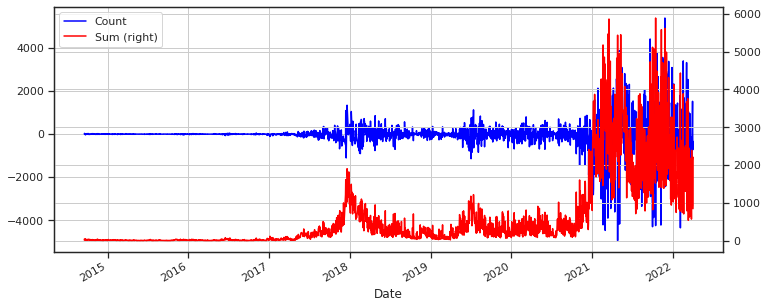

In [ ]:
plt.figure(figsize=(12,5))


ax1 = X['Open-Close'].plot(color='blue', grid=True, label='Count')
ax2 = X['High-Low'].plot(color='red', grid=True, secondary_y=True, label='Sum')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()


plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

The target variable, called also dependent variable is the variable whose values are going to be predicted by predictor variables. In this model, the target variable is whether Bitcoin price will close up or down on the next trading day.

The thing is that if the next day's closing price is greater than current day's closing price, then we will buy the Bitcoin, else we will sell the Bitcoin.

We will store +1 for the buy signal and -1 for the sell signal. We will store the target variable in a variable ’Y’.



In [ ]:
Y= np.where(knn['Close'].shift(-1)>knn['Close'],1,-1)

Now, we will split our data into test dataset and training dataset. We used 60% of our data to train it and the rest 30% to test the data. To do this, we  created a split value which divided the dataframe in a 60-40 ratio.

In [ ]:

sp = 0.6
split = int(sp*len(knn))

X_train = X[:split]
Y_train = Y[:split]

X_test = X[split:]
Y_test = Y[split:]

In this part we looked for best K value in the model. So we looked for the all possible k values and calculated their test and train accuracies. As a result we have ended up with that the best K value for our model with higher accuracy is 61 nearest neighbor, k = 61.

In [ ]:
# Instantiate KNN learning model(k=?)
best = 0
bestk = 0
for i in range(50,500,1):
  #print('this is for:{} '.format(i))

  model = KNeighborsClassifier(n_neighbors=i)

  # fit the model
  model.fit(X_train, Y_train)

  # Accuracy Score
  accuracy_train = accuracy_score(Y_train, model.predict(X_train))
  accuracy_test = accuracy_score(Y_test, model.predict(X_test))
  if(accuracy_test > best):
    best = accuracy_test
    bestk = i
  #print ('Train_data Accuracy: %.2f' %accuracy_train)
  #print ('Test_data Accuracy: %.2f' %accuracy_test)
print(bestk)

61


Here is the result of accuracies of train and test data which are very high for the prediction model. we see that an accuracy of 54% of test dataset meaning that 54% of the time our prediction will be correct.

In [ ]:
model = KNeighborsClassifier(n_neighbors=61)

# fit the model
model.fit(X_train, Y_train)

# Accuracy Score
accuracy_train = accuracy_score(Y_train, model.predict(X_train))
accuracy_test = accuracy_score(Y_test, model.predict(X_test))

print ('Train_data Accuracy: %.2f' %accuracy_train)
print ('Test_data Accuracy: %.2f' %accuracy_test)

Train_data Accuracy: 0.56
Test_data Accuracy: 0.54


Our aim was basically to sell or buy. We predicted the signal to sell or buy using predict function. After that, we calculated the cumulative Bitcoin returns of test dataset.

Then, we calculated the cumulative strategy return based on the signal predicted by the model in the test dataset.

Then, we will plot the cumulative Bitcoin returns and cumulative strategy returns and visualize our KNN Algorithm's performance level.

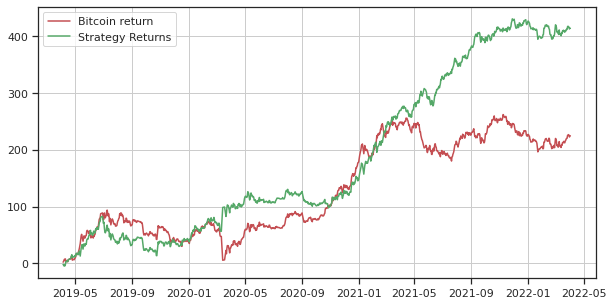

In [ ]:

knn['Signal_predict']= model.predict(X)
 
knn['Bitcoin return'] = np.log(knn['Close']/knn['Close'].shift(1))
Cumulative_SPY_returns = knn[split:]['Bitcoin return'].cumsum()*100

# Cumulative Strategy Returns 
knn['Startegy_returns'] = knn['SPY_returns']* knn['Signal_predict'].shift(1)
Cumulative_Strategy_returns = knn[split:]['Startegy_returns'].cumsum()*100

# Plot the results to visualize the performance

plt.figure(figsize=(10,5))
plt.plot(Cumulative_SPY_returns, color='r',label = 'Bitcoin return')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

The Sharpe ratio was developed by Nobel laureate William F. Sharpe and is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

In this model our sharpe ratio is 0.38 which is not bad but also not perfect.

In [ ]:
# Calculate Sharpe ratio
Std = Cumulative_Strategy_returns.std()
Sharpe = (Cumulative_Strategy_returns-Cumulative_SPY_returns)/Std
Sharpe = Sharpe.mean()
print('Sharpe ratio: %.2f'%Sharpe )

Sharpe ratio: 0.38


As a result of these, if bitcoin return is bigger than strategy return, we will buy bitcoin, and sell bitcoin otherwise.

Therefore this KNN algorithm helped us to decide whether buy or sell bitcoin based on the previous data.

## Method 5: Logistic Regression
As a supervised machine learning method logistic regression measures the correlation between categorical dependent and one or more independent variables thanks to the logistic function. 

The difference between linear and logistic regression is both compute the weighted sum of inputs but additionally, logistic regression takes this result on puts it on the logistic function.  

According to our hypothesis testing, categorical dependencies were detected. In order to take advantage of these determined variables, we conducted a machine learning method based on logistic regression.

In [ ]:

import talib as talb
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

Prepare the data and determine the predictor variables as similar to KNN method.
We have used 10 days of moving average method, correlation, relative strength index (RSI), the difference between the open price of previous day & current, difference close price of previous day & the opening price of current day, open, high, low, and close price as indicators to make the prediction.

In [ ]:
logreg = primary_dataset.copy()
logreg.drop(['Adj Close','Biggest Change' , 'Volume','Daily Verbal Change','Days','Months'], axis = 1, inplace = True)
logreg.set_index('Date', inplace = True)

logreg['S_10'] = logreg['Close'].rolling(window=10).mean()
logreg['Corr'] = logreg['Close'].rolling(window=10).corr(logreg['S_10'])
logreg['RSI'] = talb.RSI(np.array(logreg['Close']), timeperiod =10)
logreg['Open-Close'] = logreg['Open'] - logreg['Close'].shift(1)
logreg['Open-Open'] = logreg['Open'] - logreg['Open'].shift(1)
logreg = logreg.dropna()
X = logreg.iloc[:,:9]

The dependent variable is the same as KNN method If next day's closing price is higher than current day's  closing price, then we will buy the bitcoin (1), else we will sell it (-1).

In [ ]:
y = np.where(logreg['Close'].shift(-1) > logreg['Close'],1,-1)

Very similar to KNN method we split the dataset into train and test

In [ ]:
split = int(0.6*len(logreg))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [ ]:
RegressionModel = LogisticRegression()
RegressionModel = RegressionModel.fit (X_train,y_train)

In [ ]:
pd.DataFrame(zip(X.columns, np.transpose(RegressionModel.coef_)))

0                          1
0        Open    [0.0003084209696365567]
1        High   [0.00021047357107758992]
2         Low  [-0.00021201638345336377]
3       Close  [-0.00014468816241365812]
4        S_10  [-0.00019302995609489905]
5        Corr    [6.472897146326097e-05]
6         RSI     [0.005259555786586947]
7  Open-Close   [-0.0010648456302588096]
8   Open-Open   [0.00026293104479459186]

We have calculated probs of class for test dataset using a special function.

In [ ]:
probability = RegressionModel.predict_proba(X_test)
print(probability)

[[0.44723141 0.55276859]
 [0.4451978  0.5548022 ]
 [0.43961659 0.56038341]
 ...
 [0.55176144 0.44823856]
 [0.75538039 0.24461961]
 [0.65264454 0.34735546]]


Then, we have predicted  class labels using predict function for  test dataset.

In [ ]:
probability = RegressionModel.predict_proba(X_test)
print(probability)

predicted = RegressionModel.predict(X_test)

[[0.44723141 0.55276859]
 [0.4451978  0.5548022 ]
 [0.43961659 0.56038341]
 ...
 [0.55176144 0.44823856]
 [0.75538039 0.24461961]
 [0.65264454 0.34735546]]


We used The Confusion matrix to understand performance of the classification model on a set of test dataset in which we know true values 

In [ ]:
print(metrics.confusion_matrix(y_test, predicted))

[[275 207]
 [270 274]]


In [ ]:
print(RegressionModel.score(X_test,y_test))

0.5350877192982456


After all we calculated the accuracy of our model which is 0.54. The %54 of the cases are correct in the predictions.

In [ ]:
cross_val = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
print(cross_val)
print(cross_val.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.7/dist-packages/sklearn/lin

[0.54863813 0.54474708 0.54474708 0.54474708 0.57587549 0.5546875
 0.55078125 0.54296875 0.5625     0.4765625 ]
0.5446254863813229


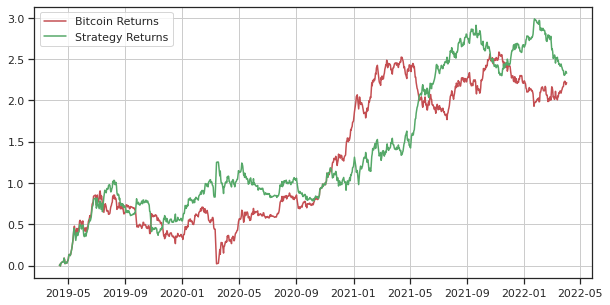

In [ ]:
logreg['Predicted_Signal'] = RegressionModel.predict(X)
logreg['Bitcoin'] = np.log(logreg['Close']/logreg['Close'].shift(1))
Cumulative_Nifty_returns = np.cumsum(logreg[split:]['Nifty_returns'])

logreg['Startegy_returns'] = logreg['Nifty_returns']* logreg['Predicted_Signal'].shift(1)
Cumulative_Strategy_returns = np.cumsum(logreg[split:]['Startegy_returns'])

plt.figure(figsize=(10,5))
plt.plot(Cumulative_Nifty_returns, color='r',label = 'Bitcoin Returns')
plt.plot(Cumulative_Strategy_returns, color='g', label = 'Strategy Returns')
plt.legend()
plt.show()

The same results with the KNN method can be obtained.